In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd


sns.set_theme(font='Victor Mono',style='whitegrid',palette='bwr')
sns.set_palette('bwr')

In [67]:
df_hoteles = gpd.read_file('data\geodata_historicos\df_hoteles.shp')
df_cuartos = gpd.read_file('data\geodata_historicos\df_cuartos.shp')
df_servicios = gpd.read_file('data\geodata_historicos\df_servicios.shp')



In [68]:
# Cast columns
object_columns = ['municipio','region','geometry']
new_dfs = []

for df in (df_servicios,df_cuartos,df_hoteles):

    df = df.replace('N/D','0')
    df = df.replace('ND','0')

    for col in df.columns:
        if col in object_columns:
            continue
        df[col] = df[col].astype('int64')
    new_dfs.append(df)
    
(df_servicios,df_cuartos,df_hoteles) = new_dfs


norte
altos norte
None
altos sur
cienega
sureste
sur
sierra de amula
costa sur
costa norte
sierra occidental
valles
centro


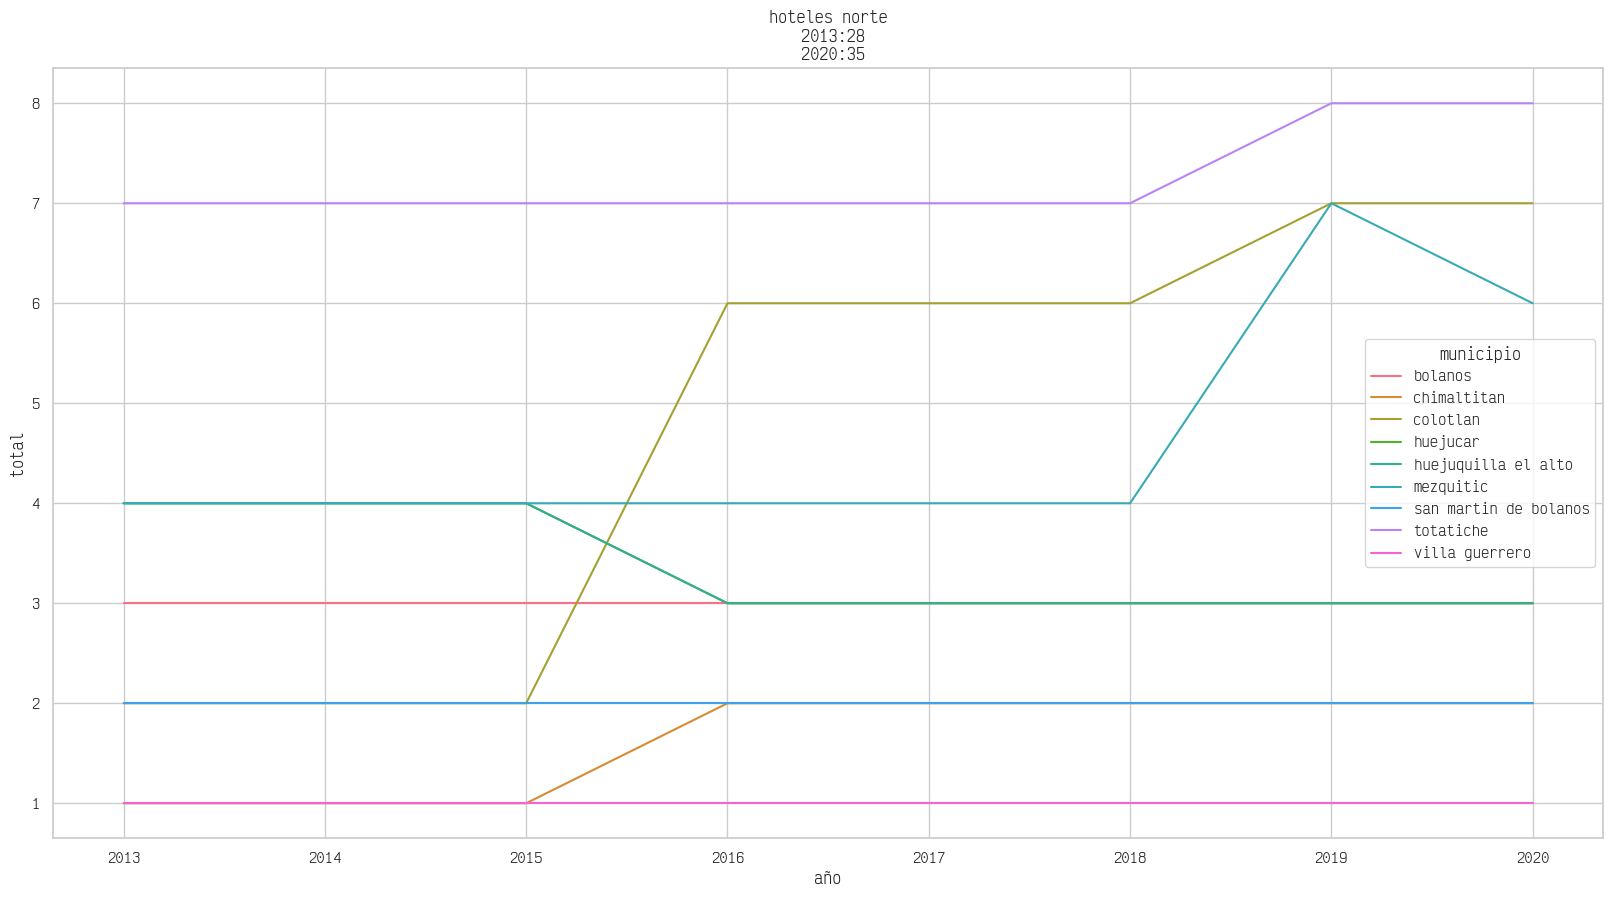

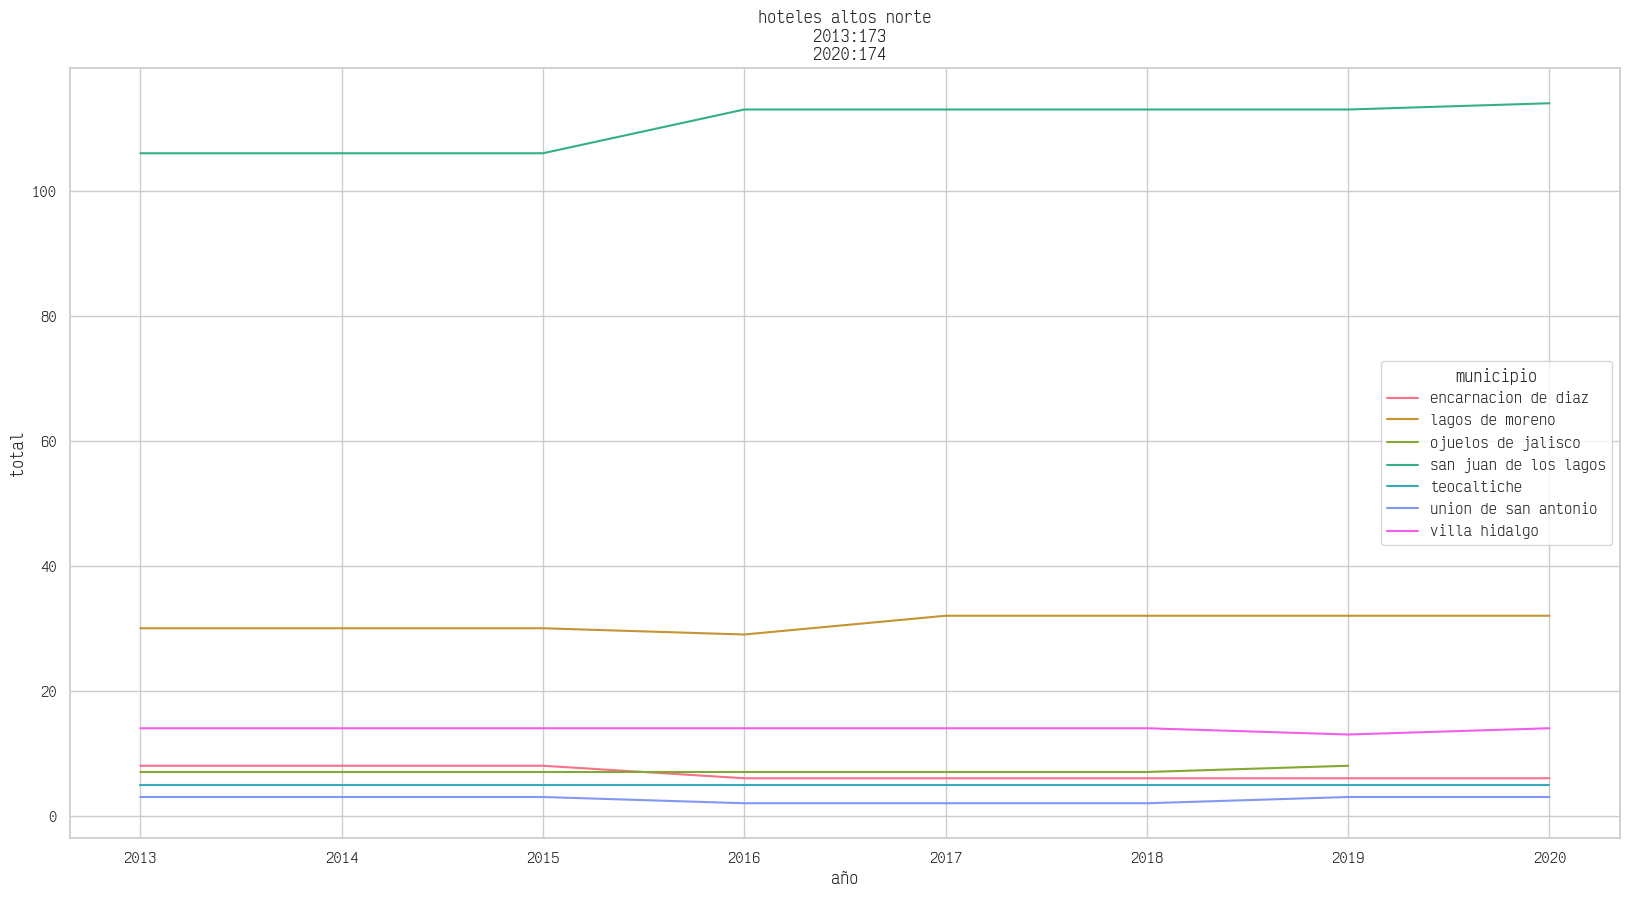

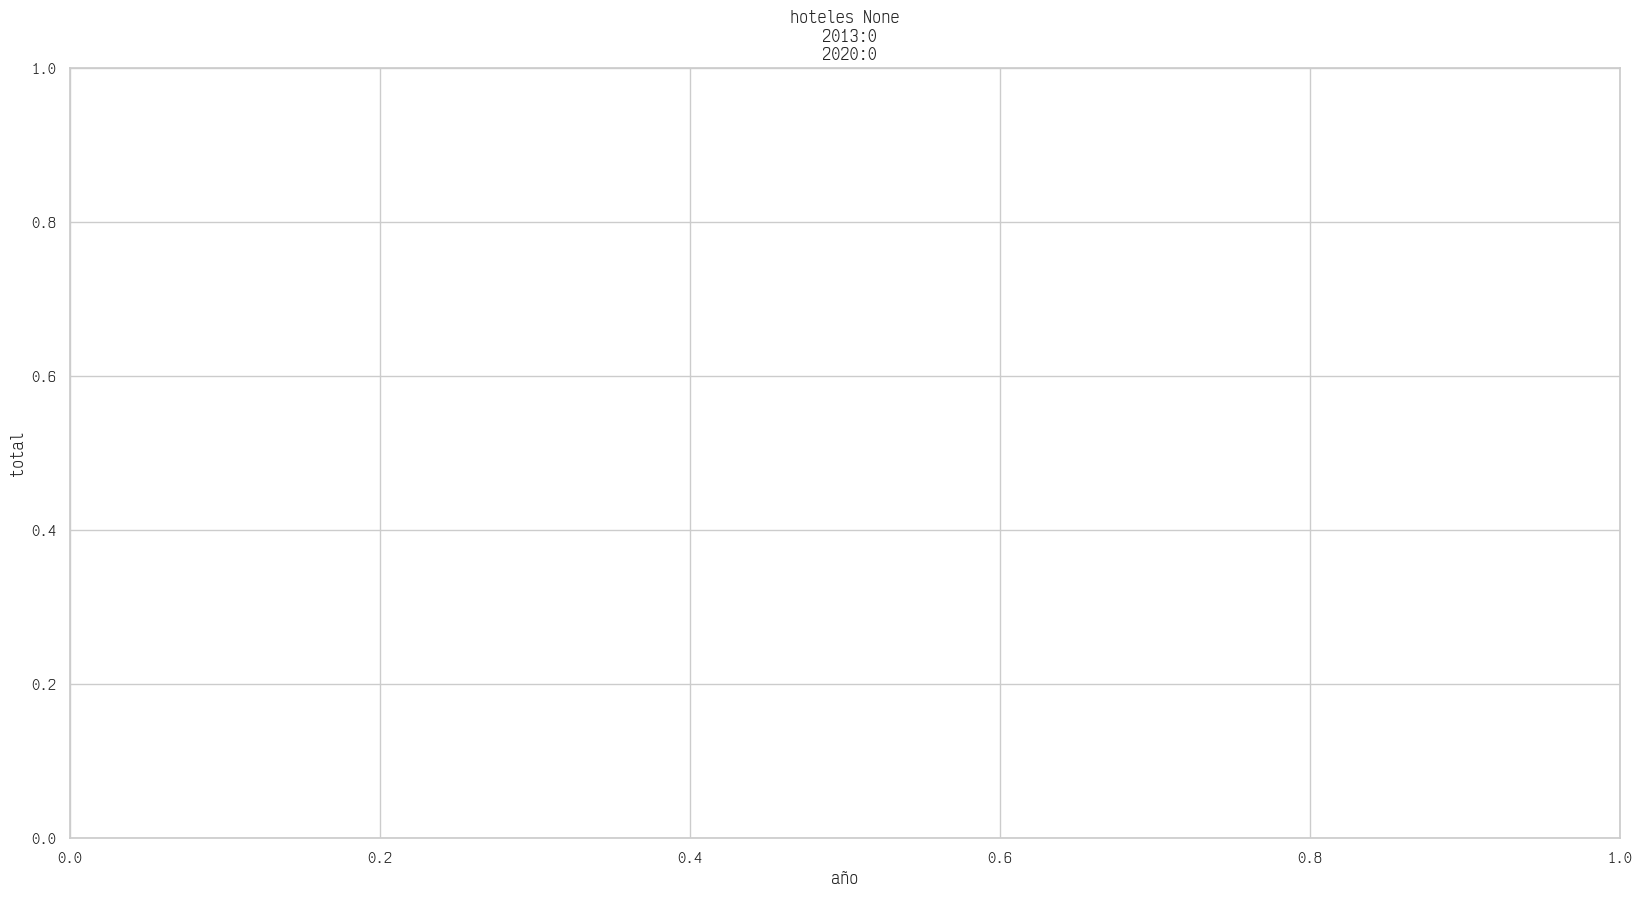

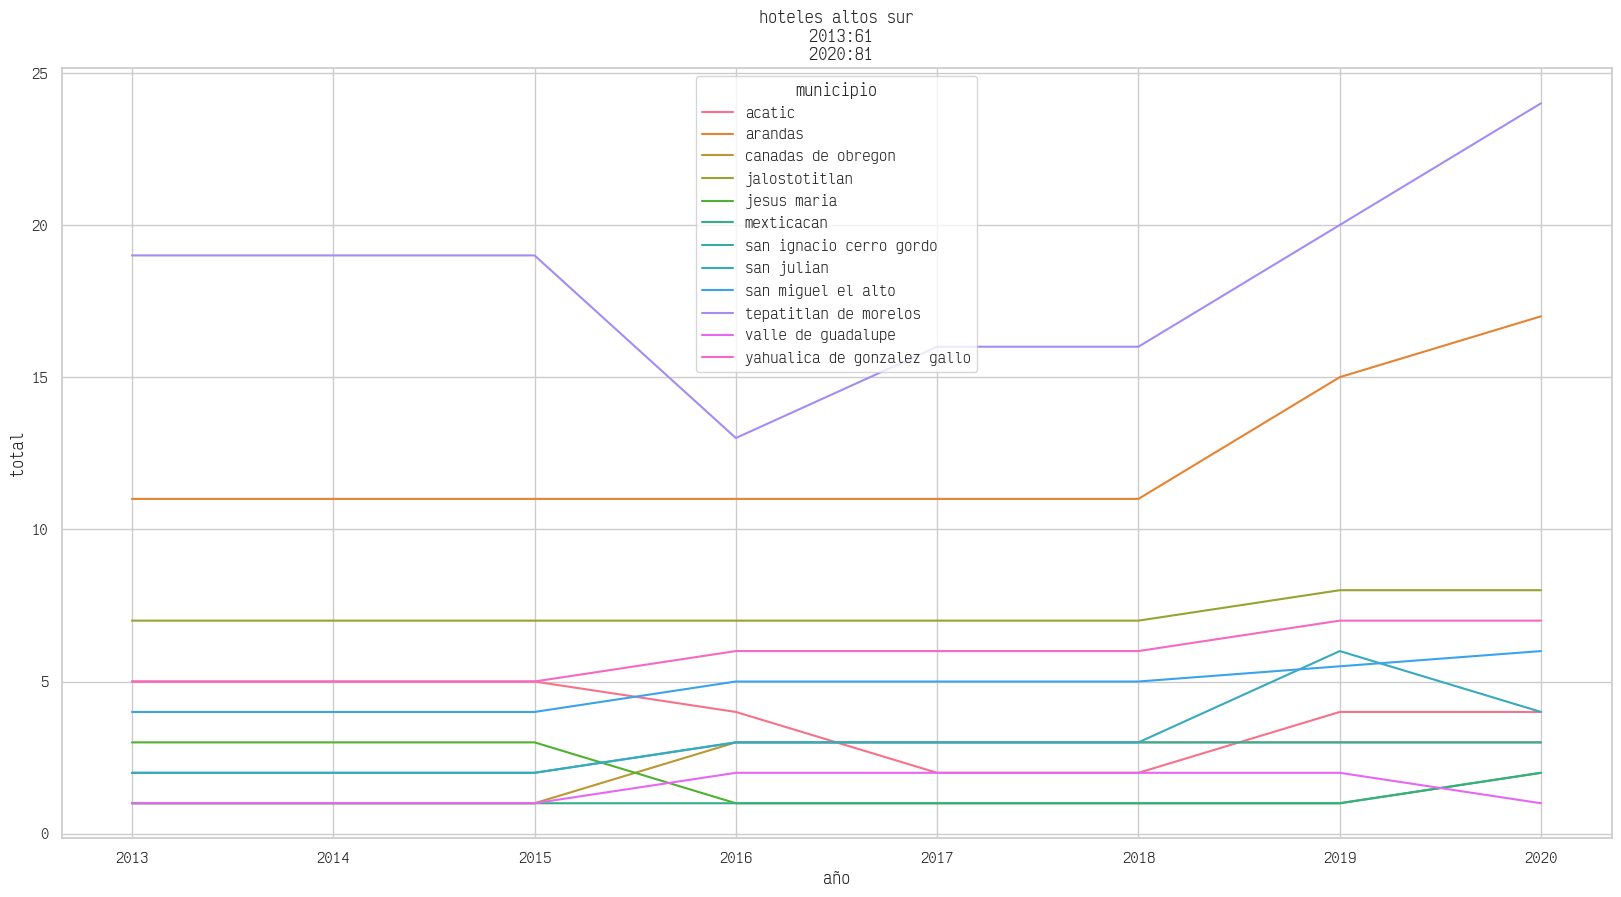

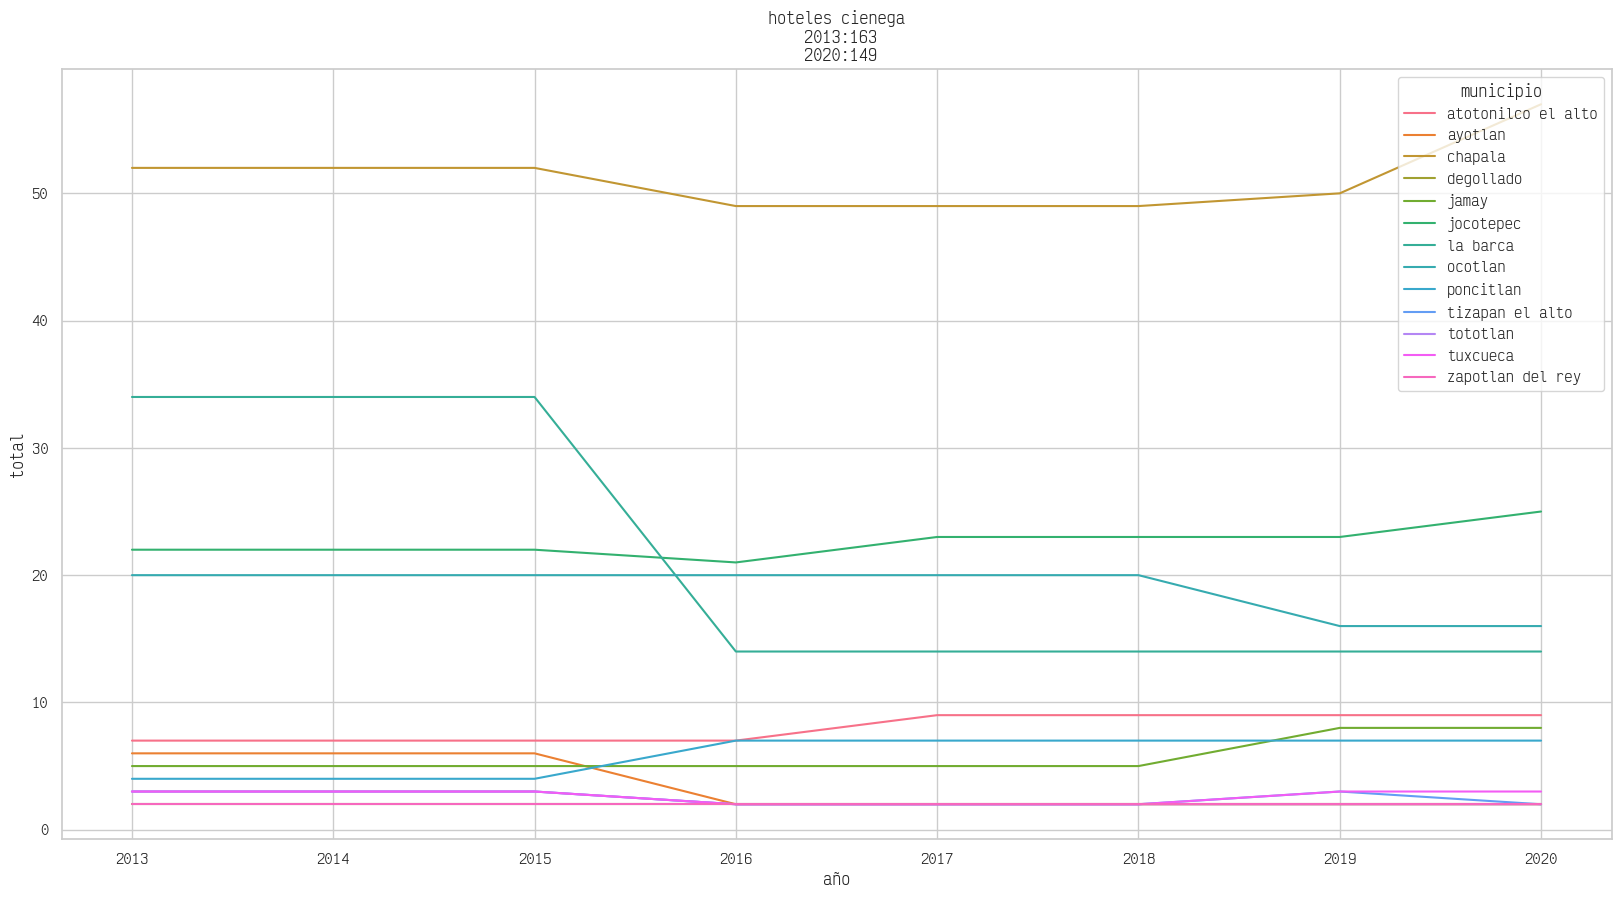

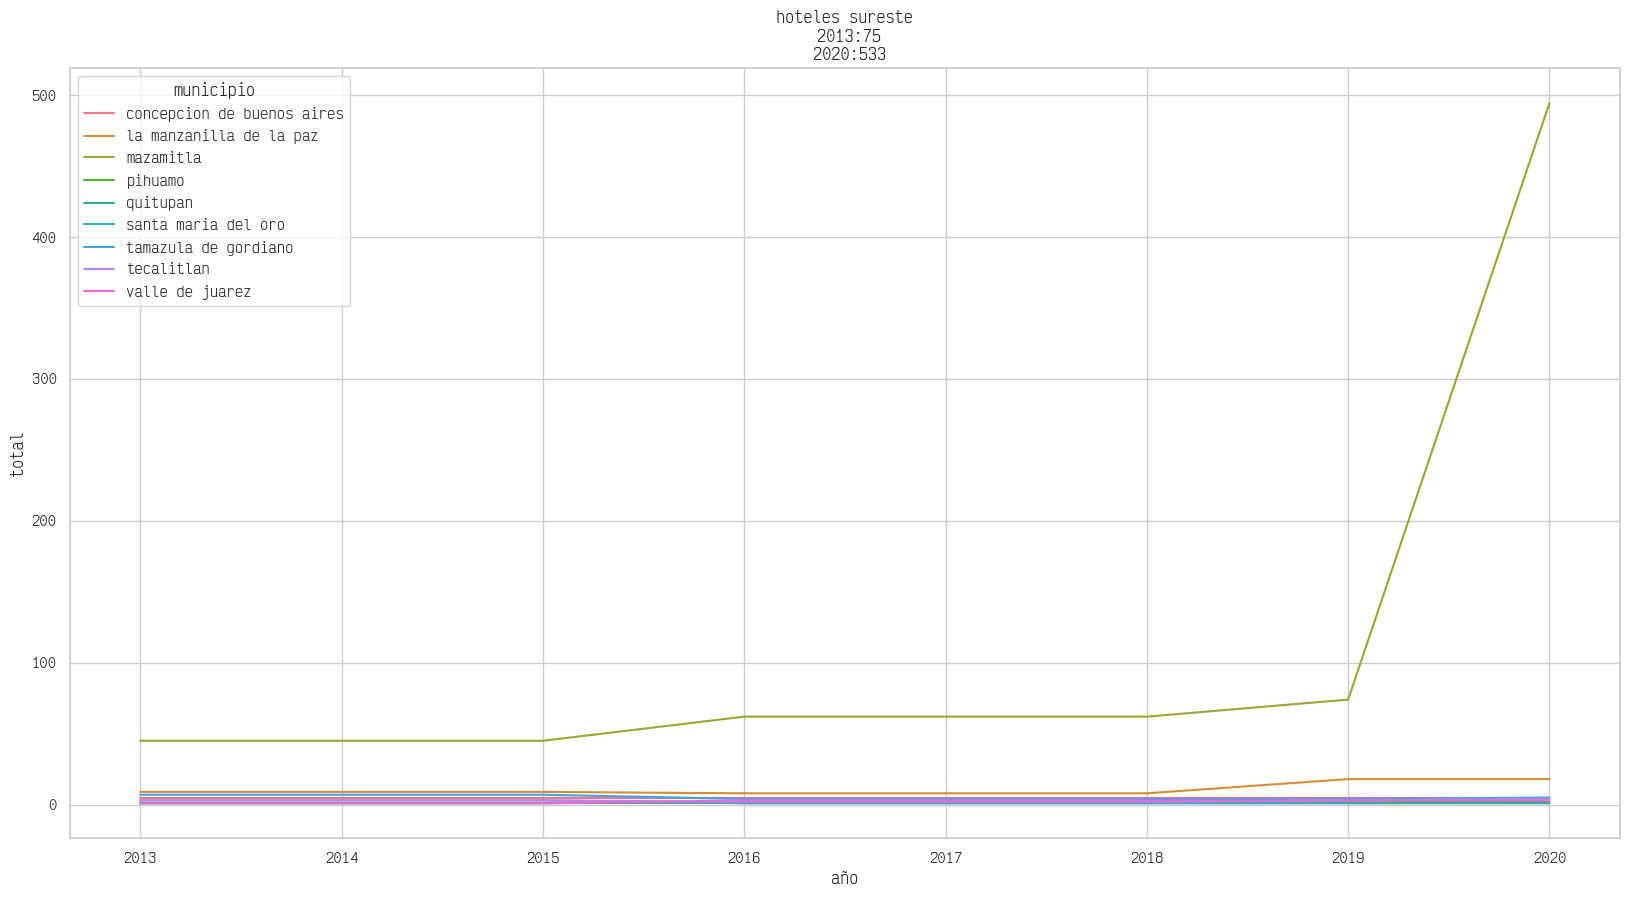

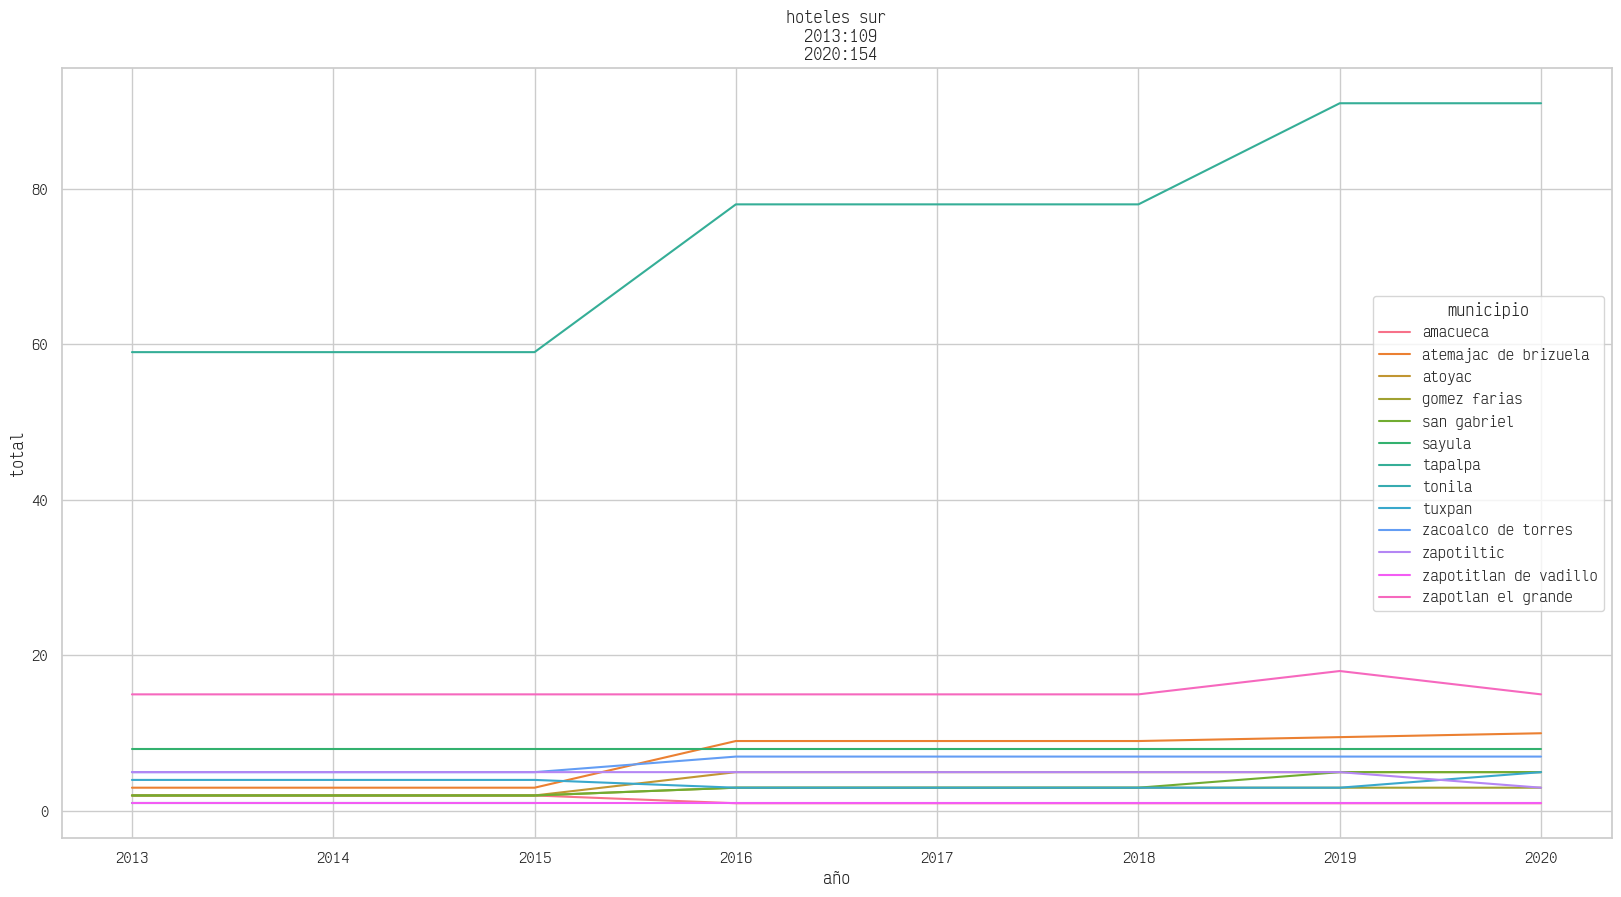

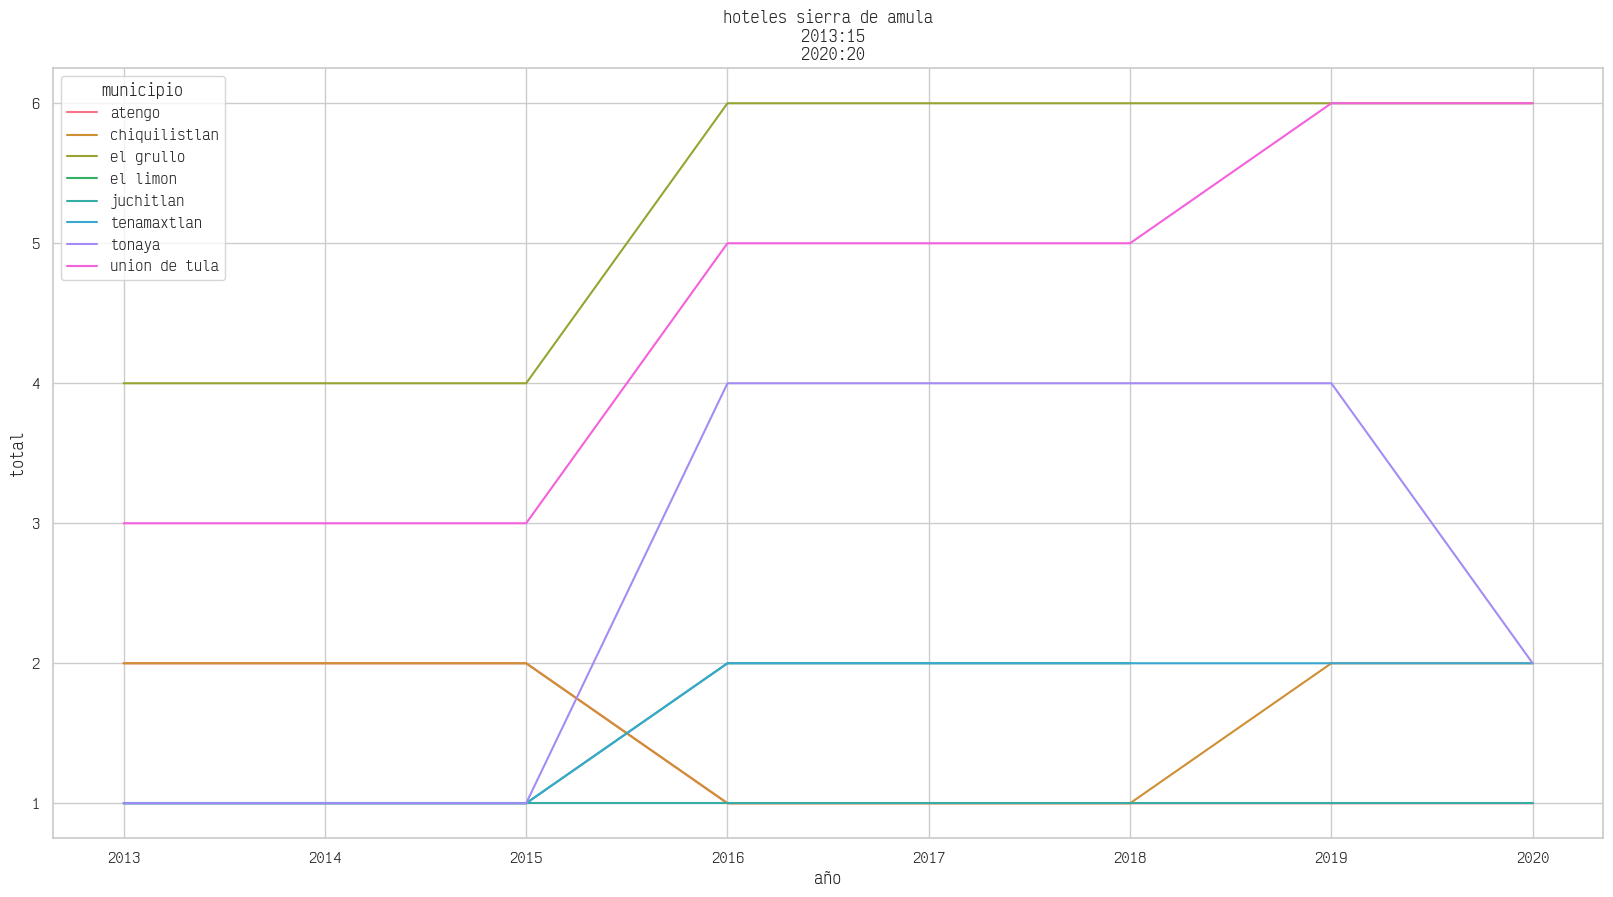

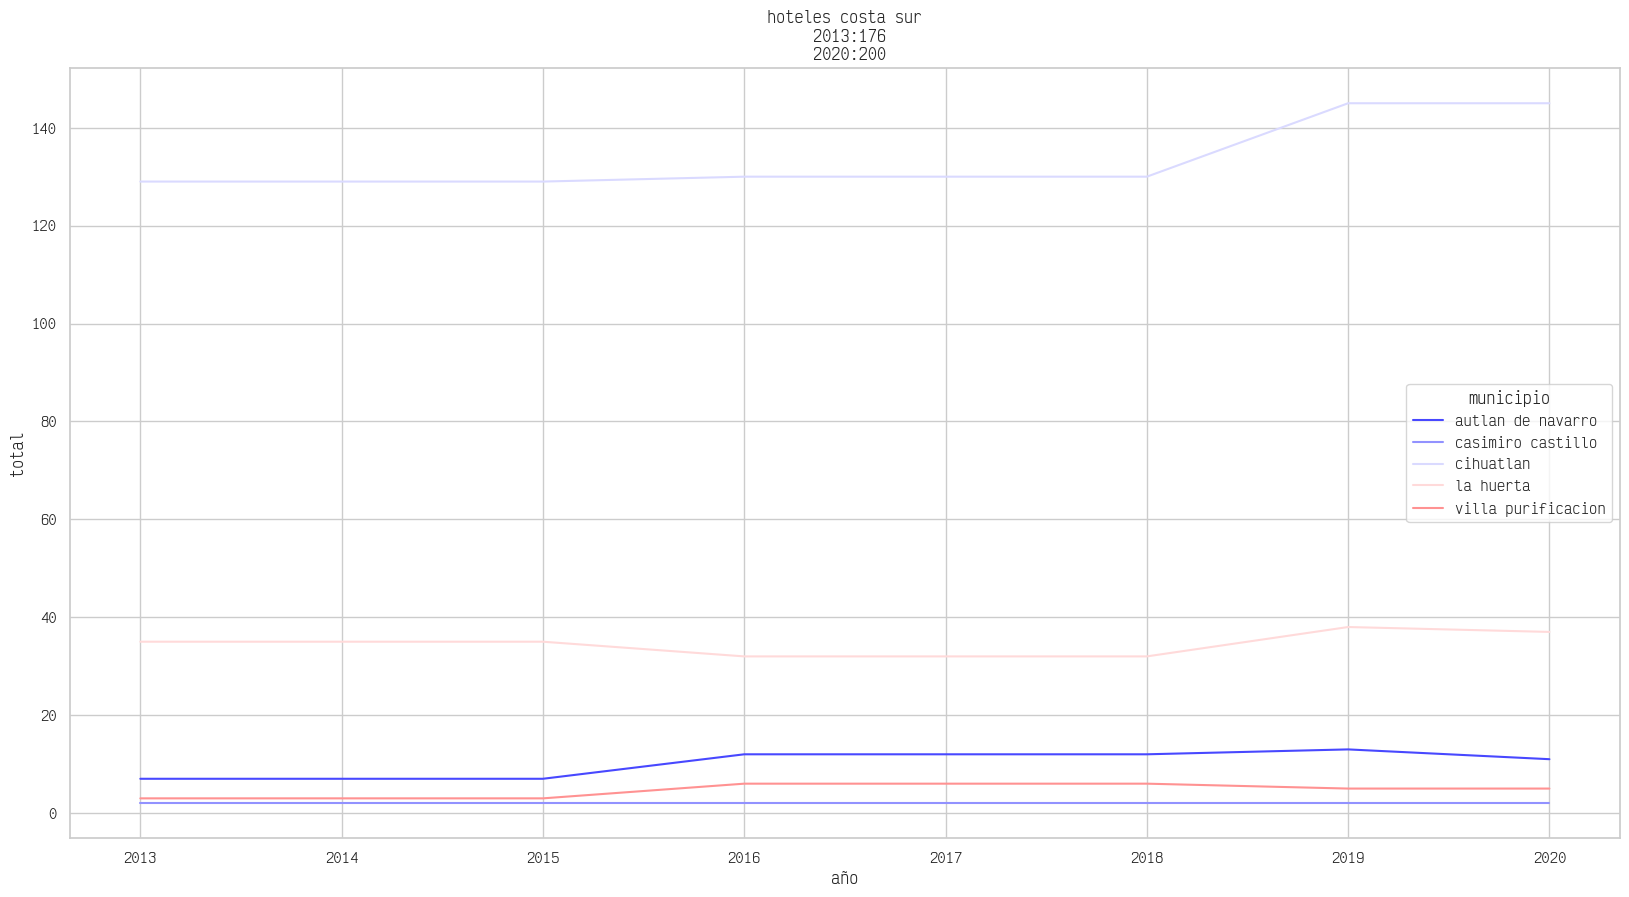

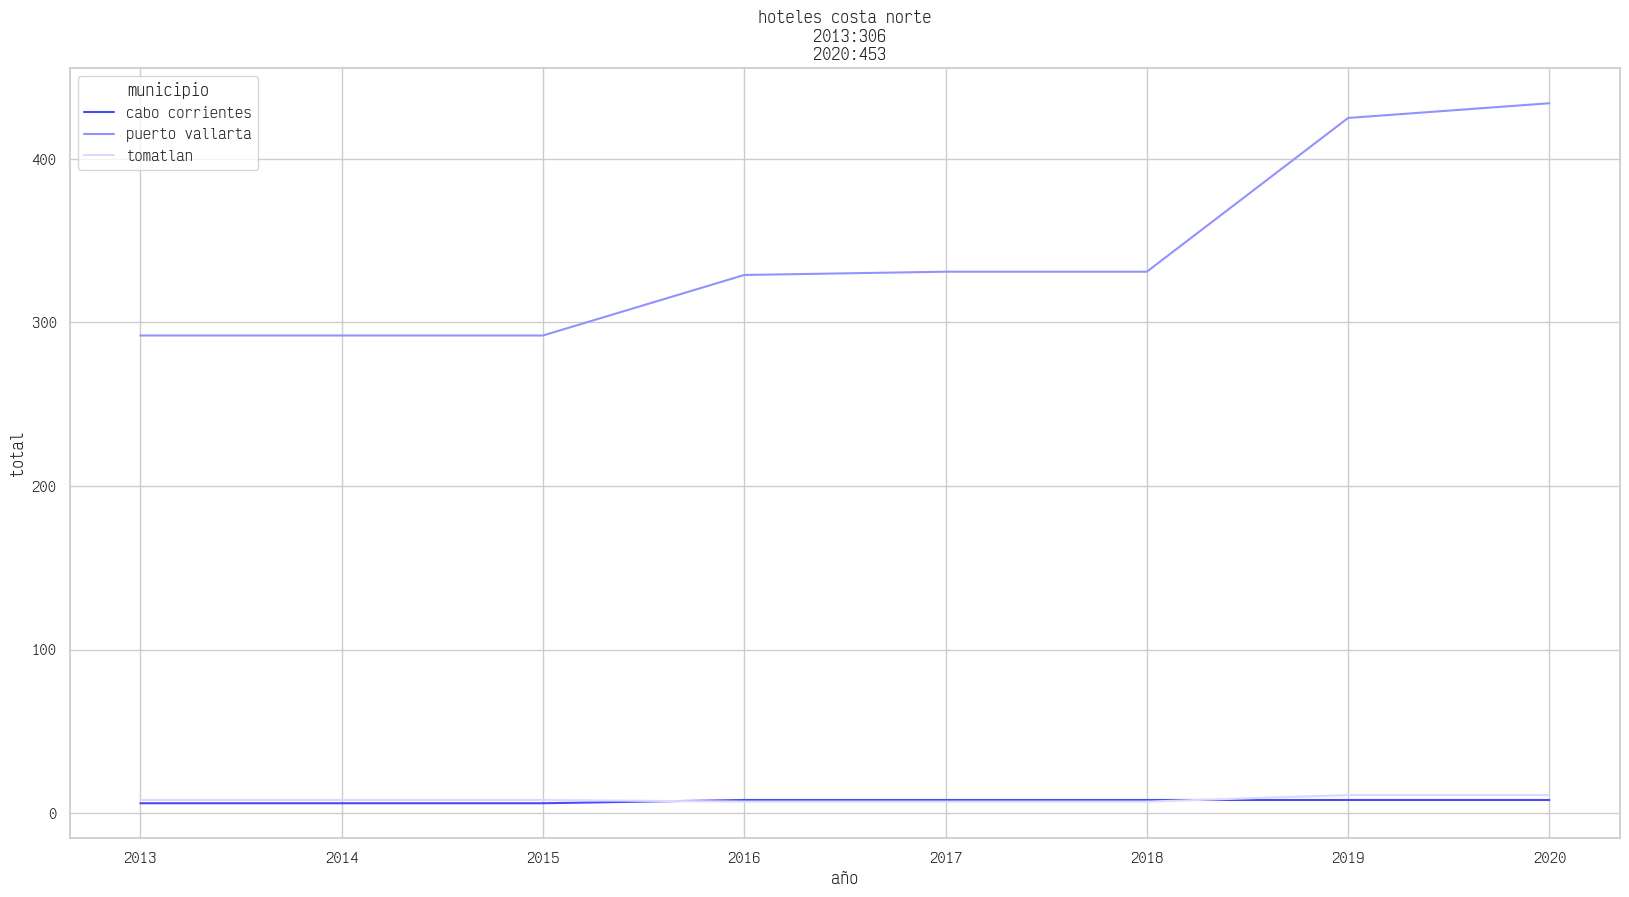

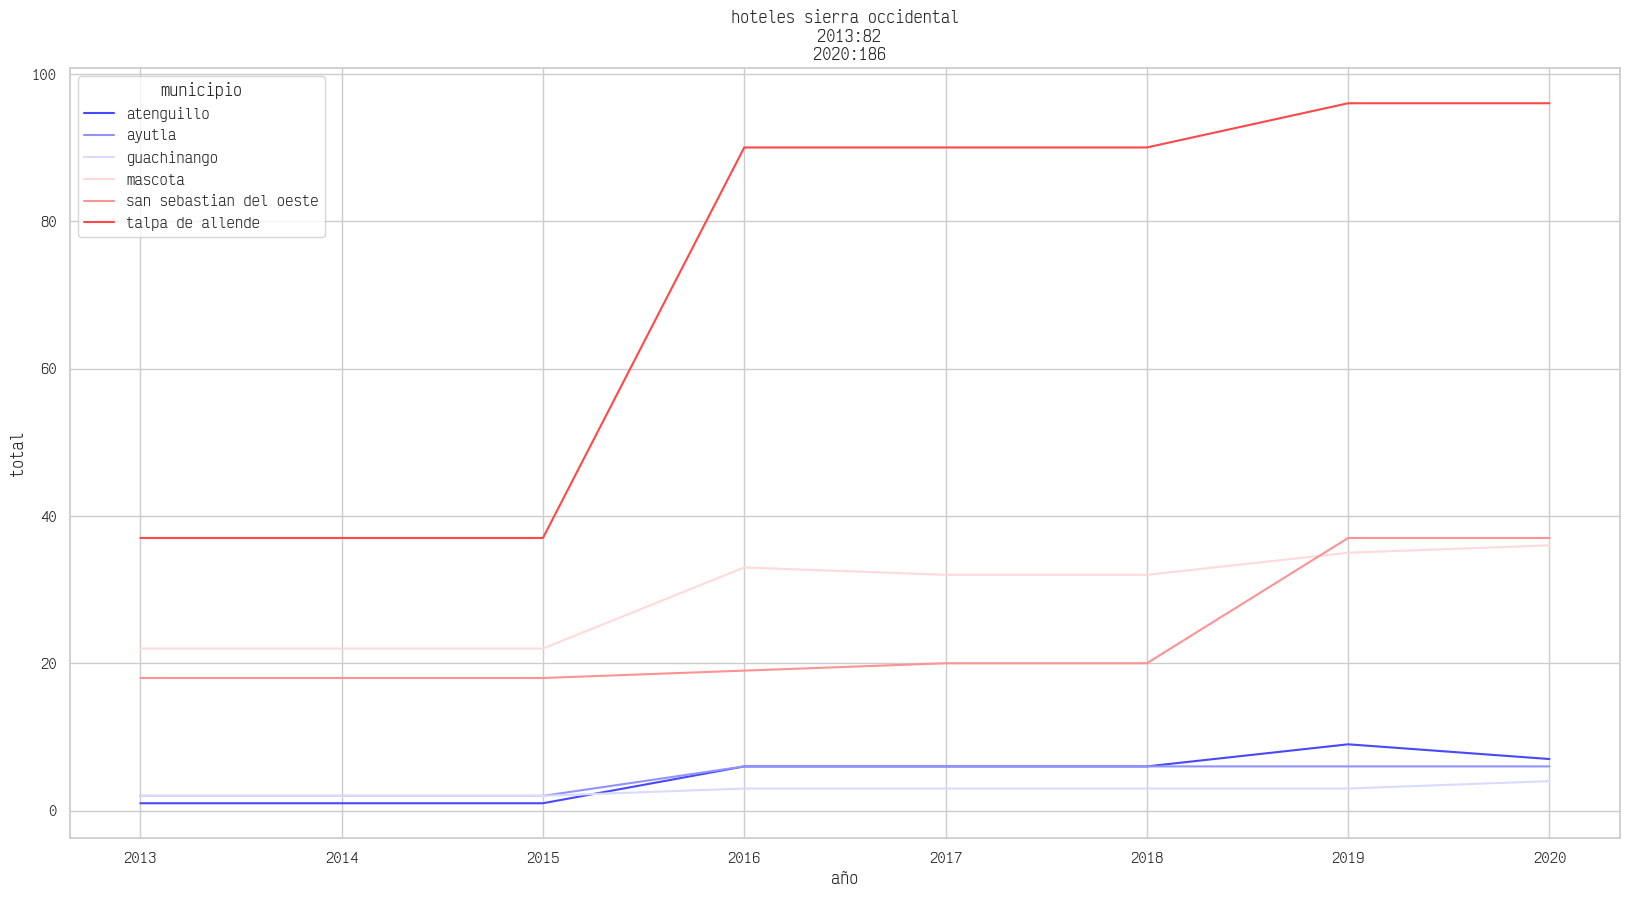

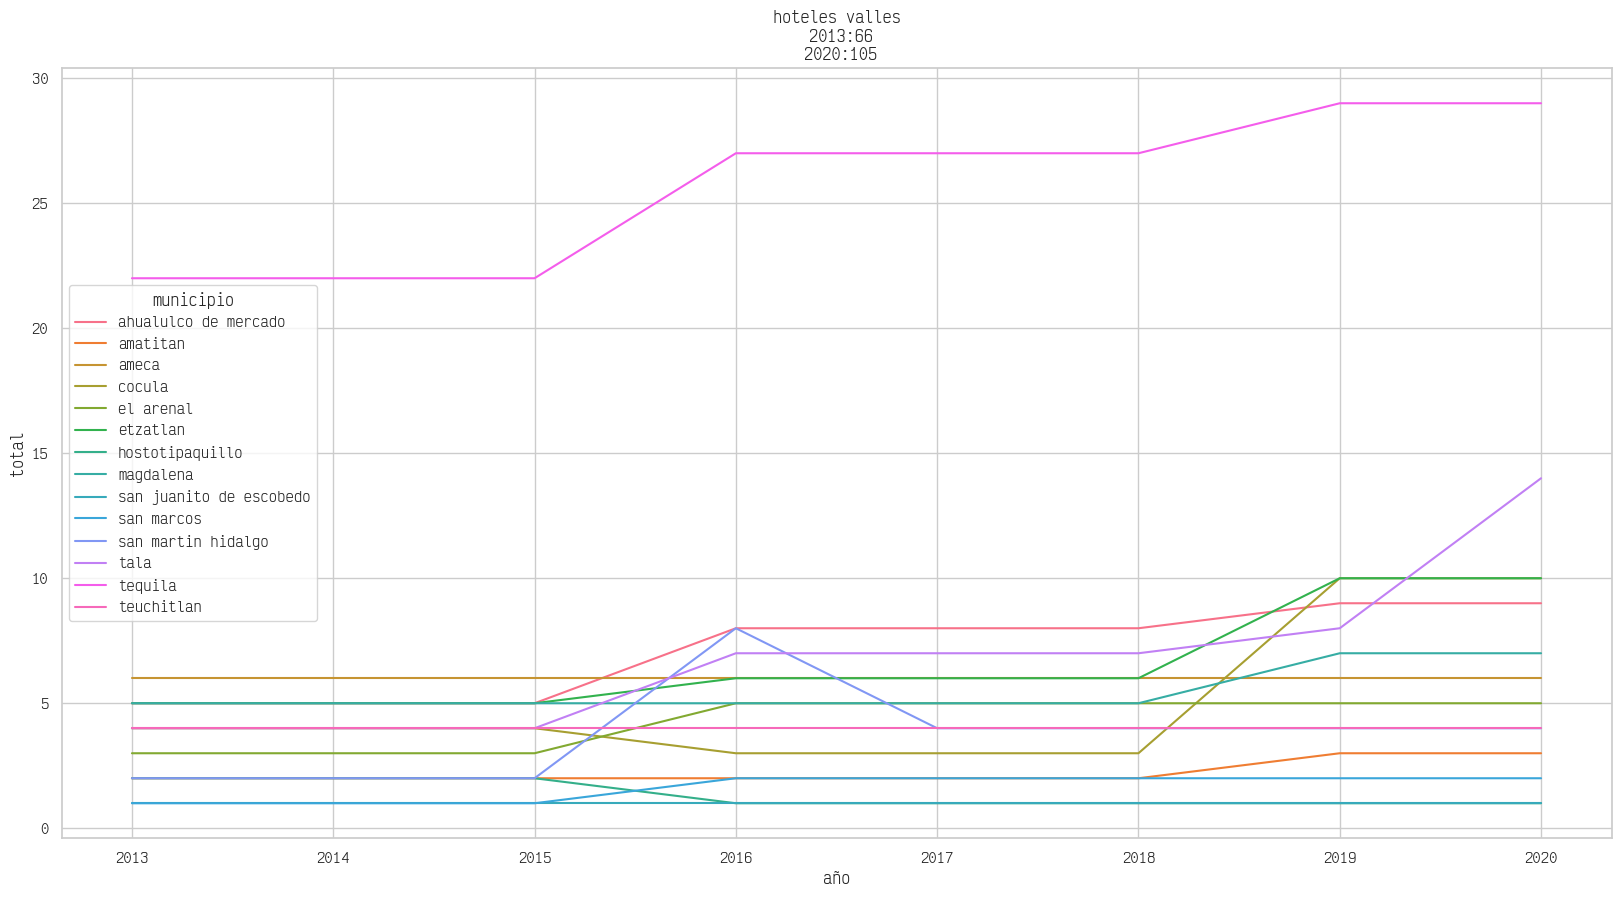

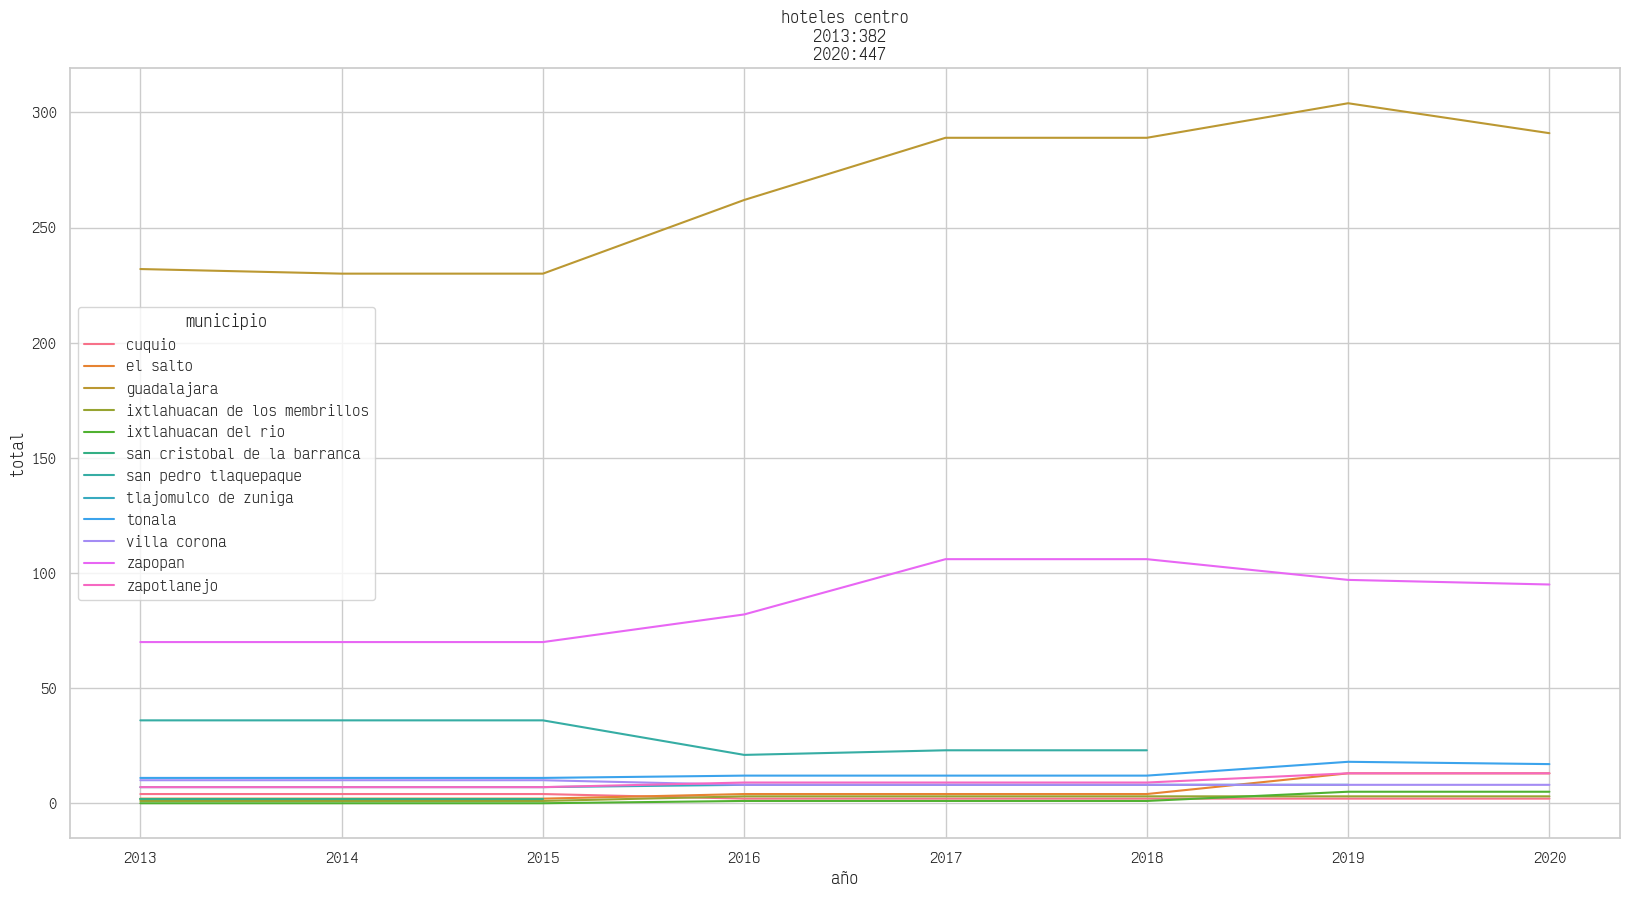

In [69]:

for region in df_hoteles['region'].unique():
    
    df = df_hoteles[df_hoteles['region'] == region]
    total_2013 = df[df['año'] == 2013]['total'].sum()
    total_2020 = df[df['año'] == 2020]['total'].sum()
    print(region)

    fig,ax = plt.subplots(1,1,figsize=(20,10))
    sns.lineplot(df,x='año',y='total',hue='municipio',ax=ax)
    ax.set_title(f'hoteles {region}\n 2013:{total_2013}\n 2020:{total_2020}')

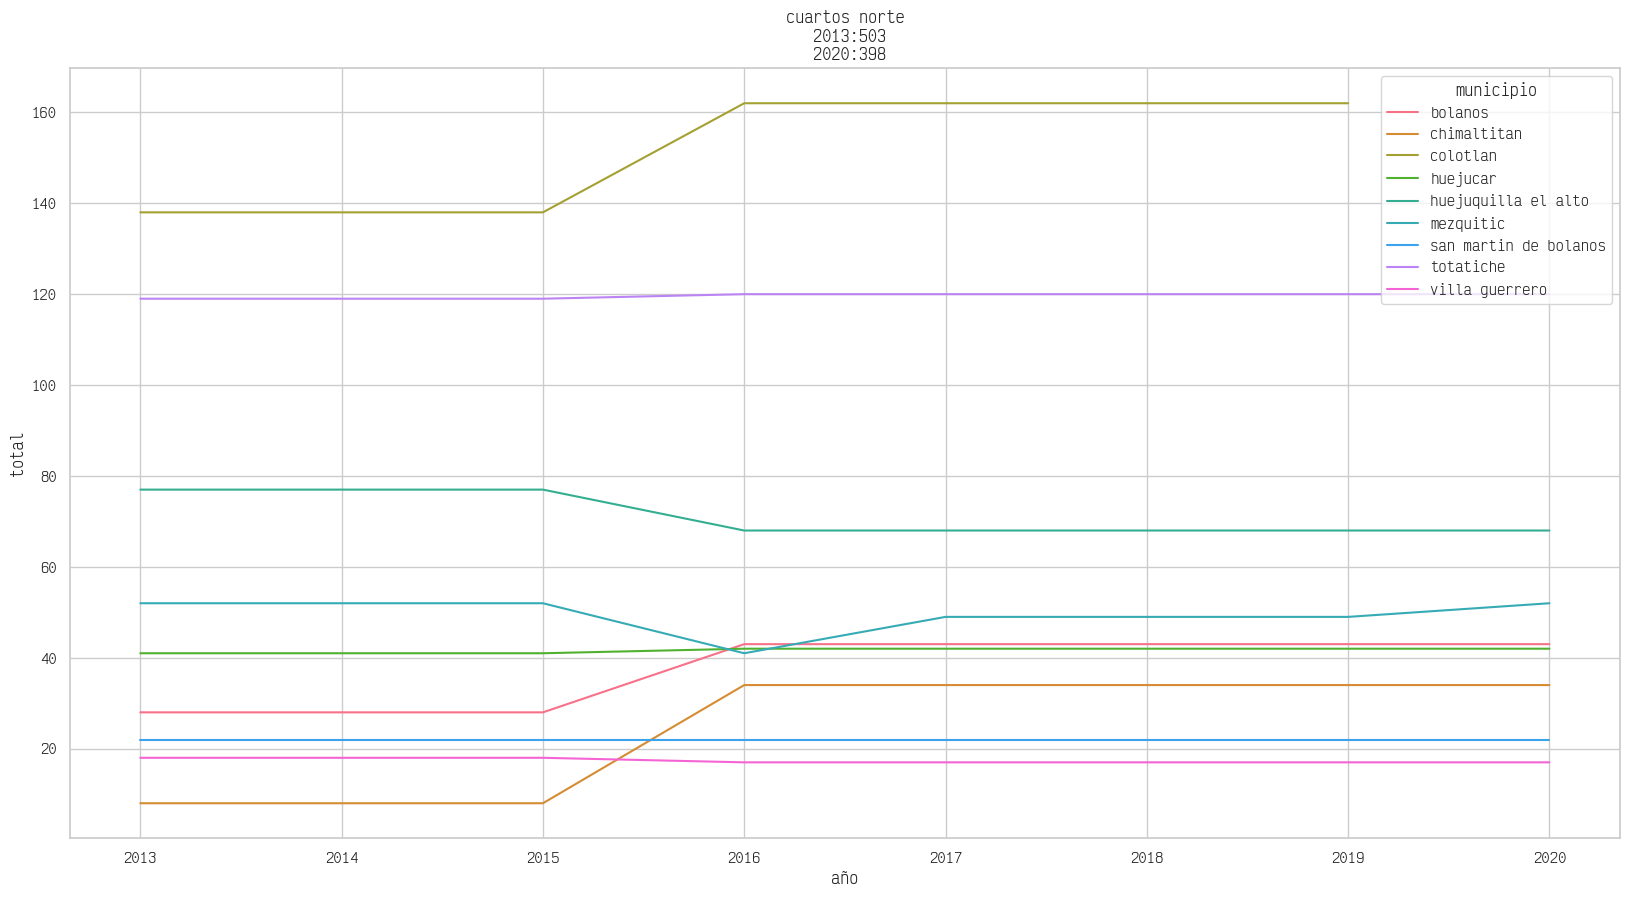

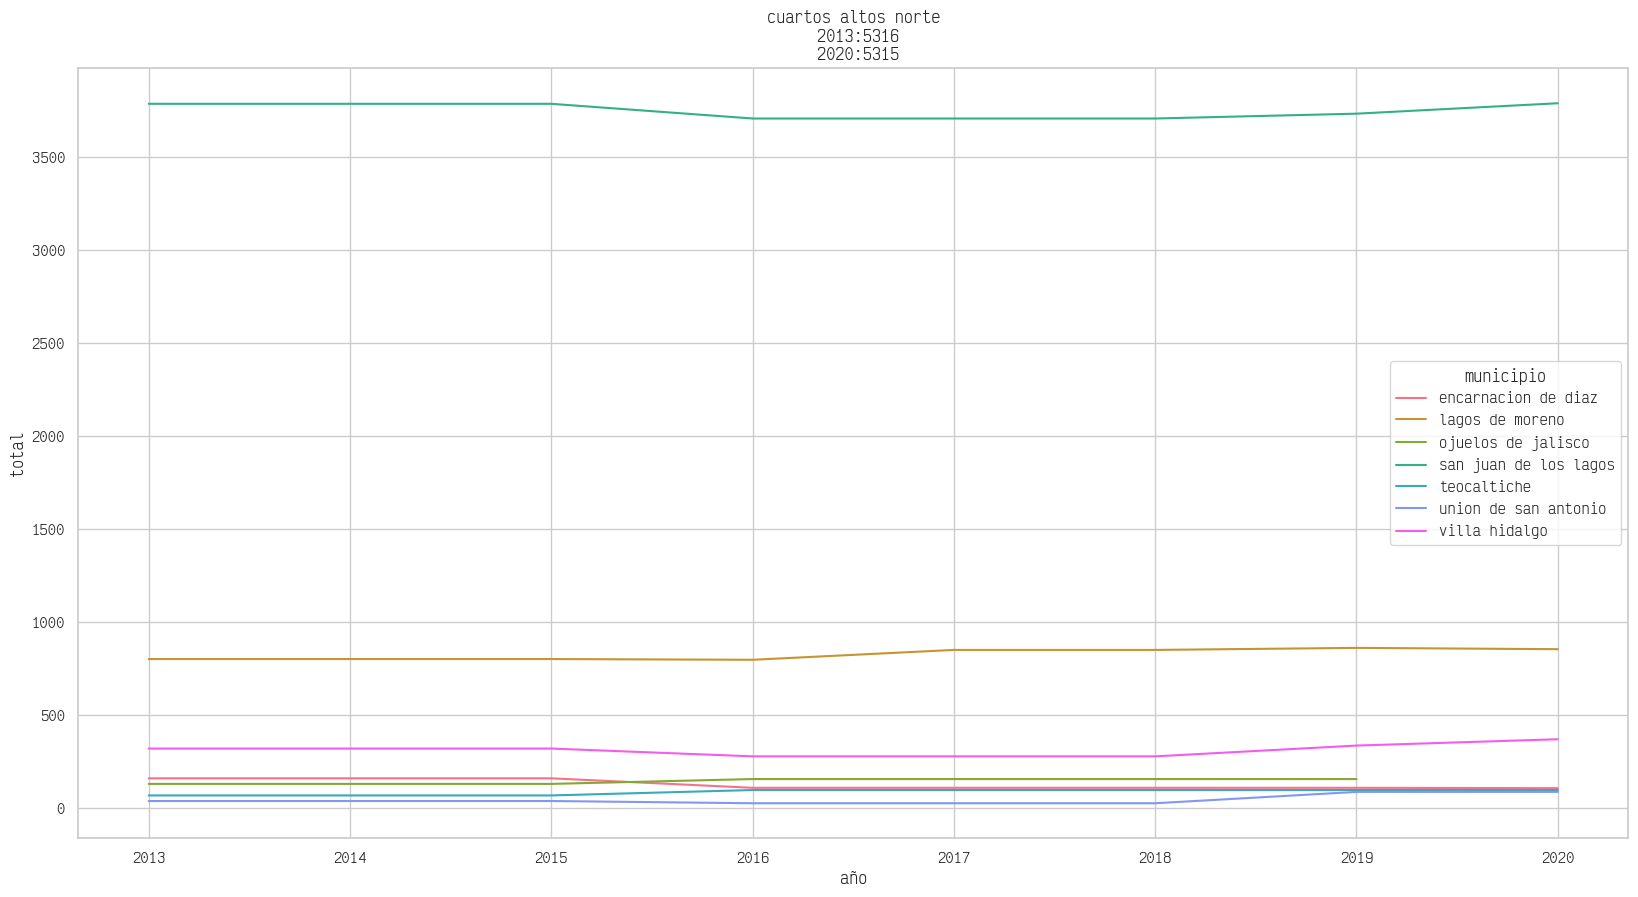

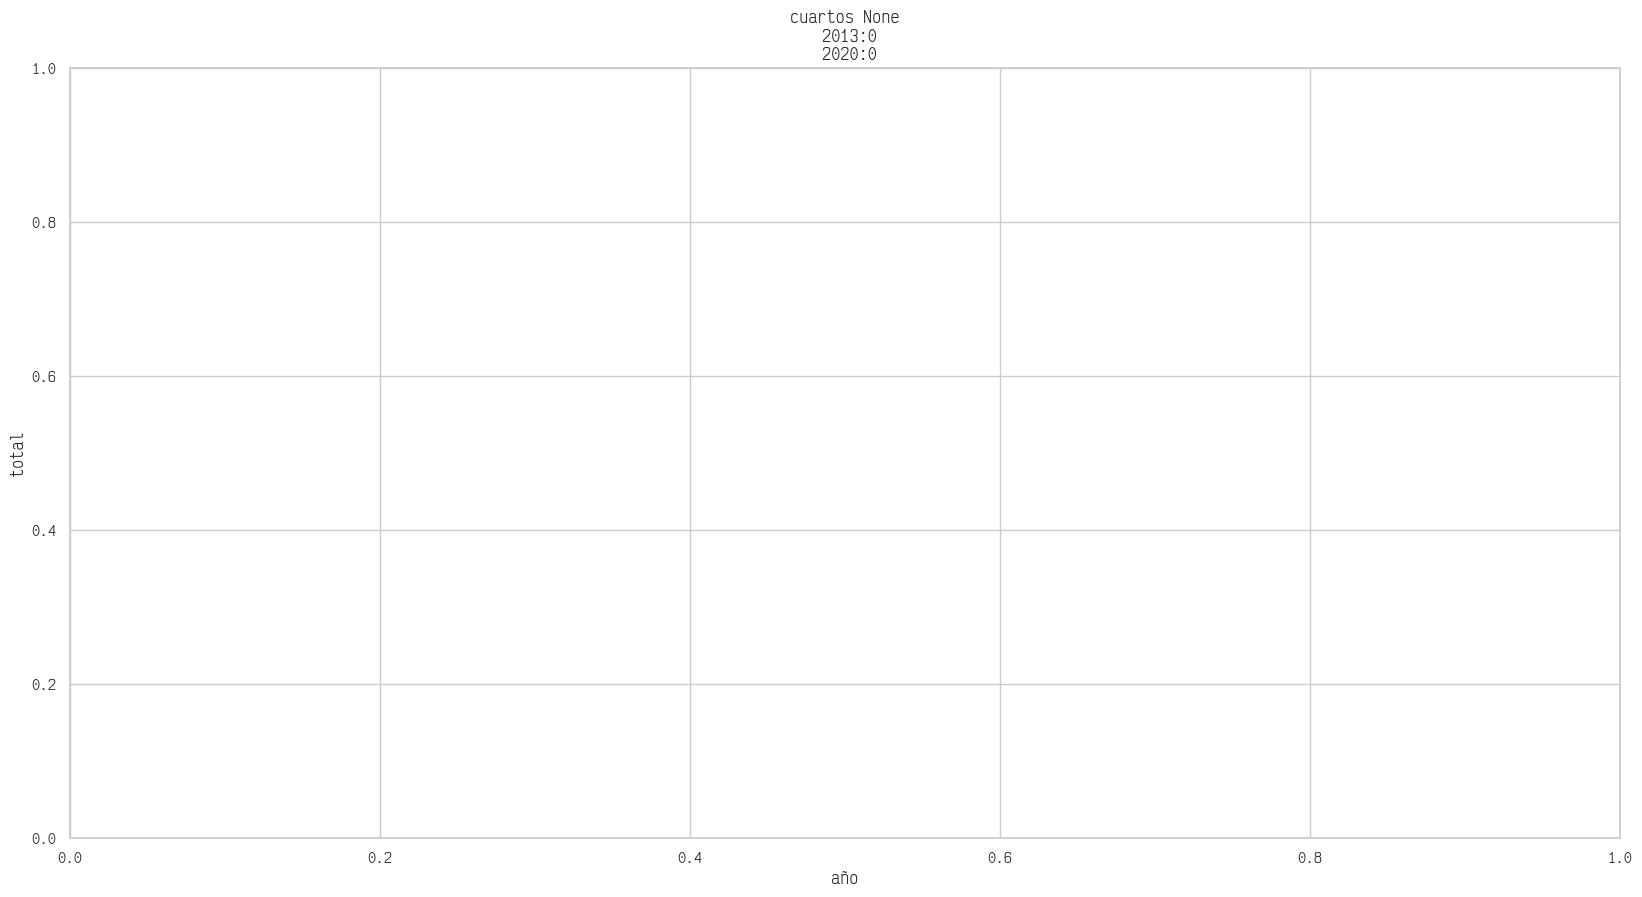

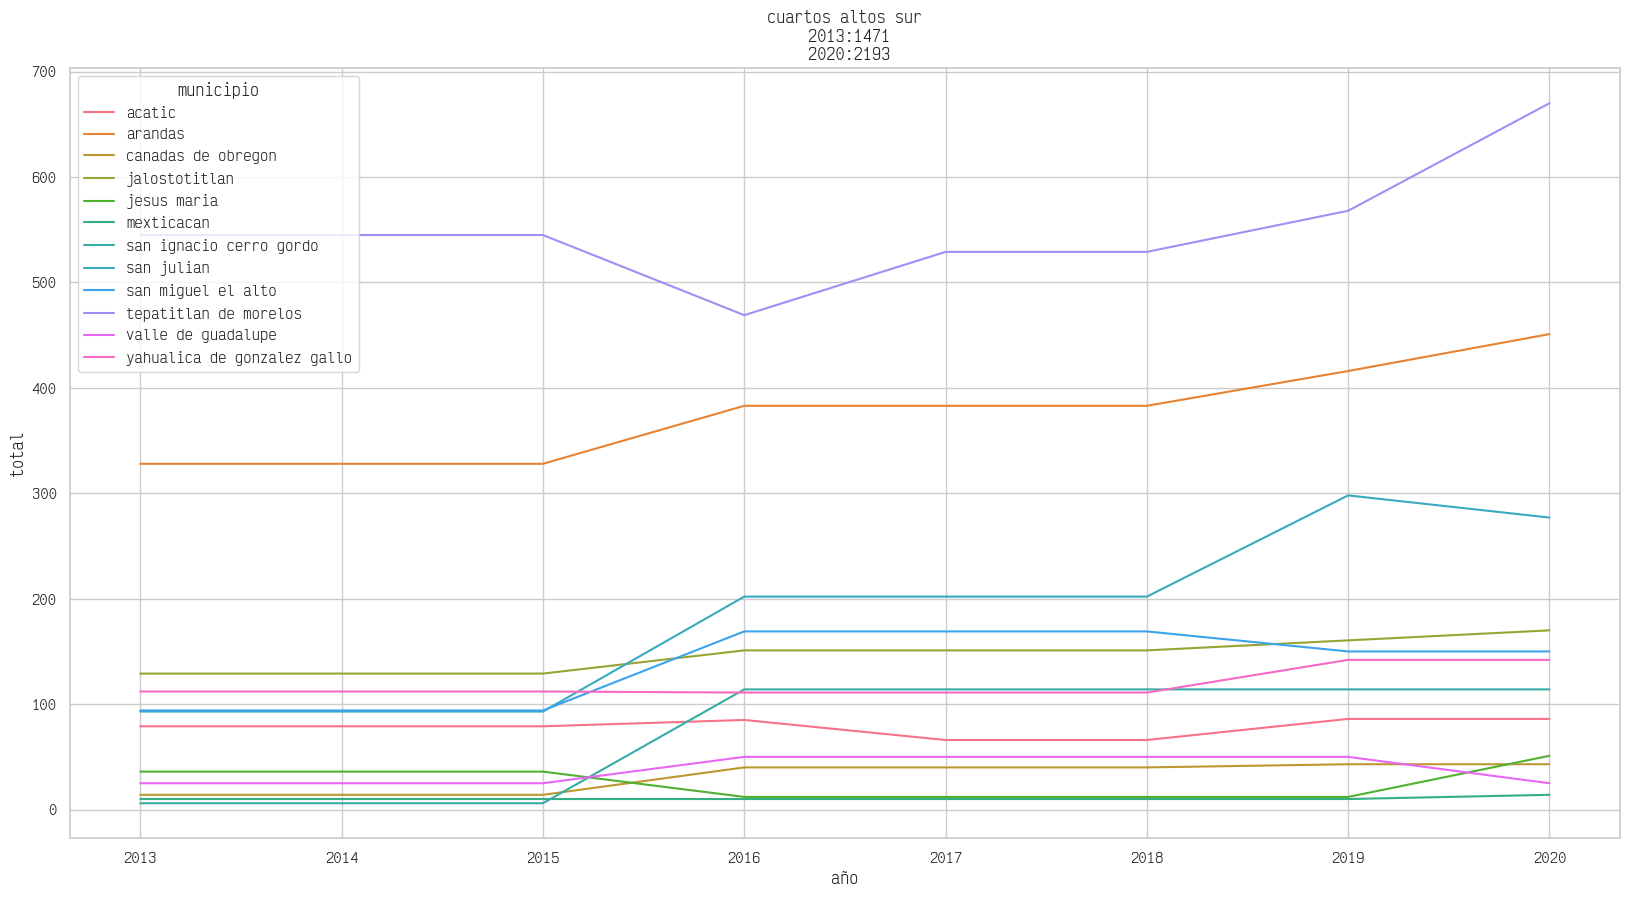

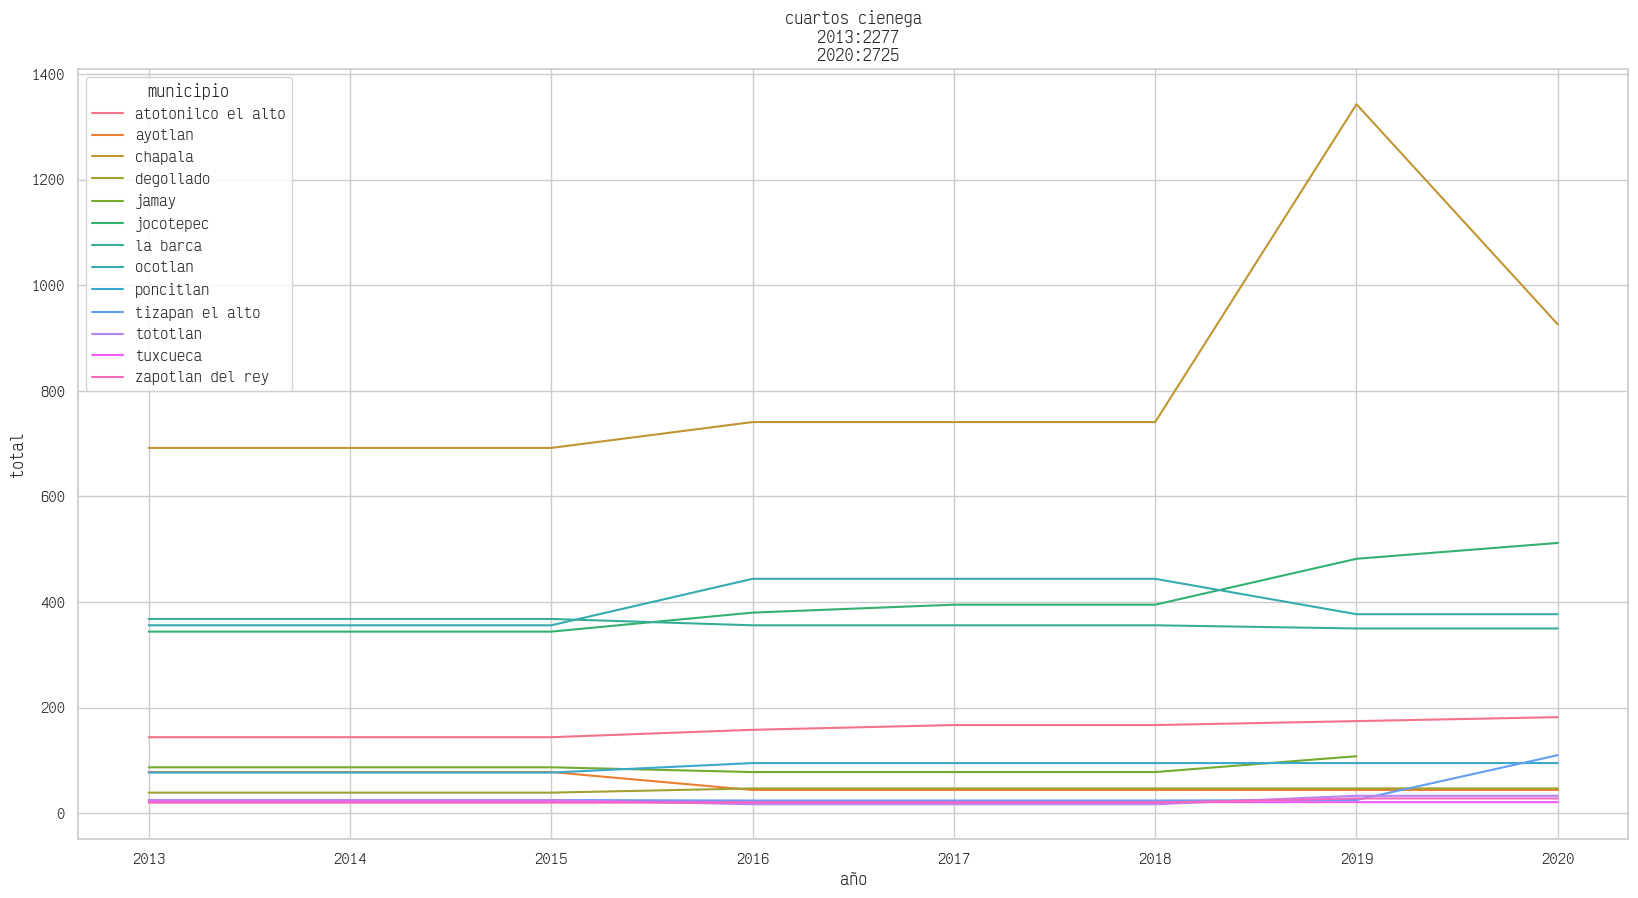

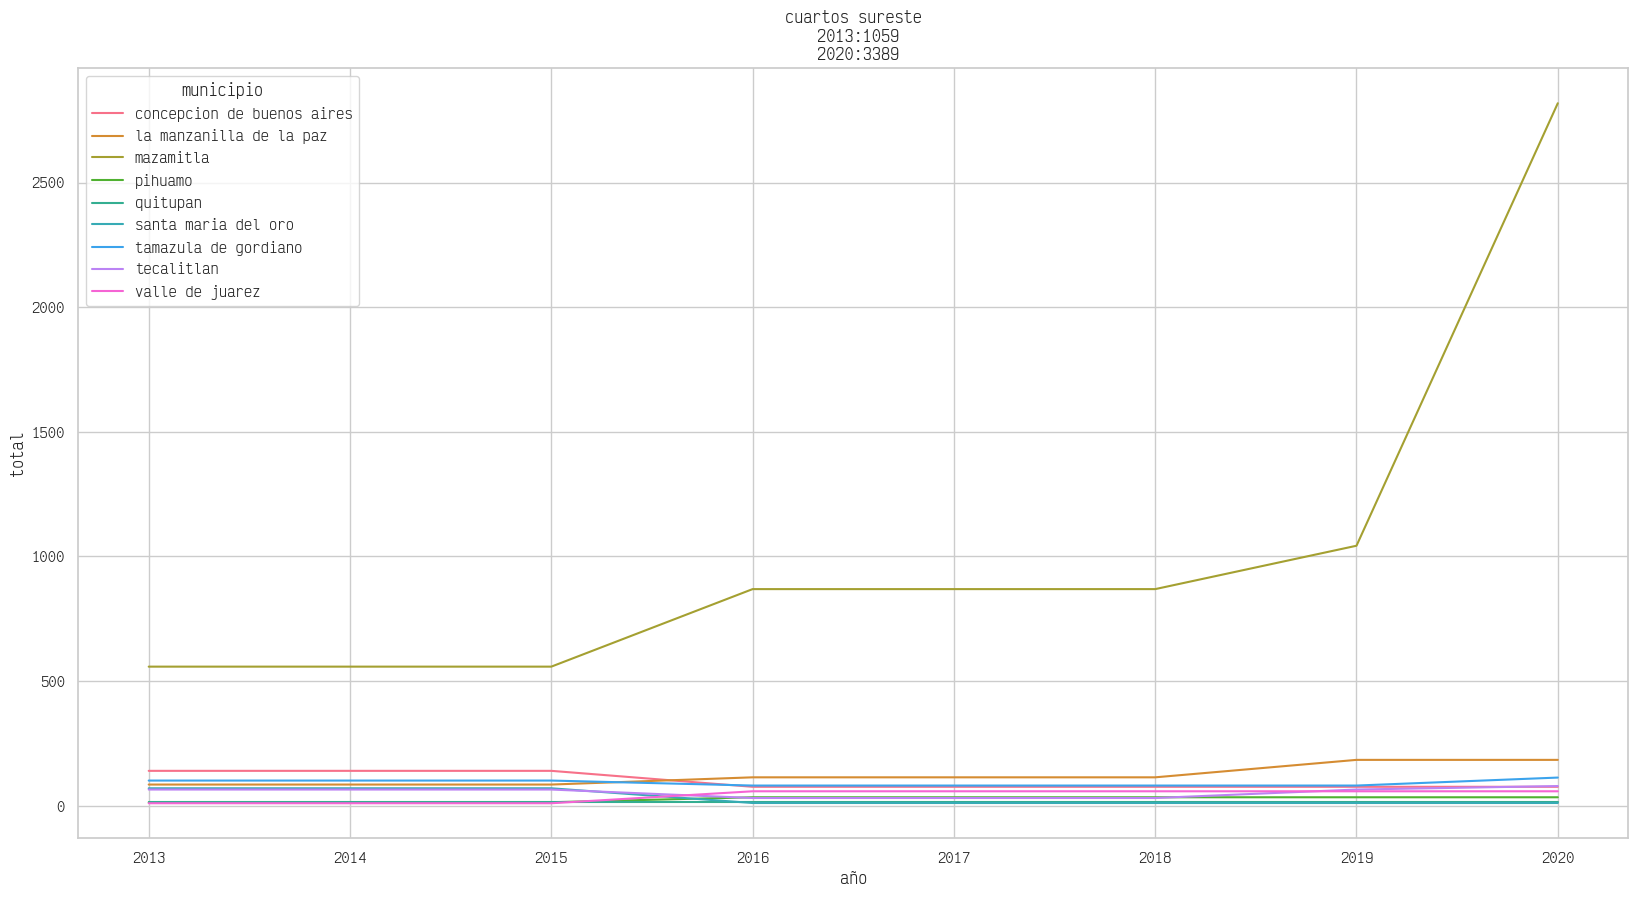

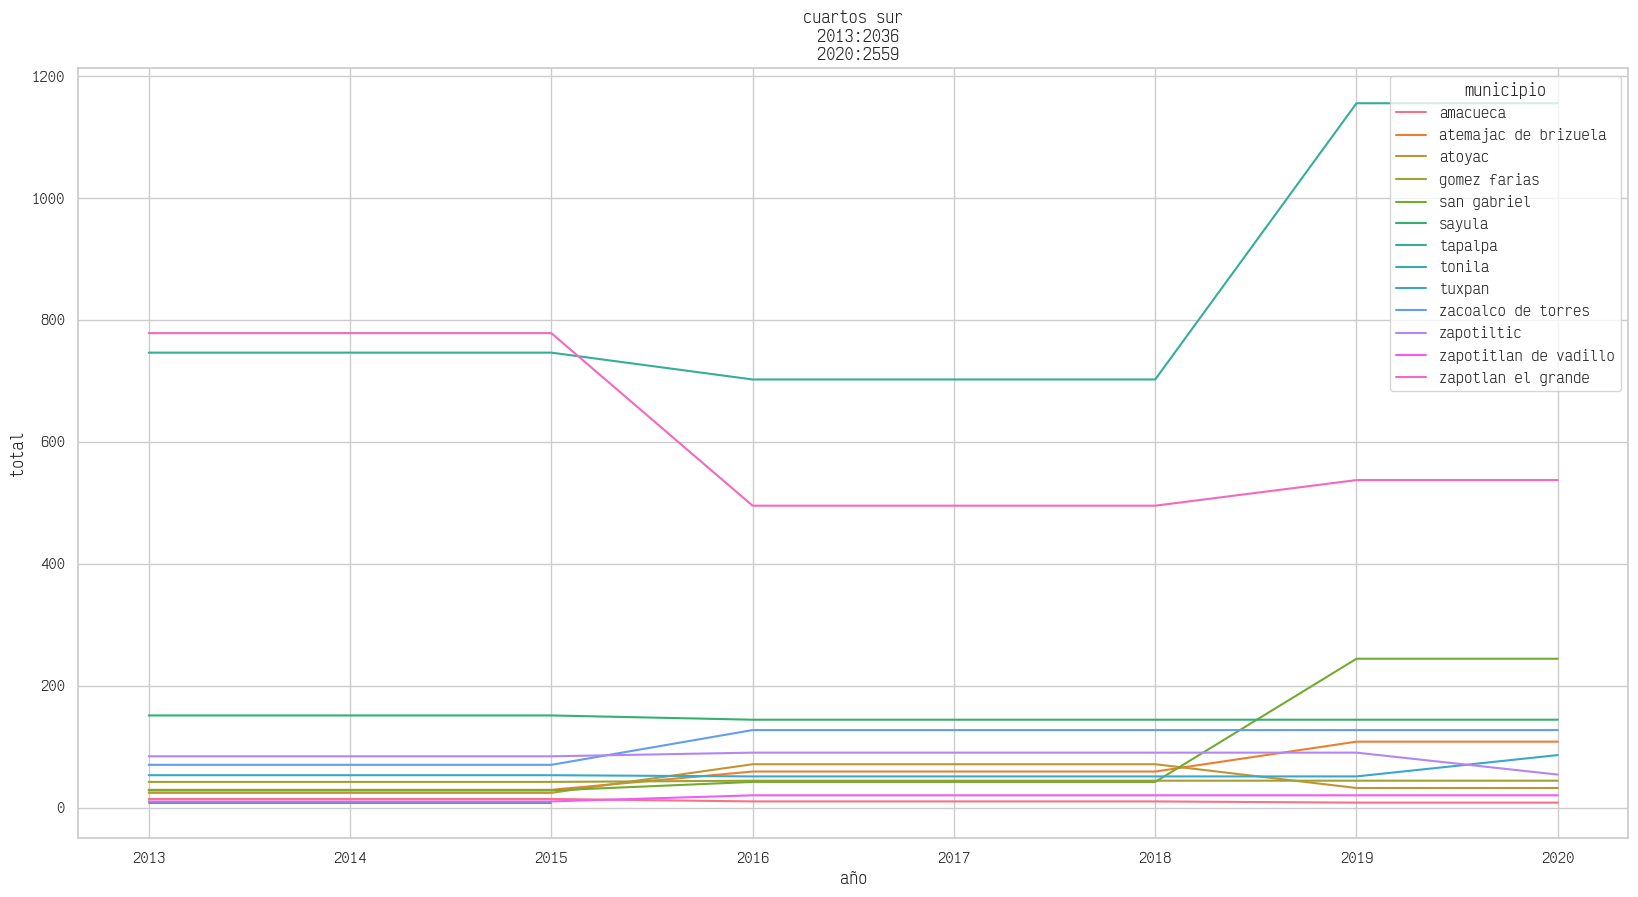

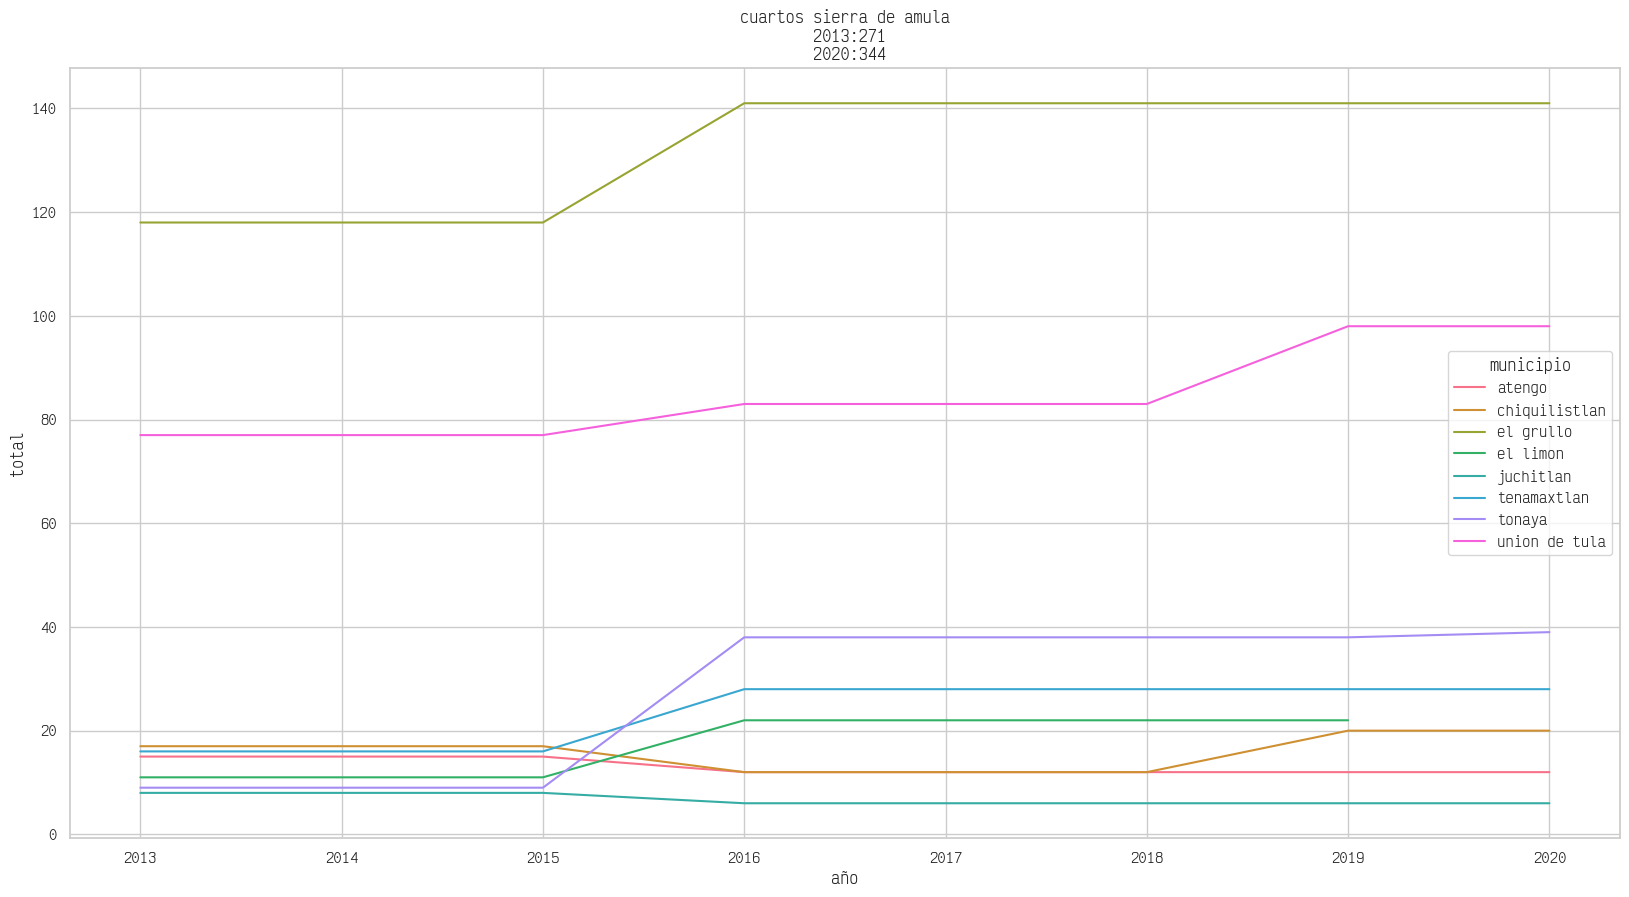

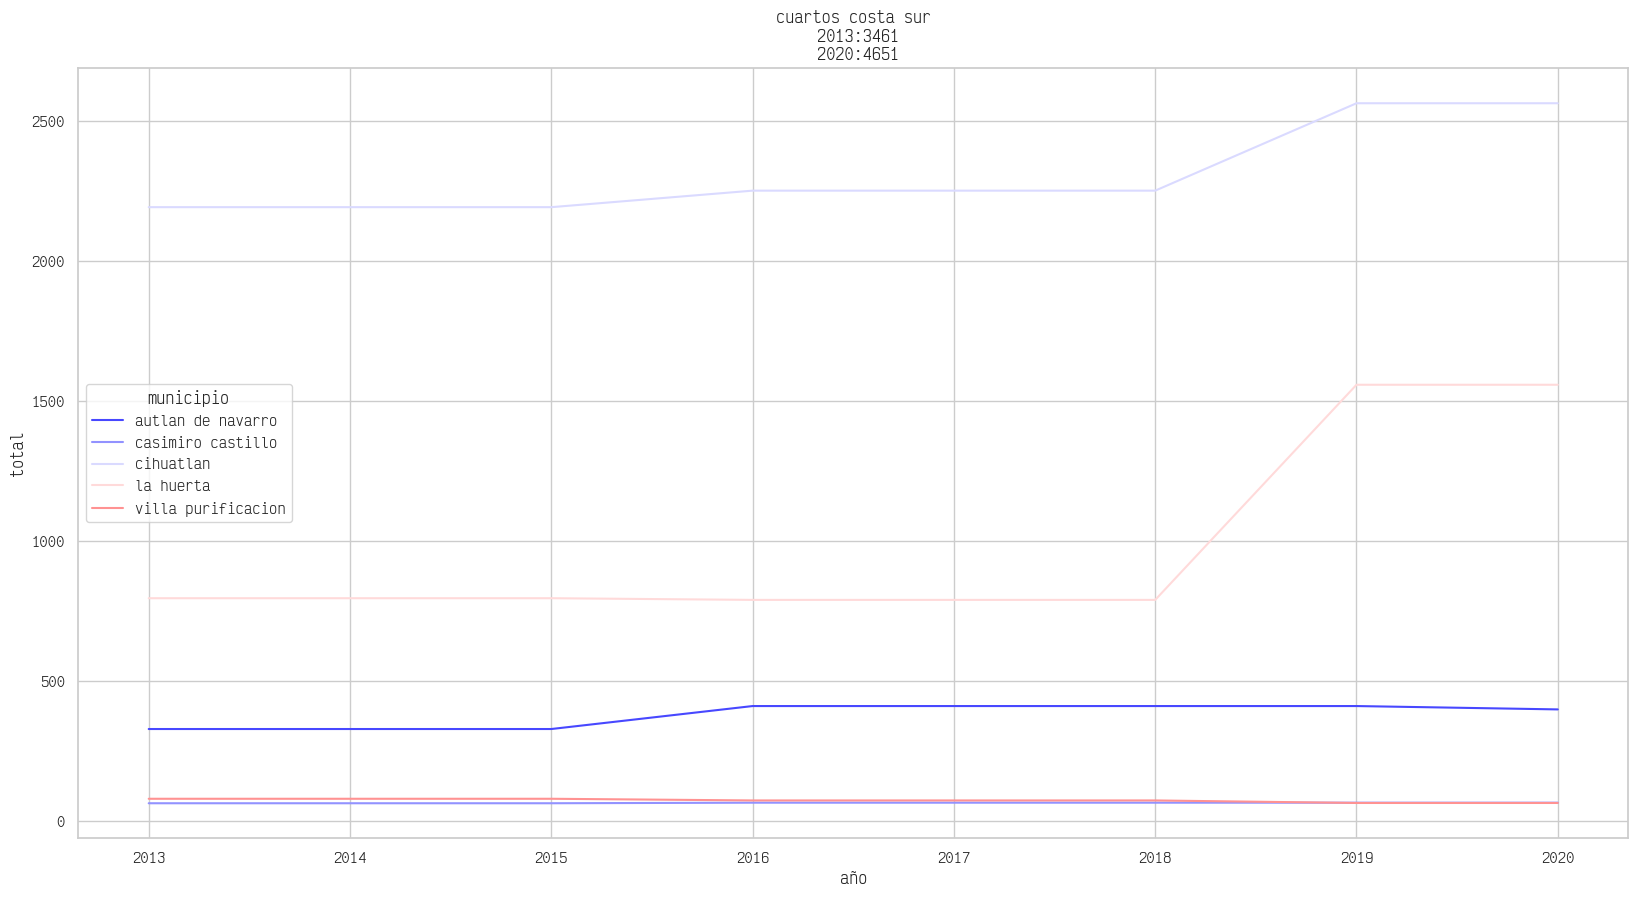

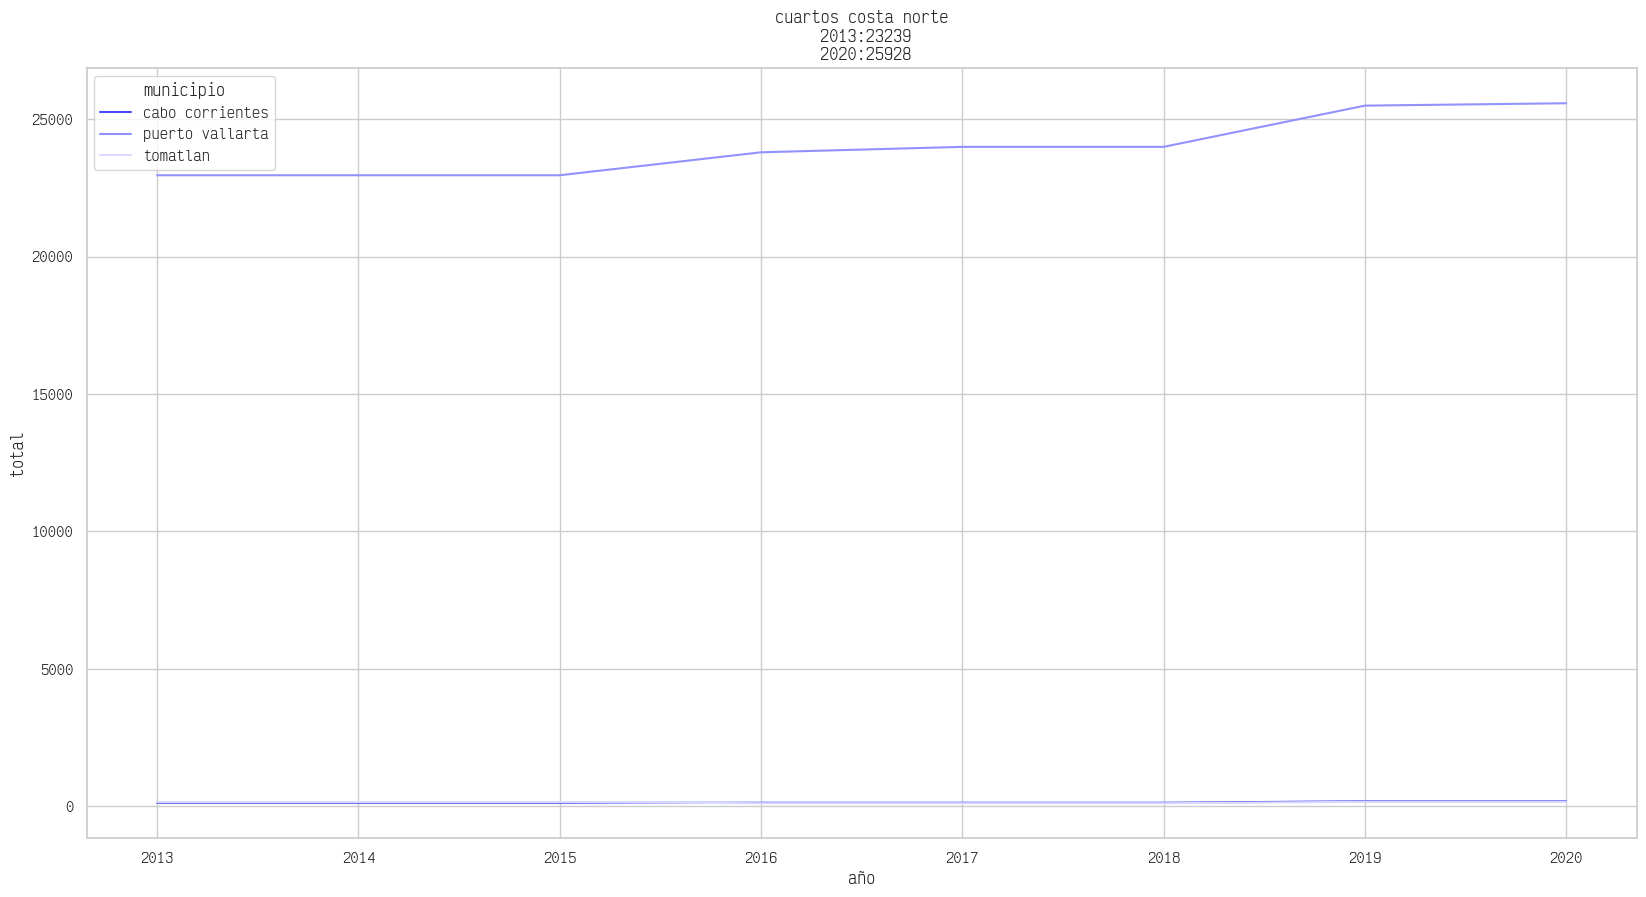

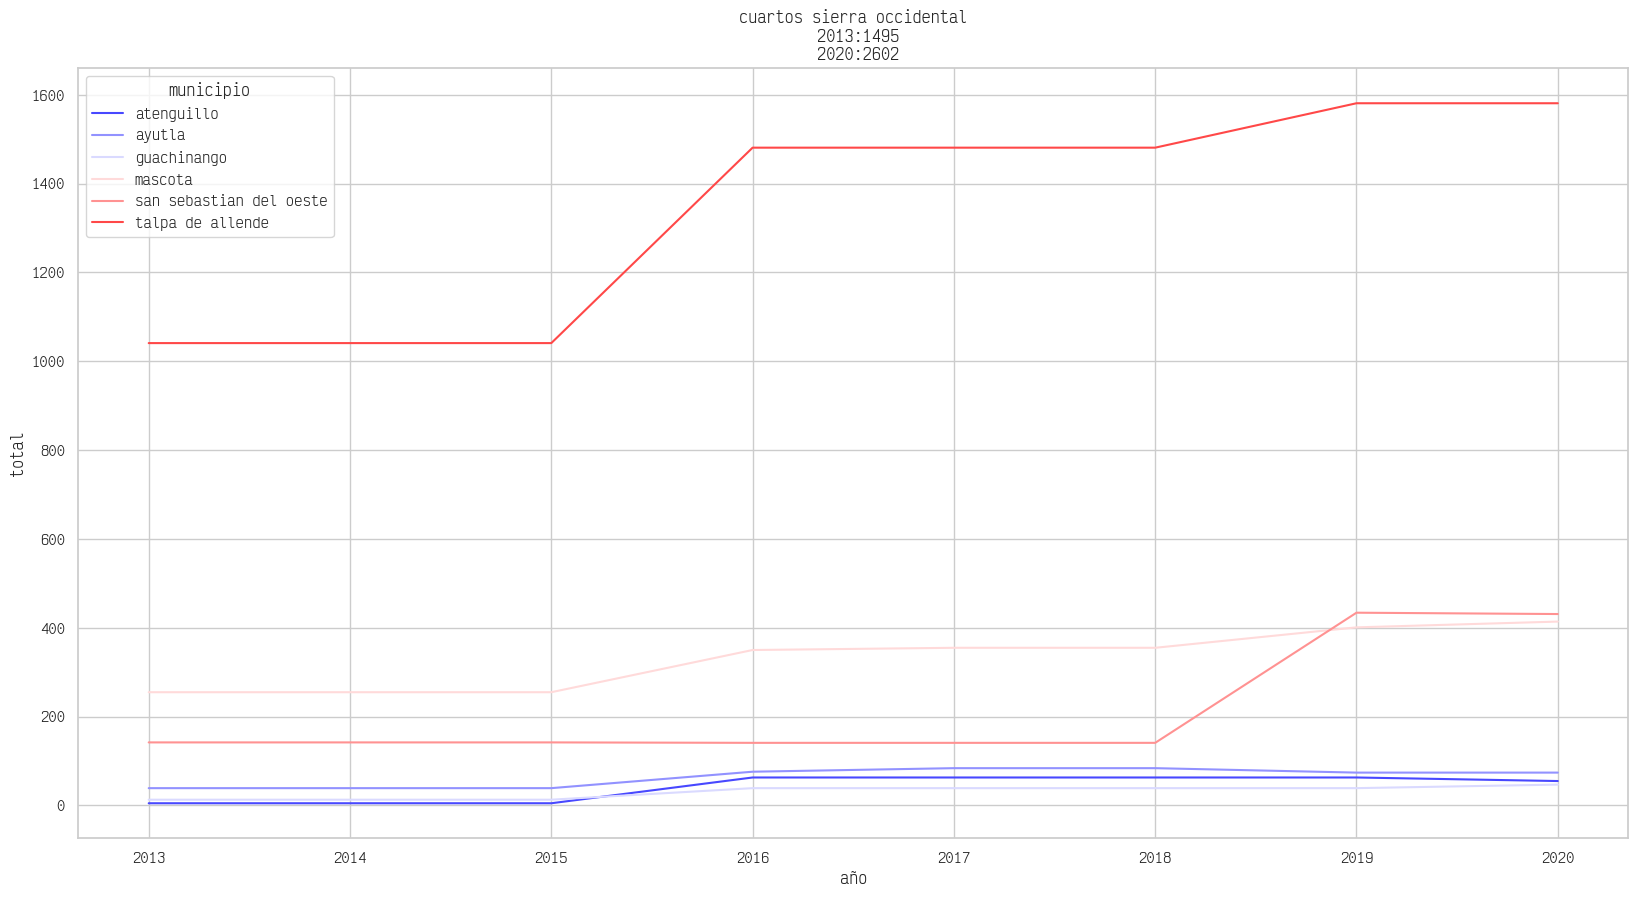

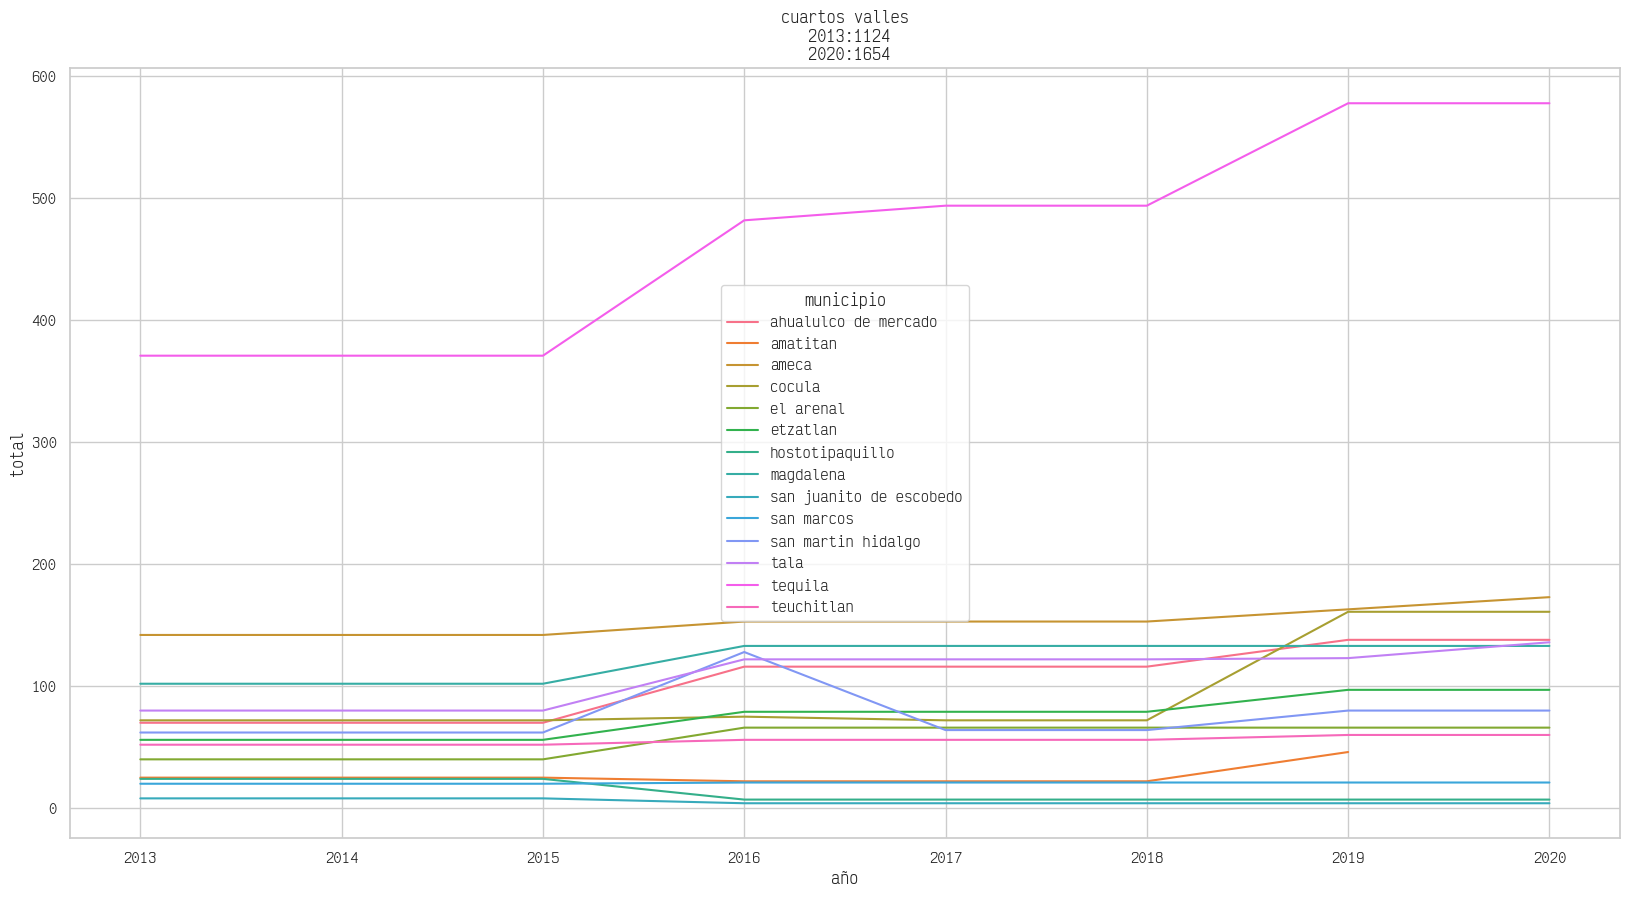

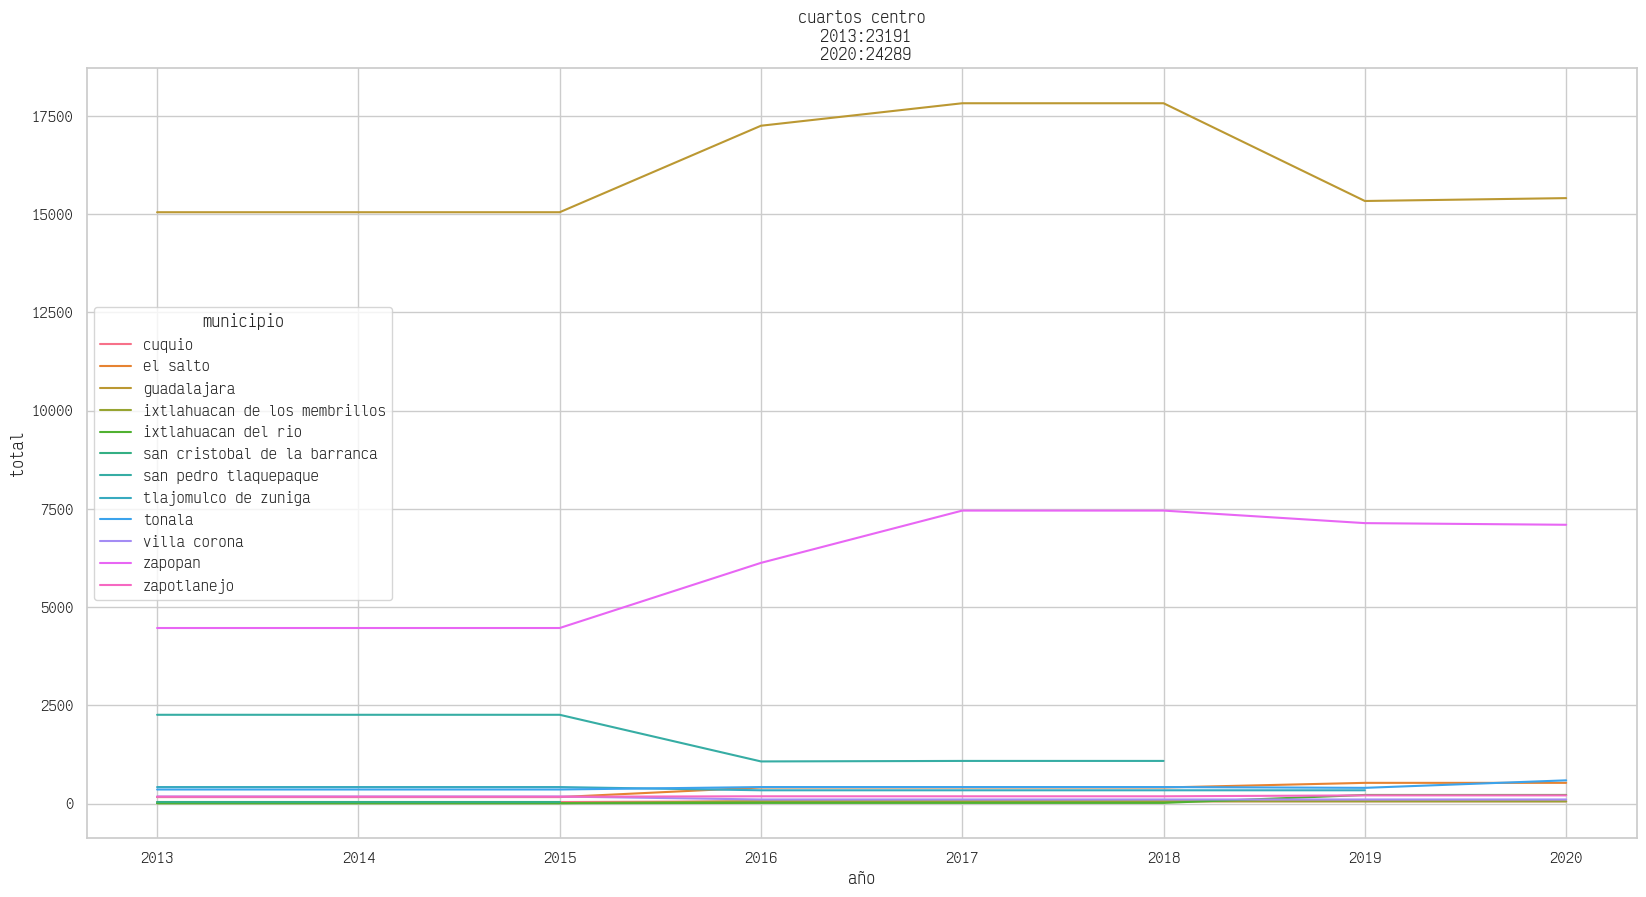

In [70]:
for region in df_cuartos['region'].unique():
    
    df = df_cuartos[df_cuartos['region'] == region]
    total_2013 = df[df['año'] == 2013]['total'].sum()
    total_2020 = df[df['año'] == 2020]['total'].sum()

    fig,ax = plt.subplots(1,1,figsize=(20,10))
    sns.lineplot(df,x='año',y='total',hue='municipio',ax=ax)
    ax.set_title(f'cuartos {region}\n 2013:{total_2013}\n 2020:{total_2020}')

In [71]:

df_hoteles_rel = df_hoteles.copy()
df_hoteles_rel = df_hoteles_rel.drop(df_hoteles_rel[(df_hoteles_rel['año'] != 2013) & (df_hoteles_rel['año'] != 2020)].index)


df_hoteles_rel = df_hoteles_rel.groupby('municipio')

In [72]:

df_hoteles_rel.apply(lambda x:x)

municipio  total  5 estrella  4 estrella  \
municipio                                                                       
acatic               17                 acatic      5           0           0   
                     801                acatic      4           0           0   
acatlan de juarez    802     acatlan de juarez      1           0           0   
ahualulco de mercado 87   ahualulco de mercado      5           1           1   
                     803  ahualulco de mercado      9           1           3   
...                                        ...    ...         ...         ...   
zapotlan del rey     915      zapotlan del rey      2           1           0   
zapotlan el grande   63     zapotlan el grande     15           3           2   
                     916    zapotlan el grande     15           0           2   
zapotlanejo          112           zapotlanejo      7           0           1   
                     917           zapotlanejo     13           0           1   

                          3 estrella  2 estrella  1 estrella  sin catego  \
municipio                                                                  
acatic               17            0           1           1           3   
                     801           1           0           1           2   
acatlan de juarez    802           1           0           0           0   
ahualulco de mercado 87            0           0           1           2   
                     803           0           0           0           5   
...                              ...         ...         ...         ...   
zapotlan del rey     915           1           0           0           0   
zapotlan el grande   63            5           4           0           1   
                     916           7           3           3           0   
zapotlanejo          112           3           0           2           1   
                     917           7           1           0           4   

                           año     region                        geometry  
municipio                                                                  
acatic               17   2013  altos sur  POINT (721413.033 2295270.773)  
                     801  2020  altos sur  POINT (723640.936 2303926.883)  
acatlan de juarez    802  2020       None  POINT (647818.662 2257183.476)  
ahualulco de mercado 87   2013     valles  POINT (613898.362 2285288.976)  
                     803  2020     valles  POINT (613527.753 2285892.809)  
...                        ...        ...                             ...  
zapotlan del rey     915  2020    cienega  POINT (715402.863 2260922.967)  
zapotlan el grande   63   2013        sur  POINT (650334.522 2178502.194)  
                     916  2020        sur  POINT (655597.466 2180956.957)  
zapotlanejo          112  2013     centro   POINT (699779.84 2288093.911)  
                     917  2020     centro  POINT (702246.886 2279903.592)  

[230 rows x 11 columns]

C:\Users\fofoy\AppData\Local\Temp\ipykernel_30728\2412613808.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(1,1)


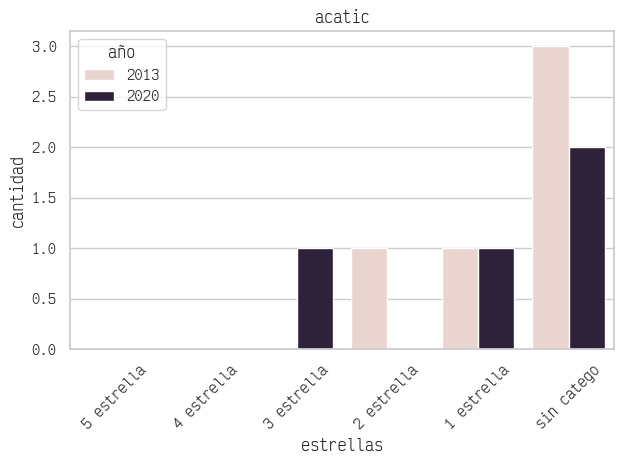

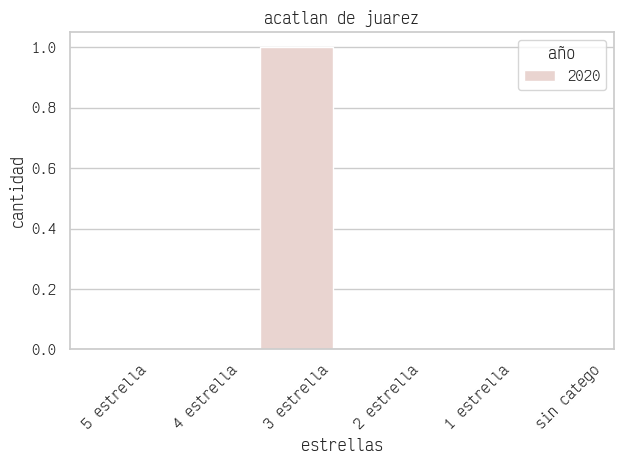

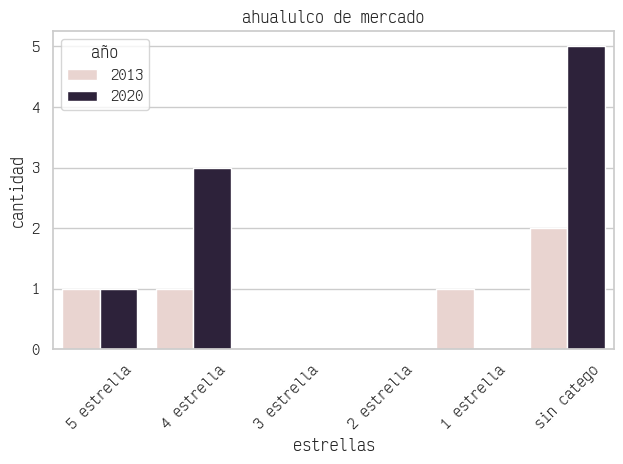

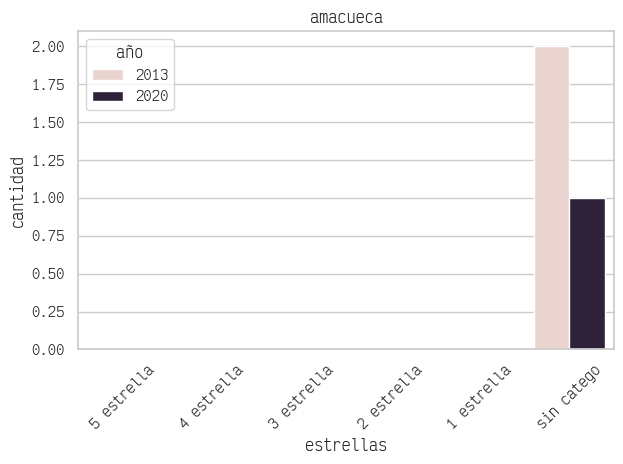

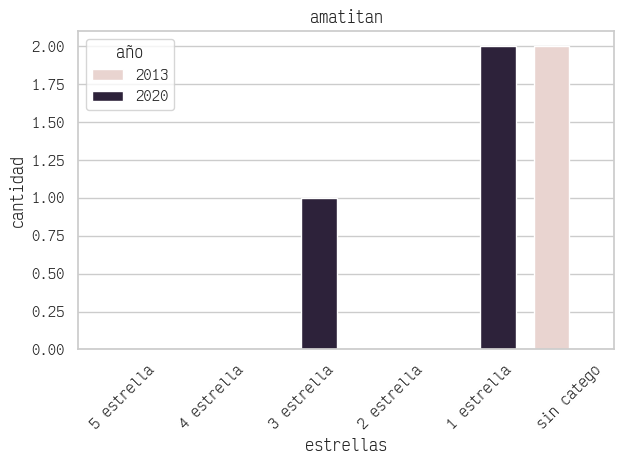

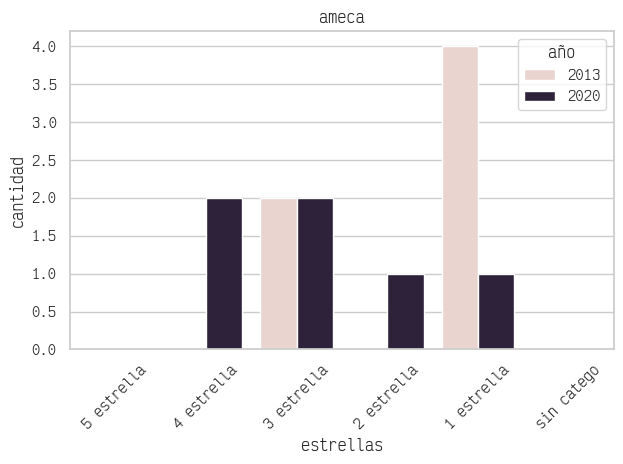

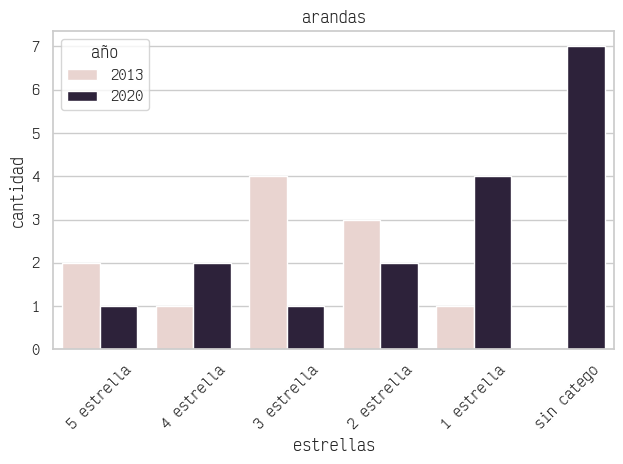

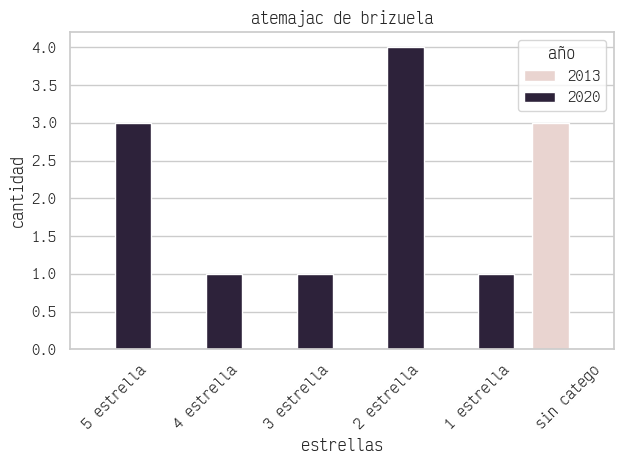

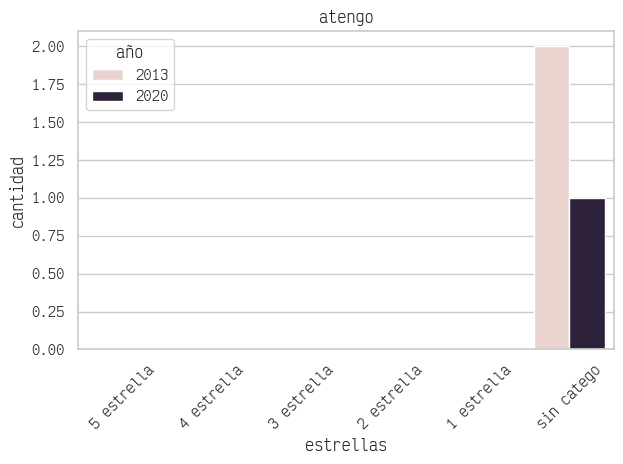

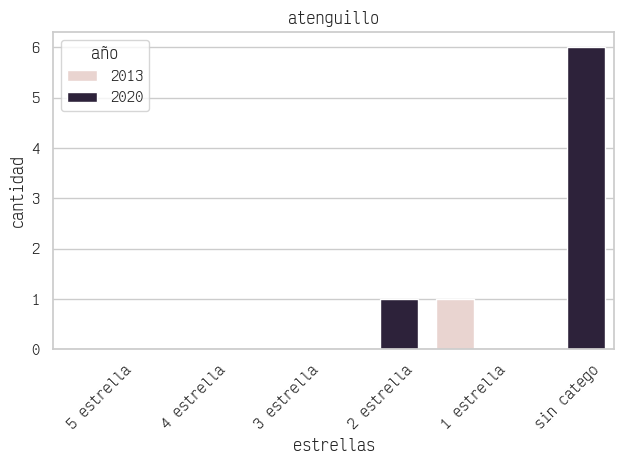

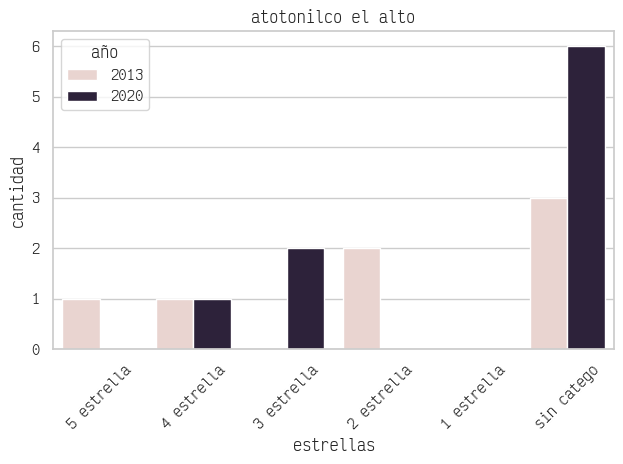

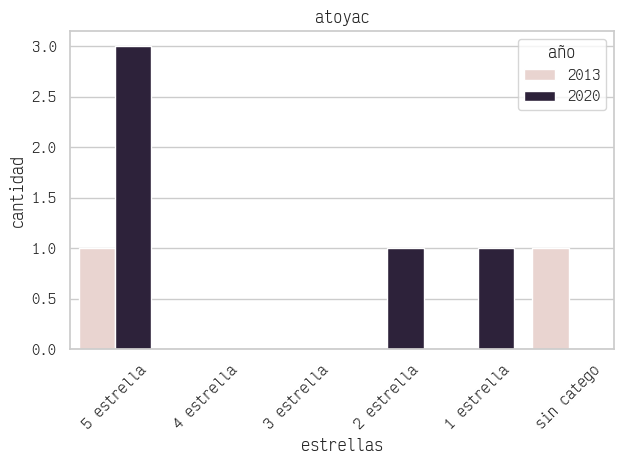

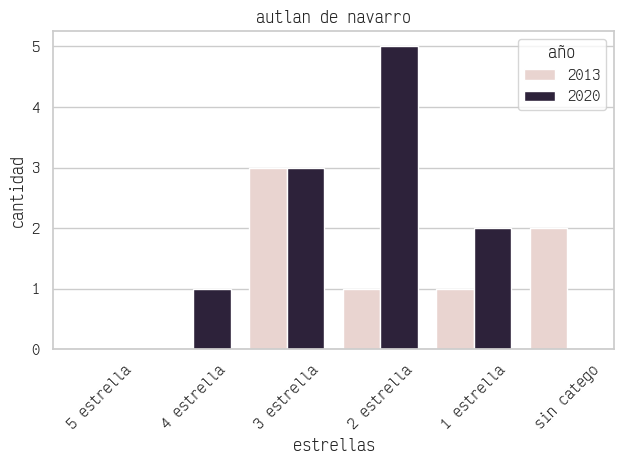

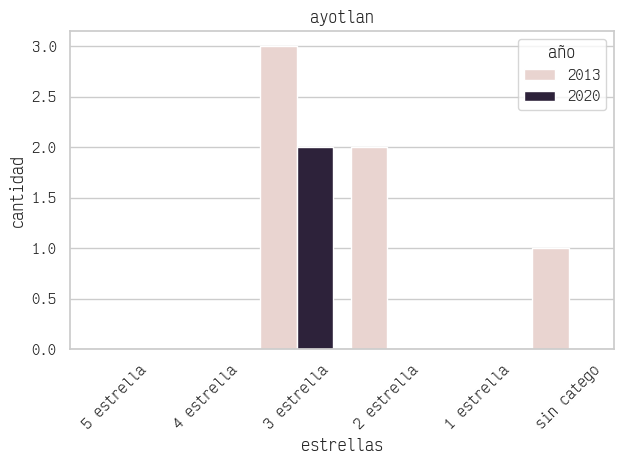

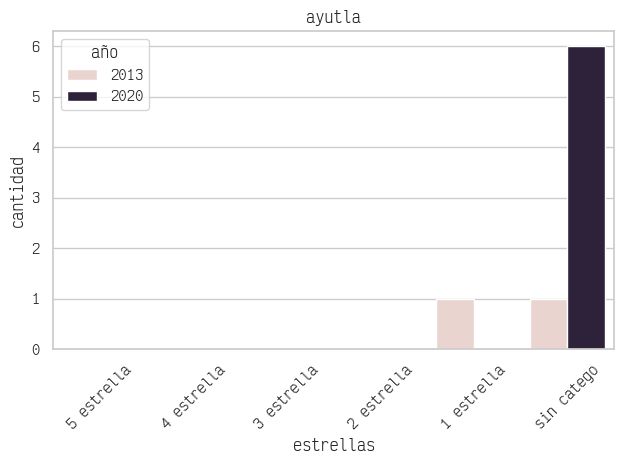

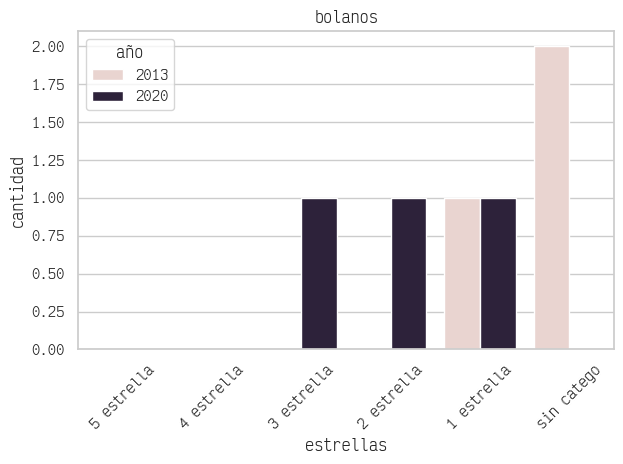

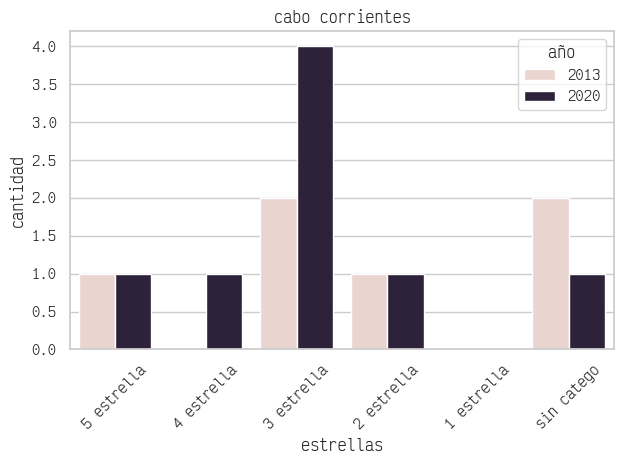

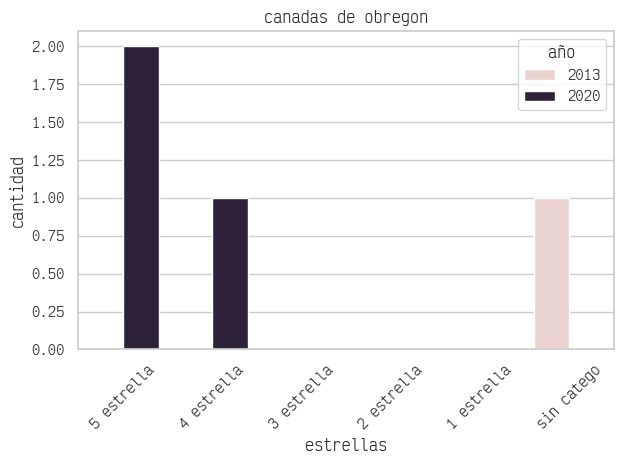

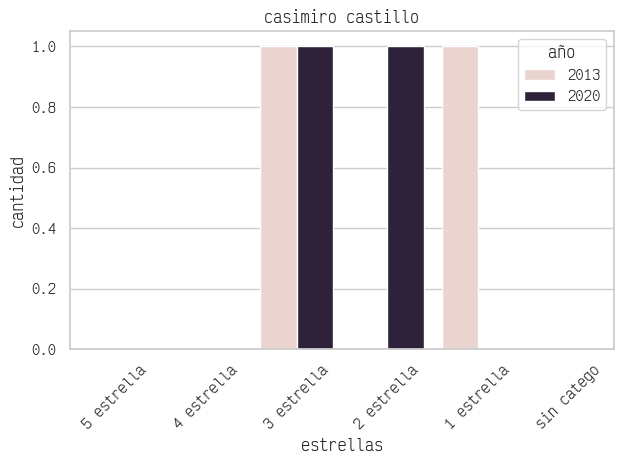

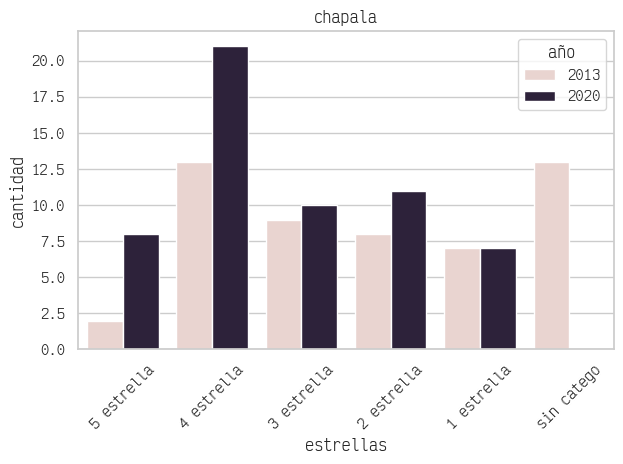

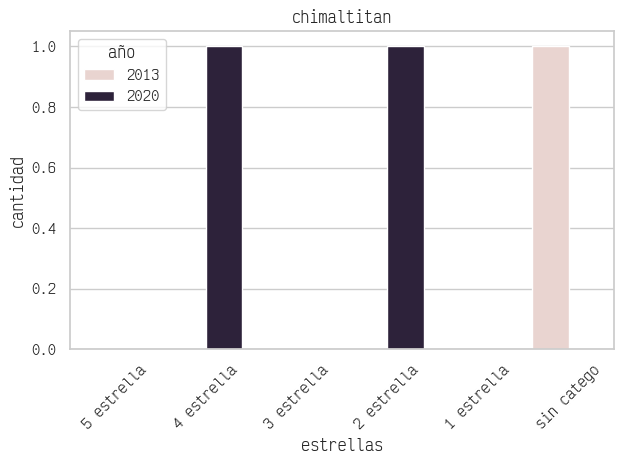

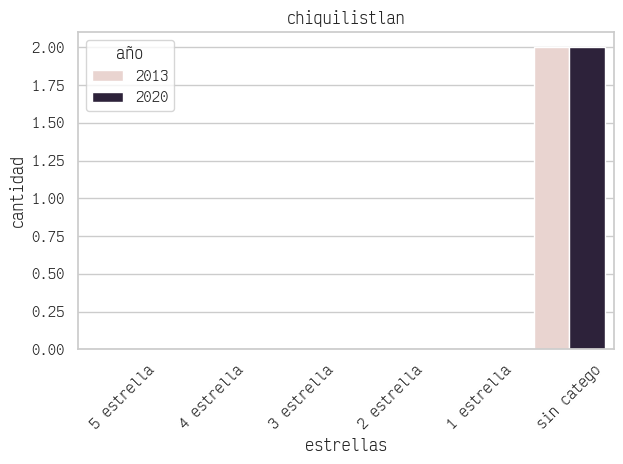

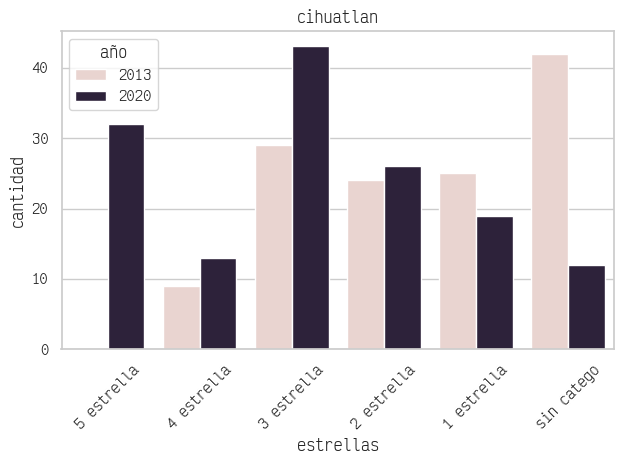

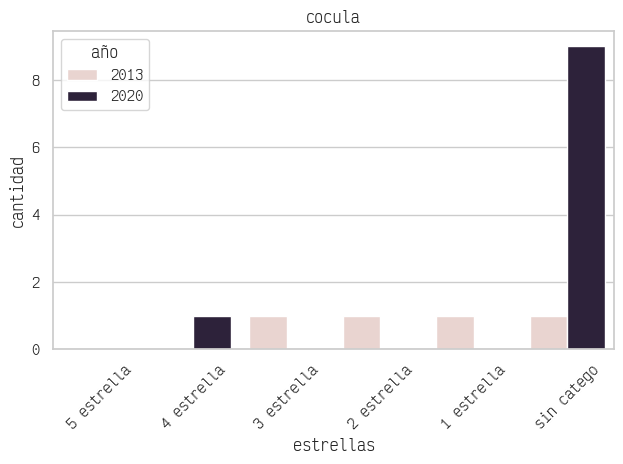

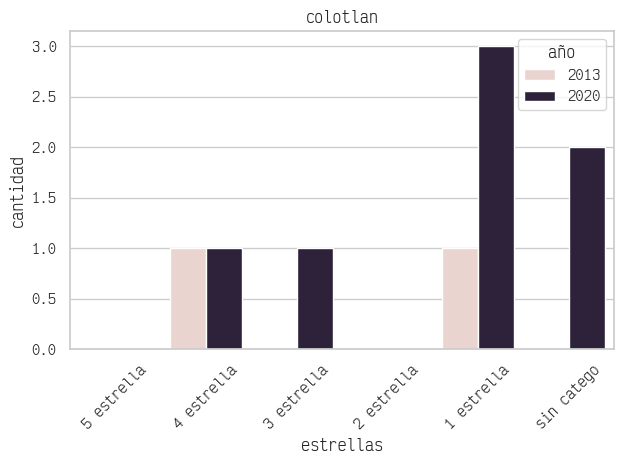

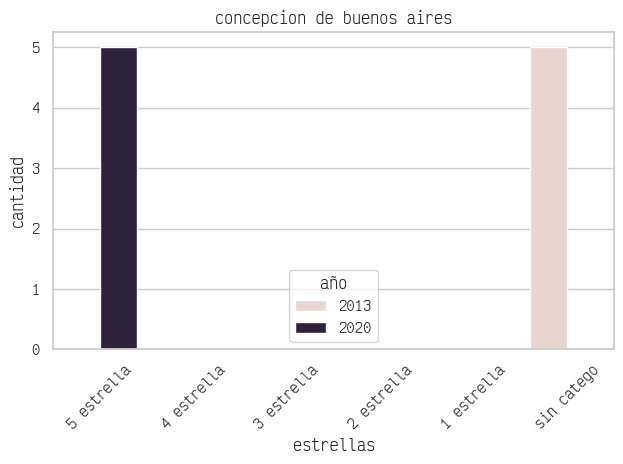

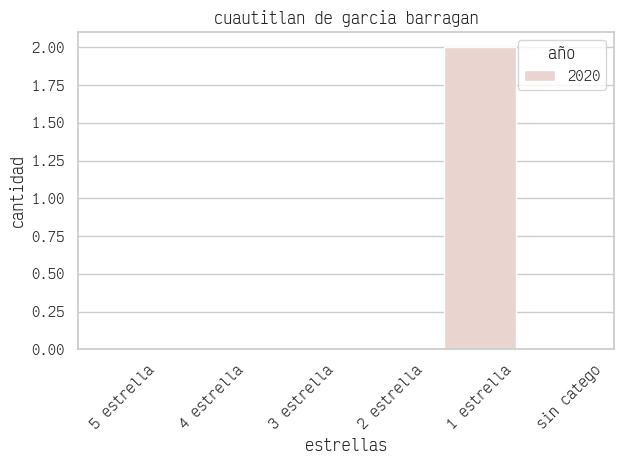

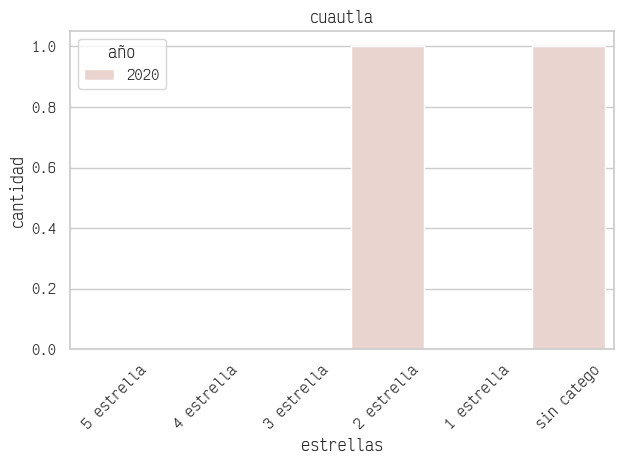

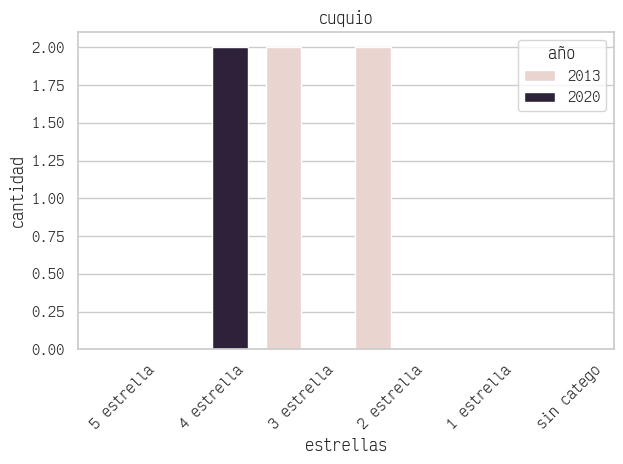

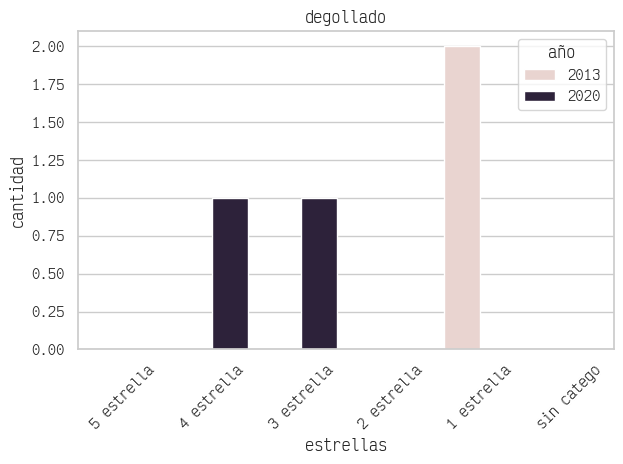

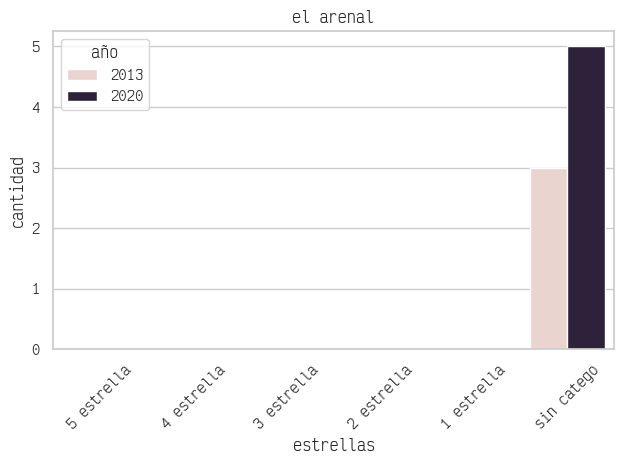

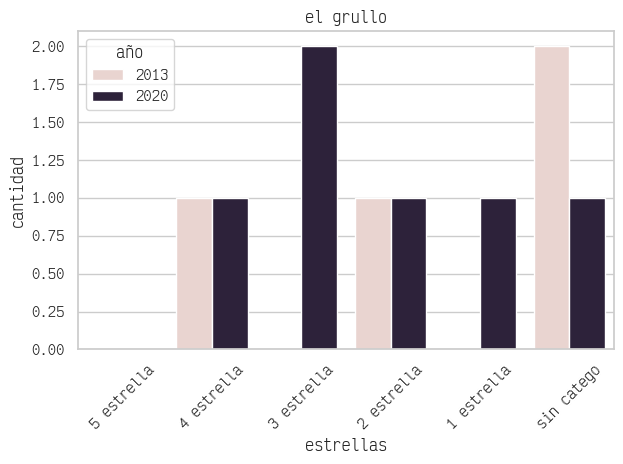

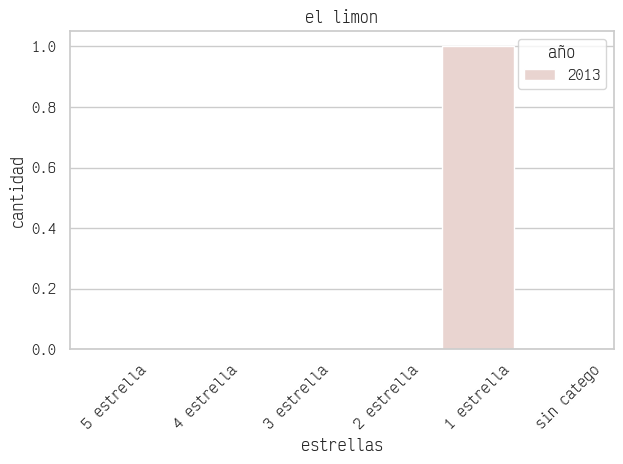

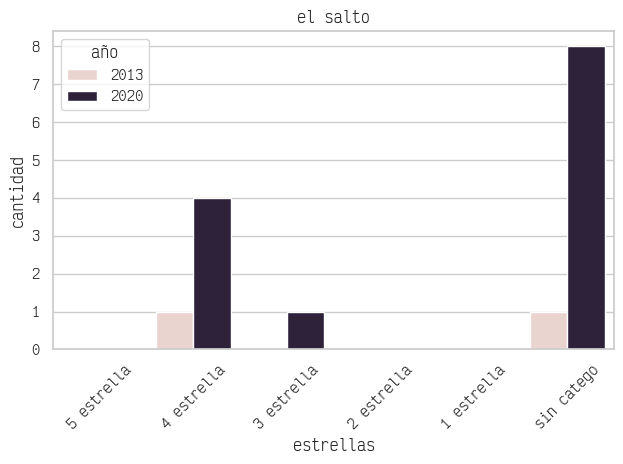

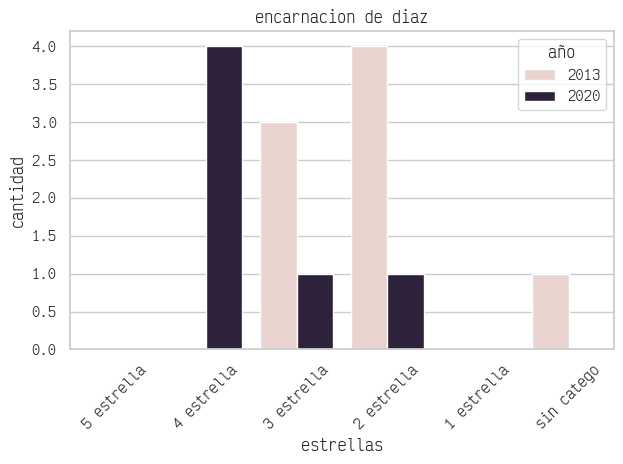

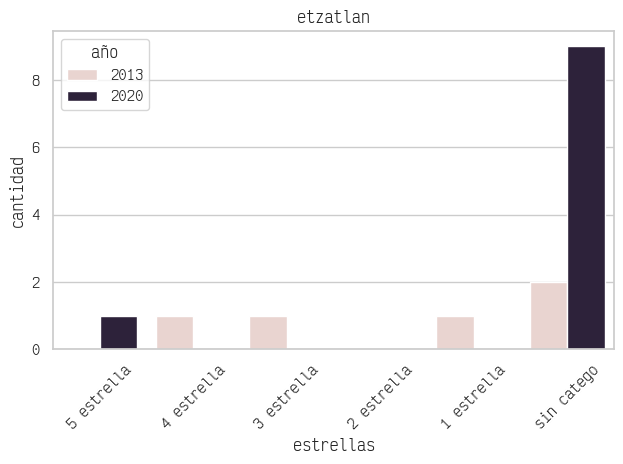

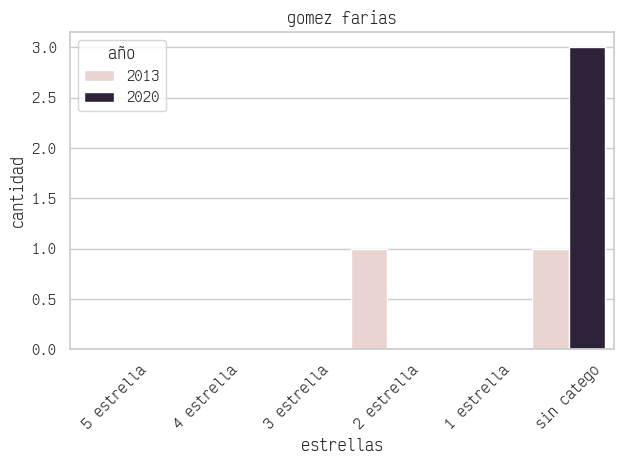

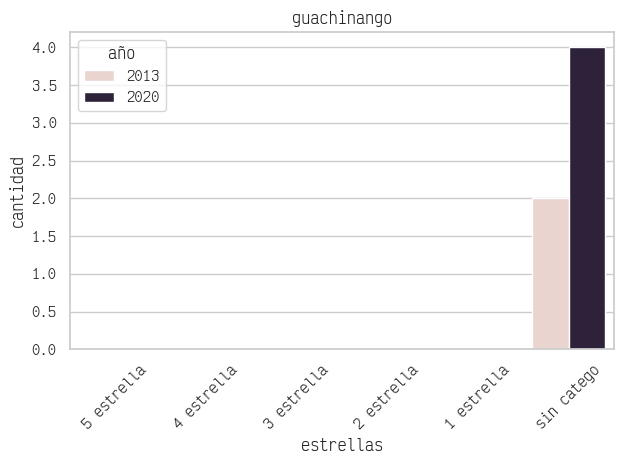

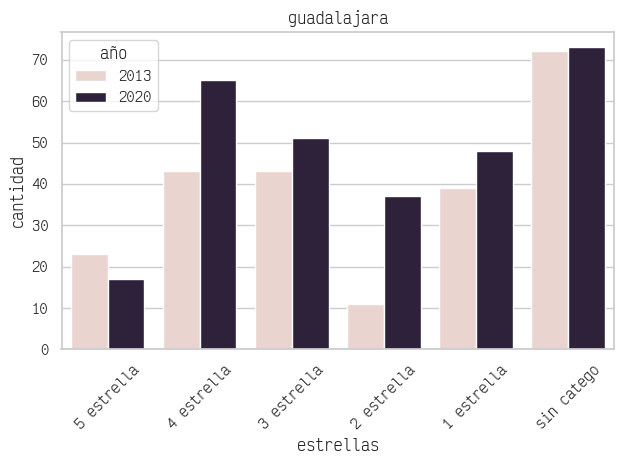

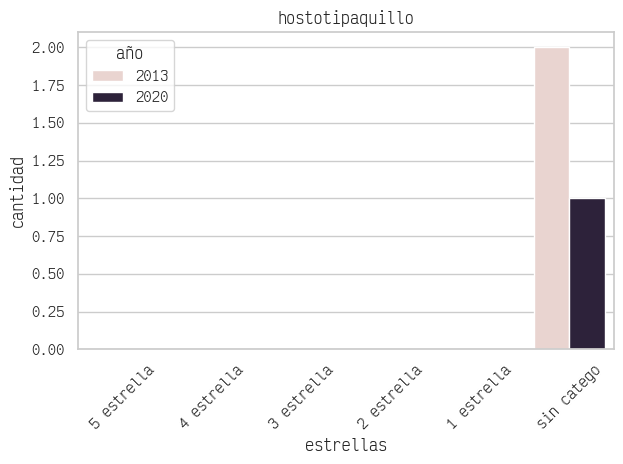

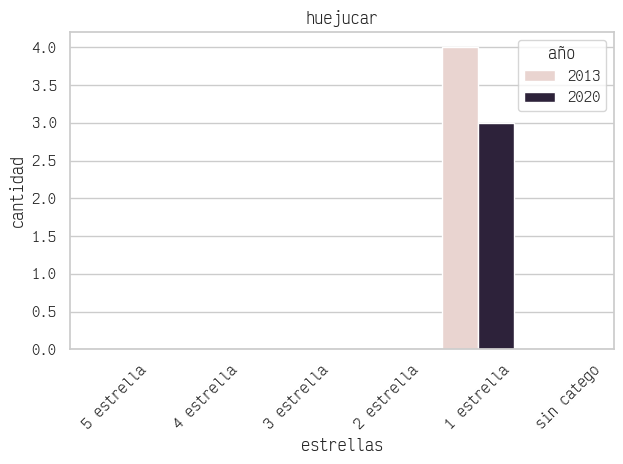

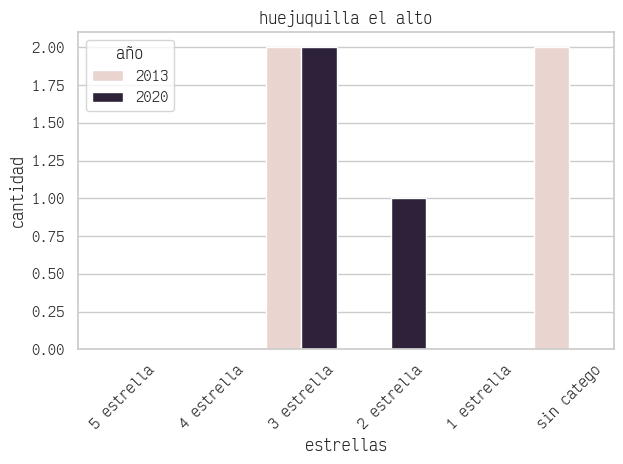

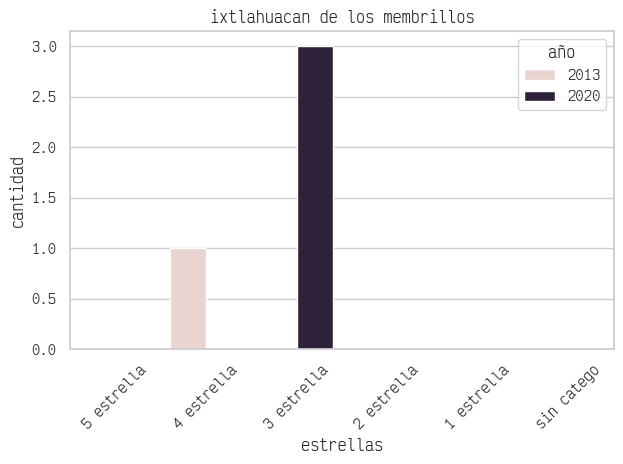

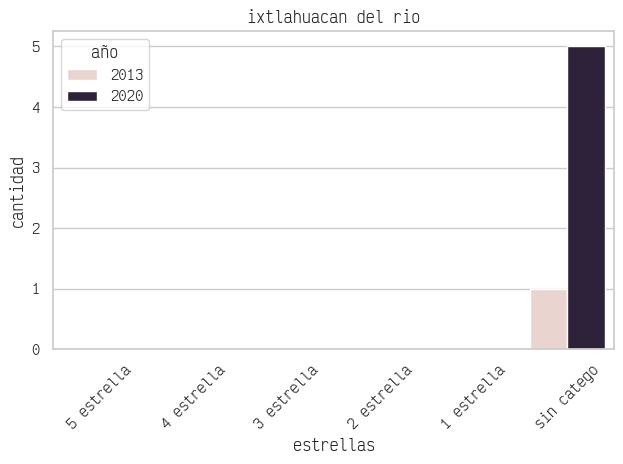

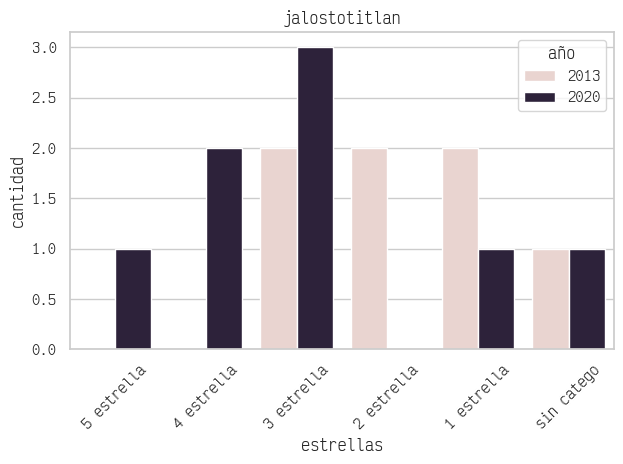

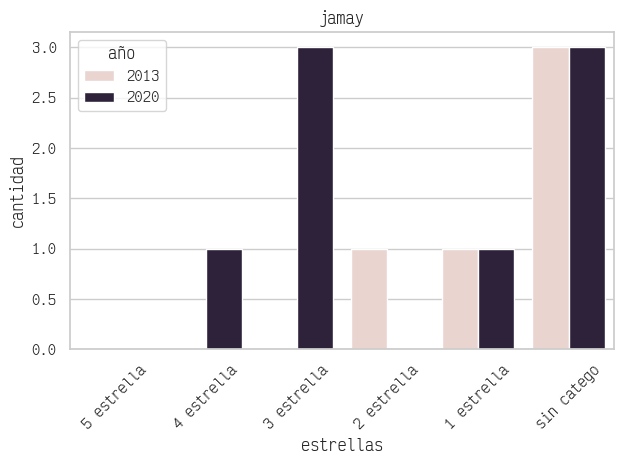

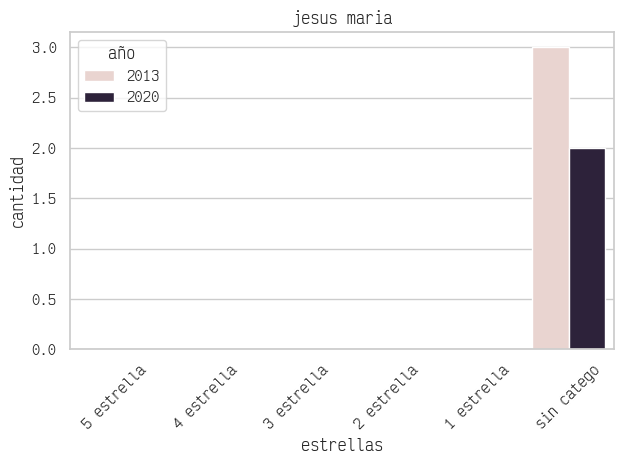

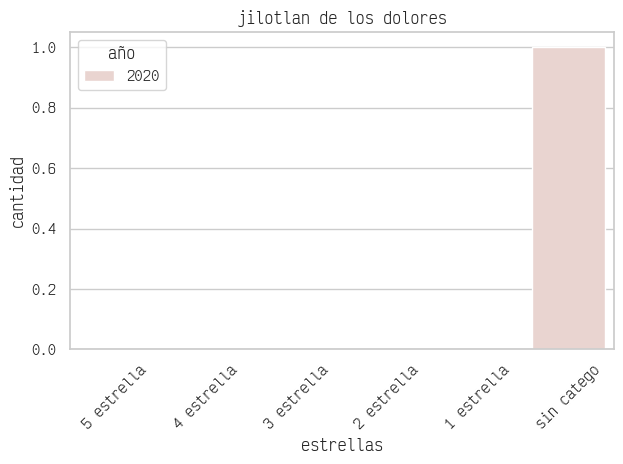

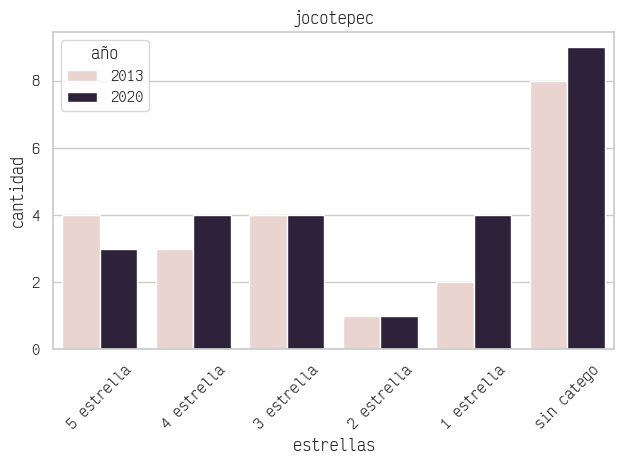

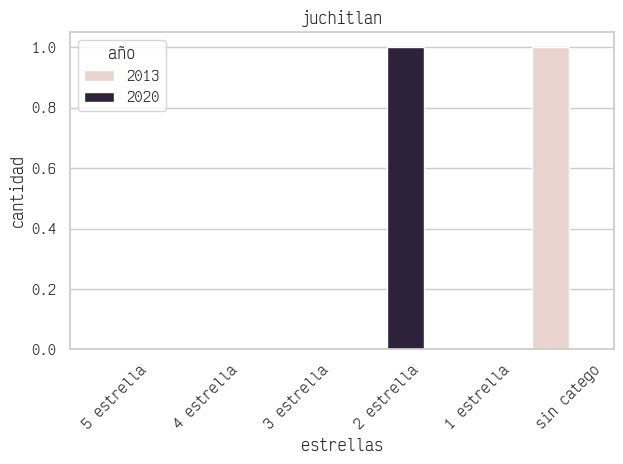

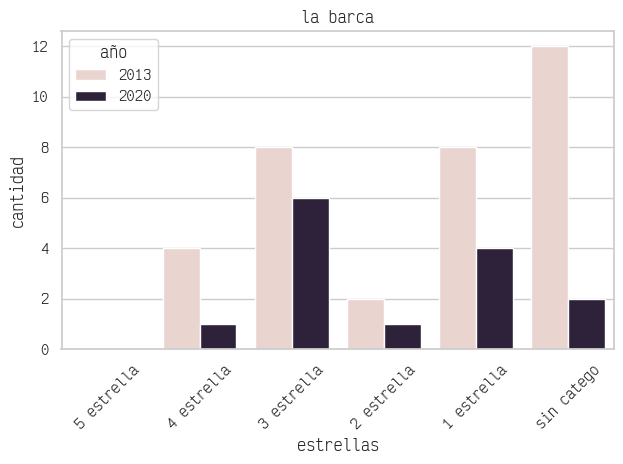

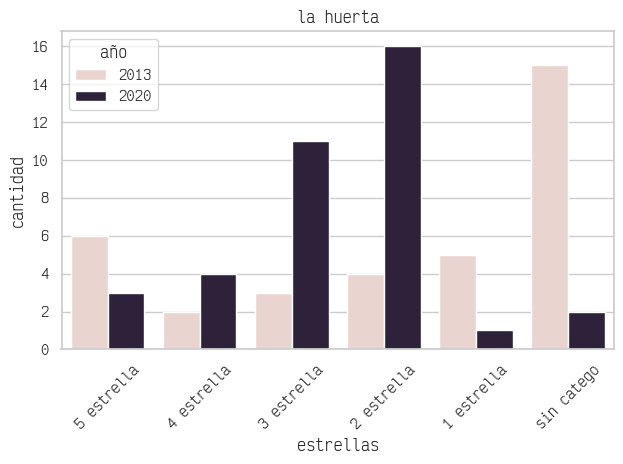

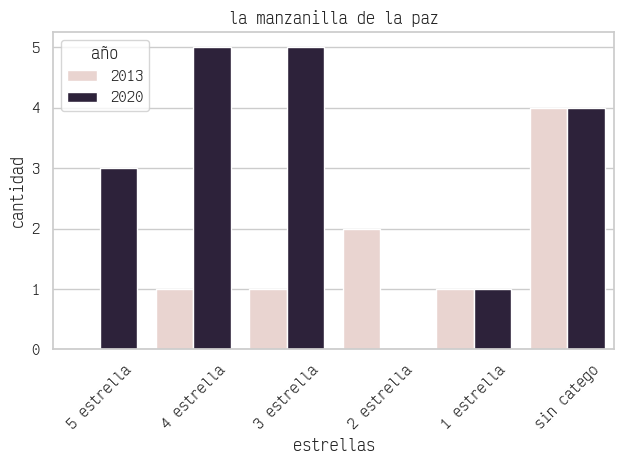

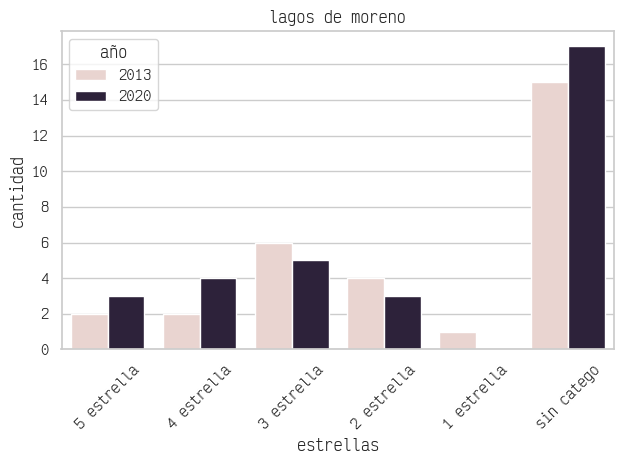

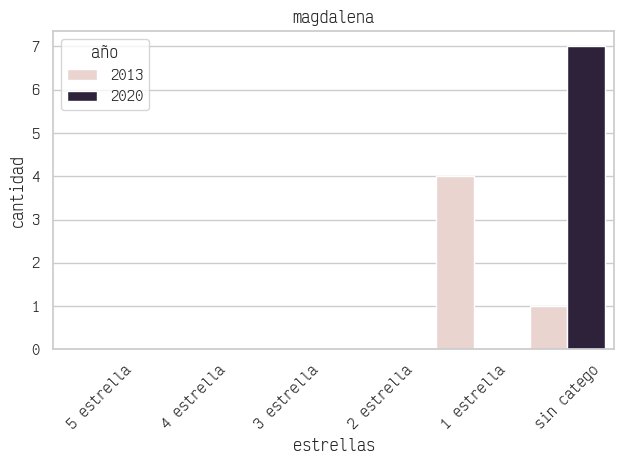

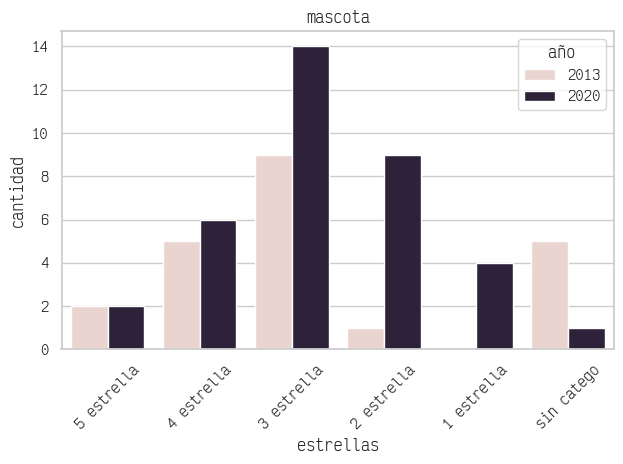

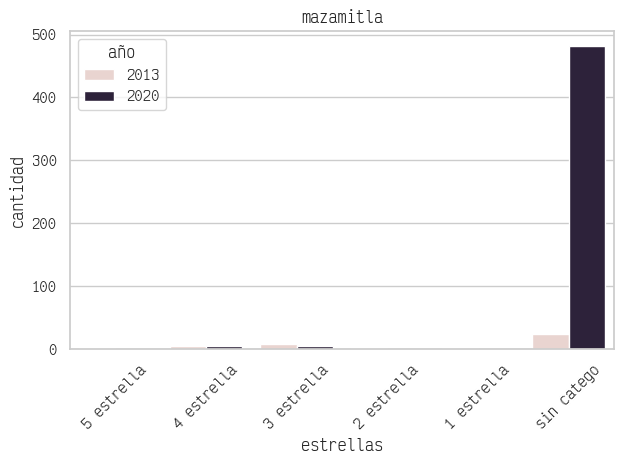

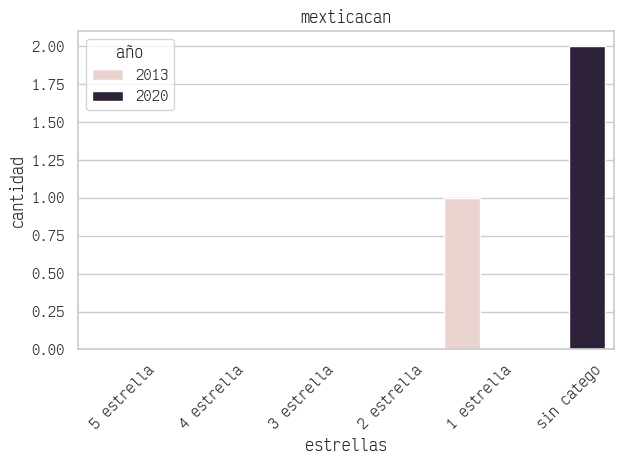

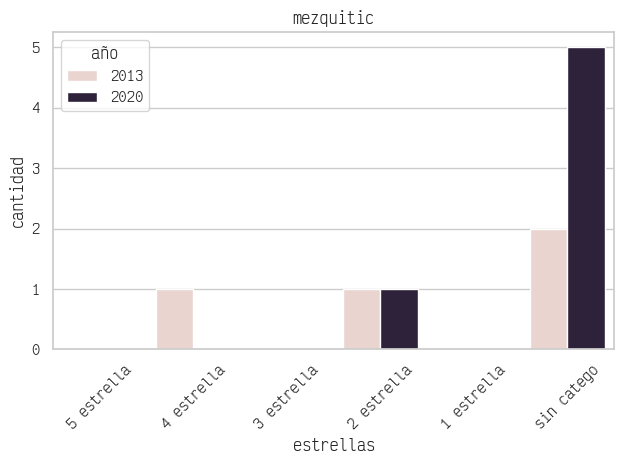

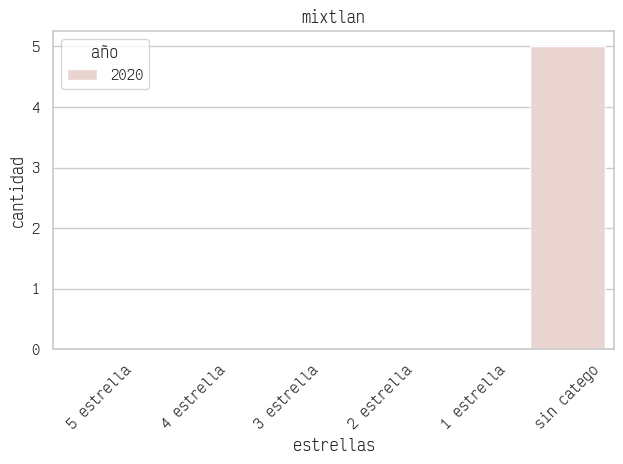

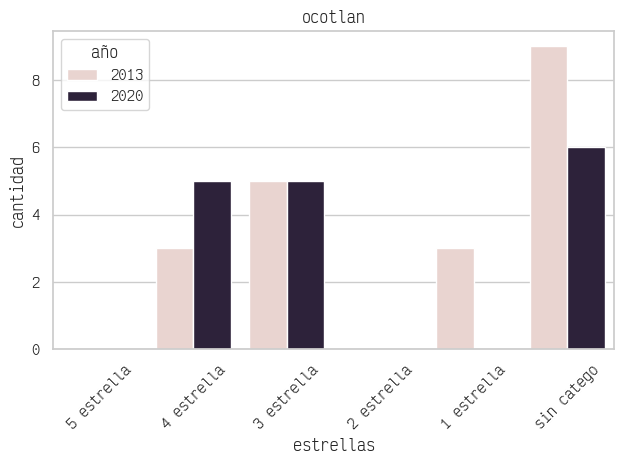

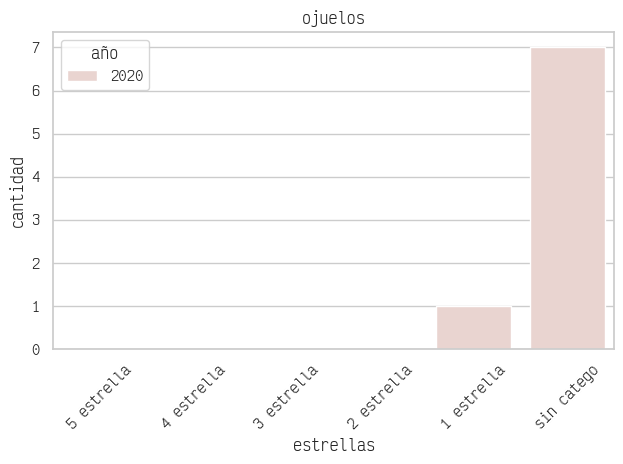

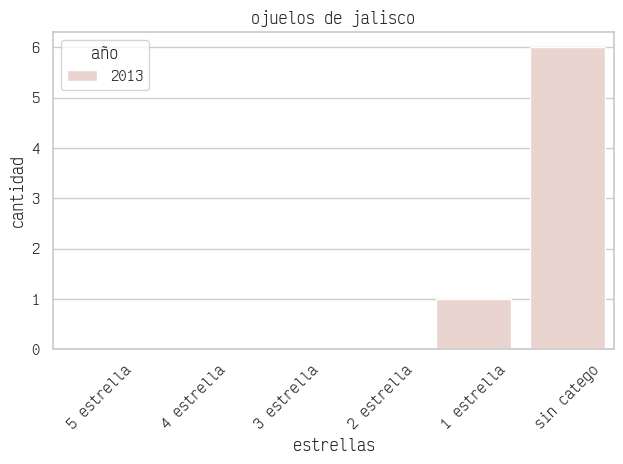

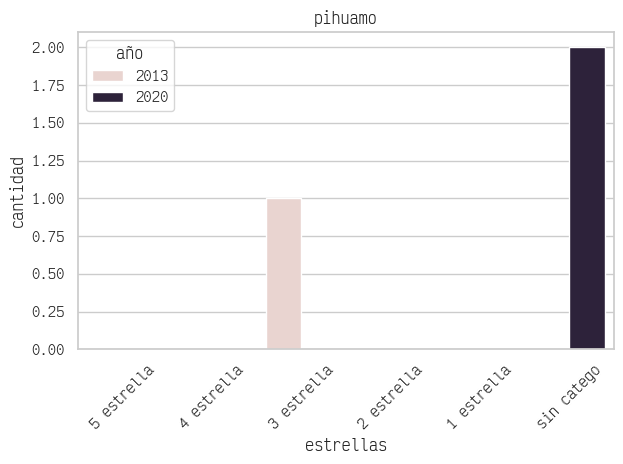

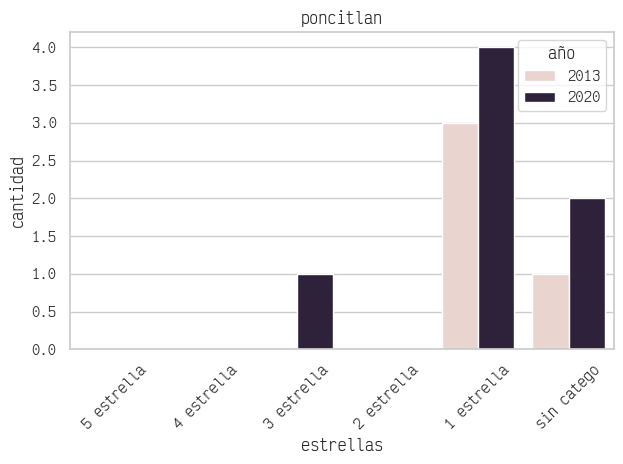

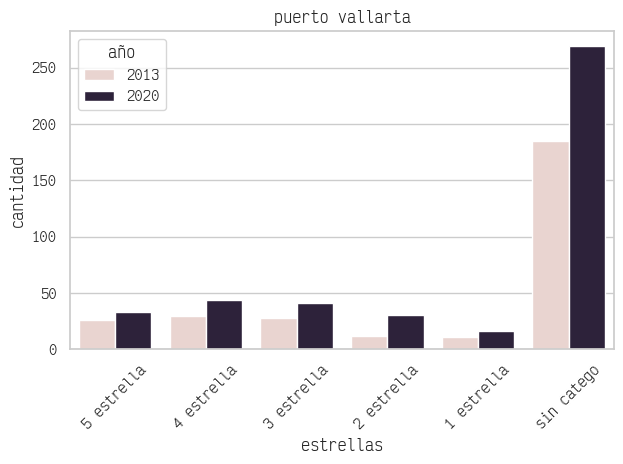

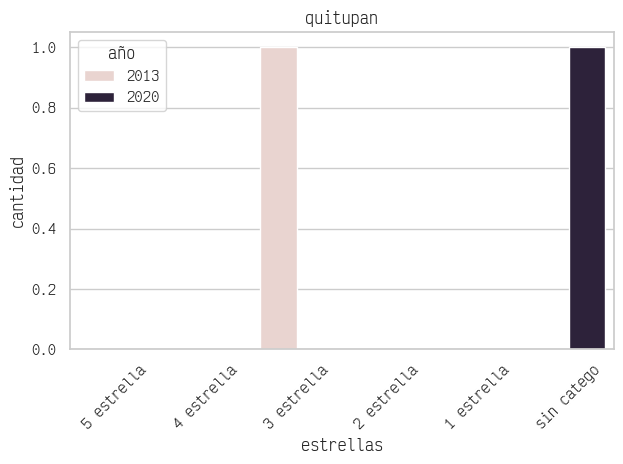

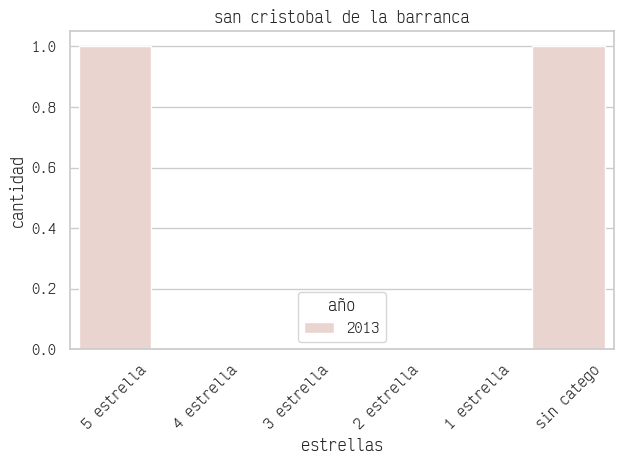

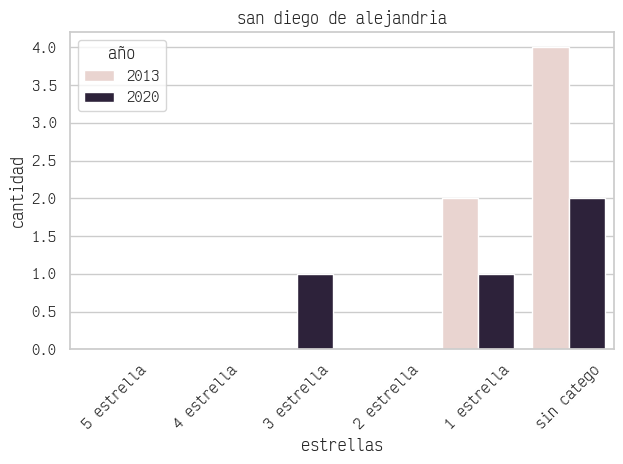

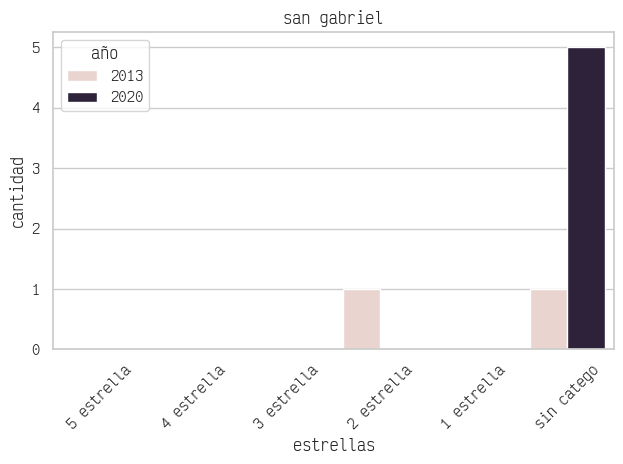

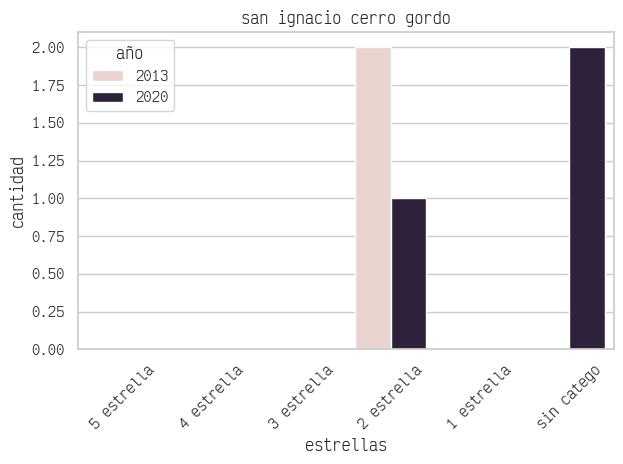

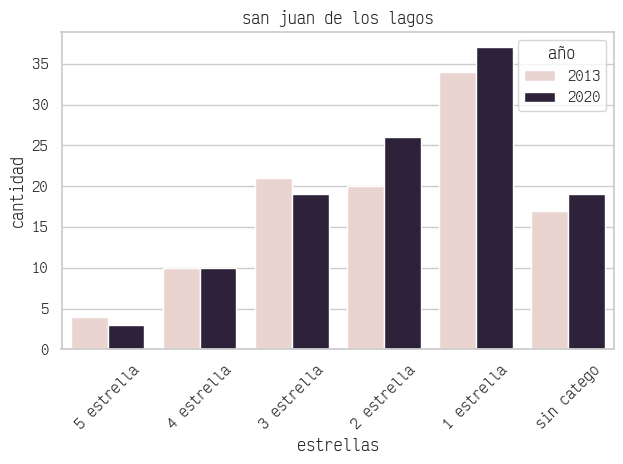

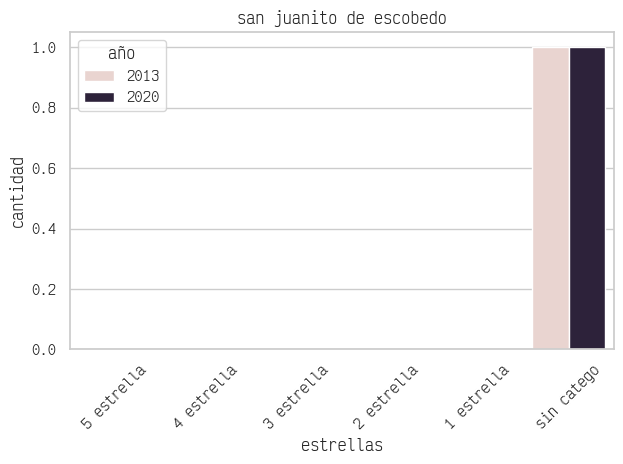

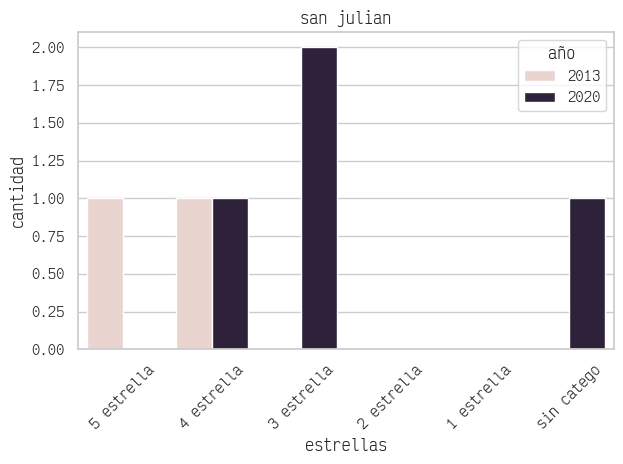

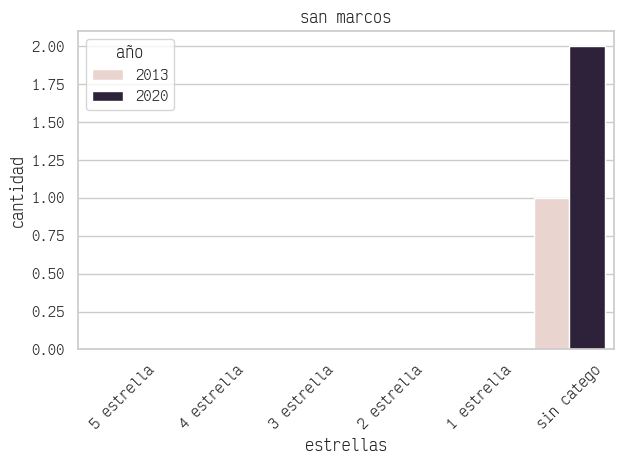

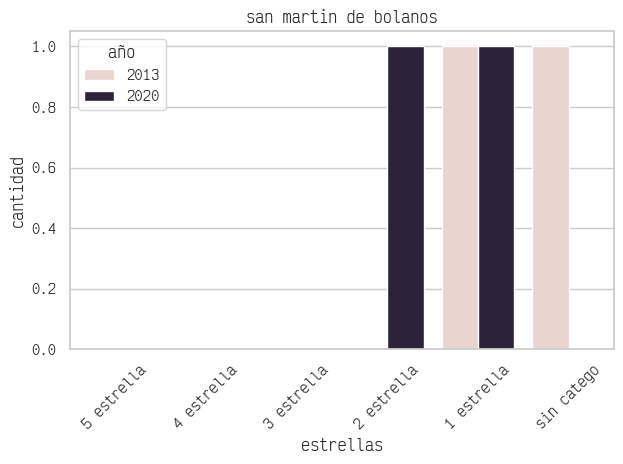

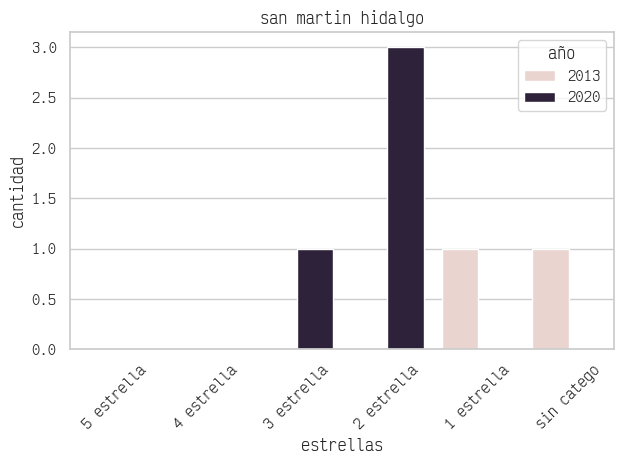

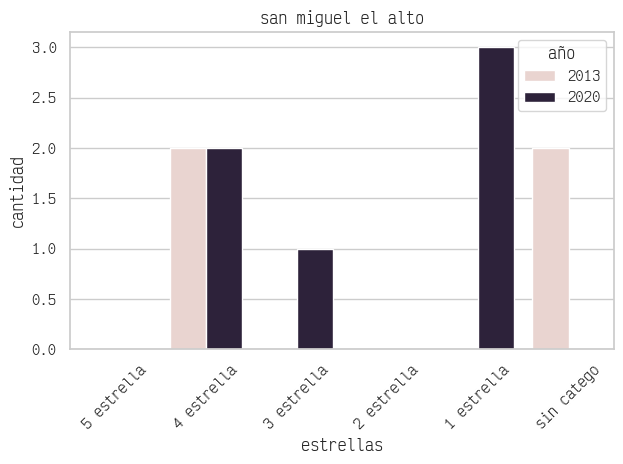

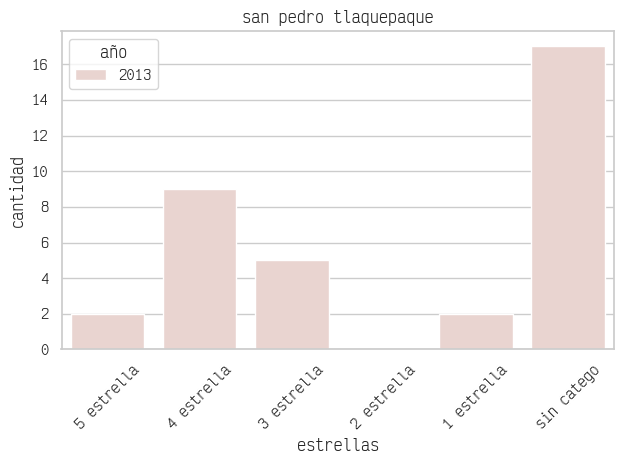

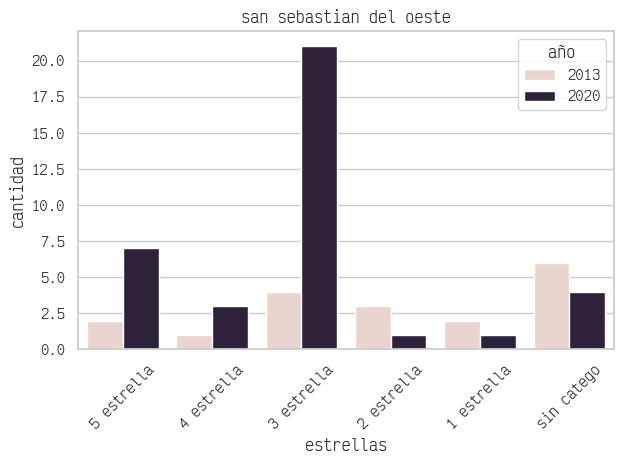

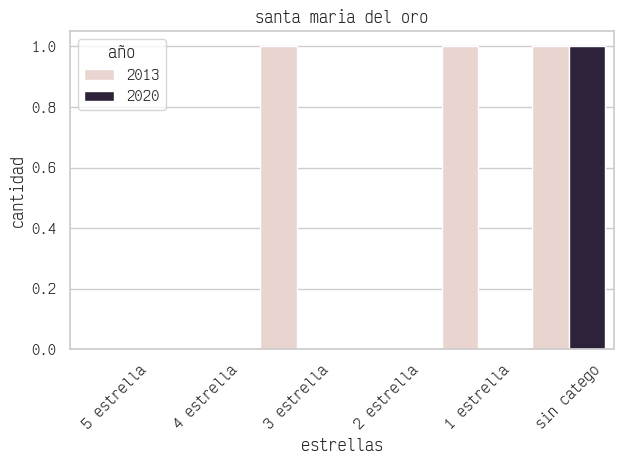

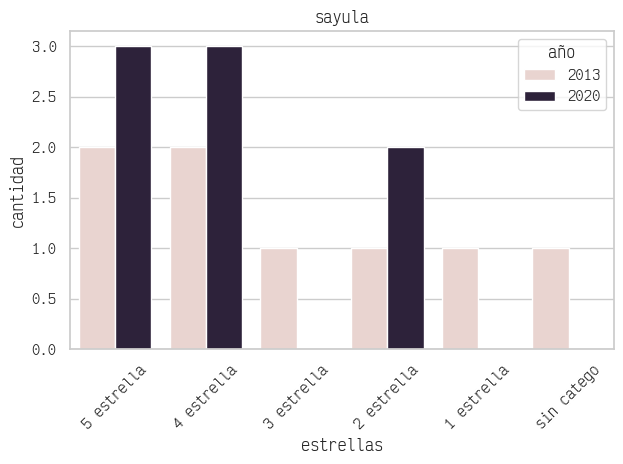

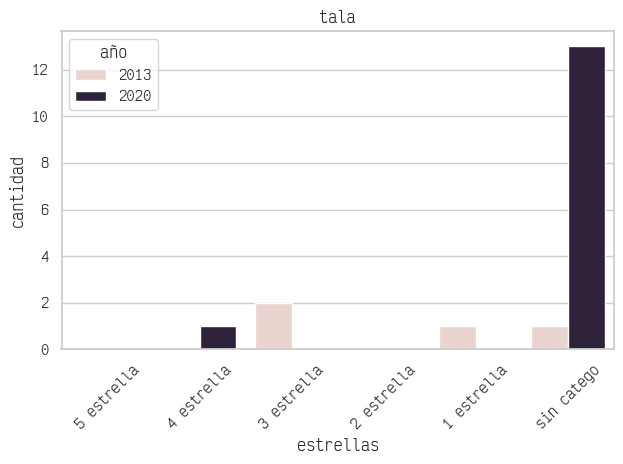

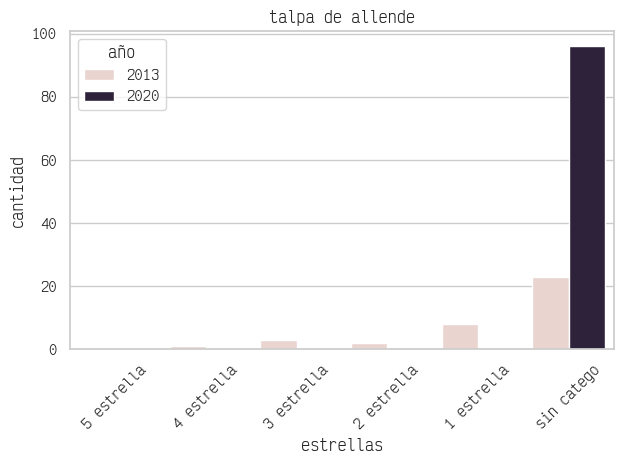

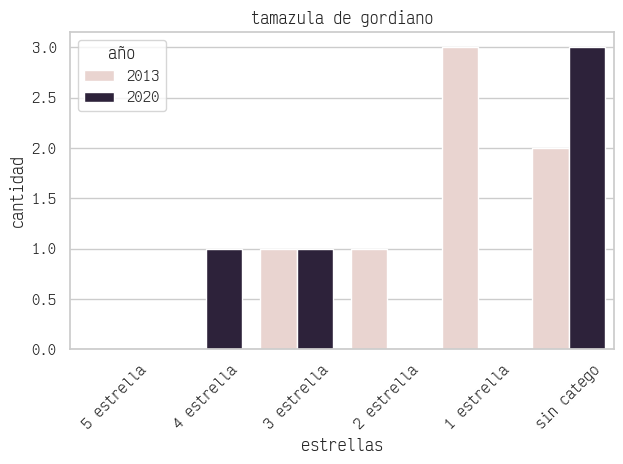

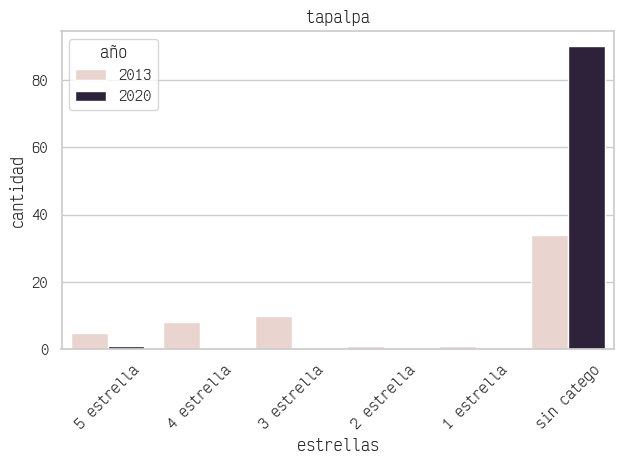

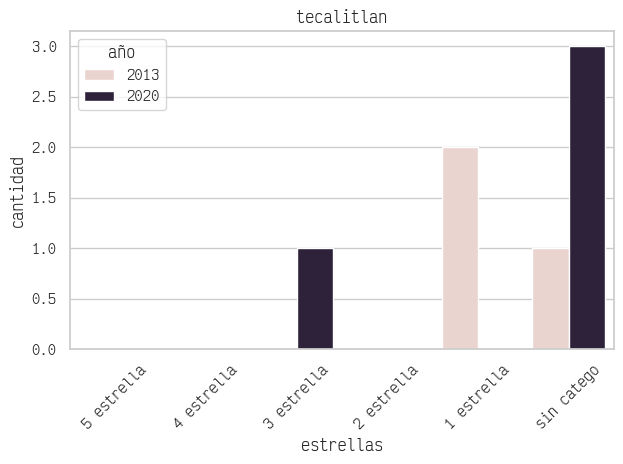

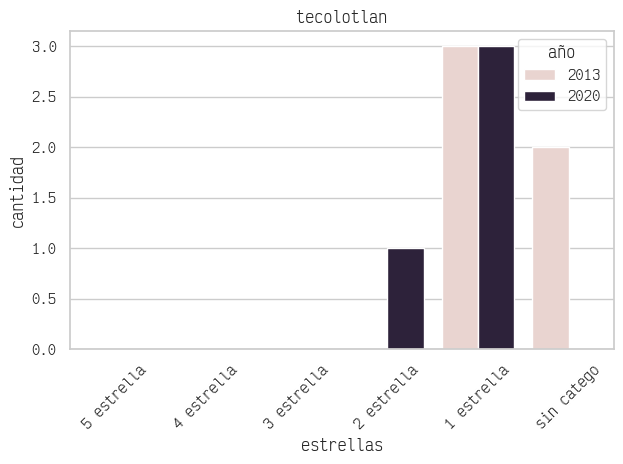

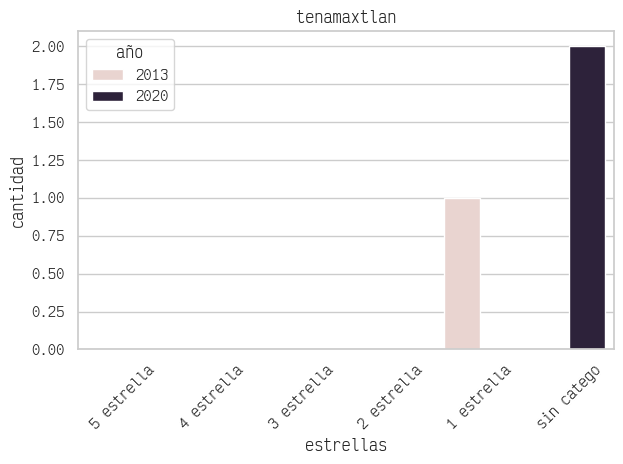

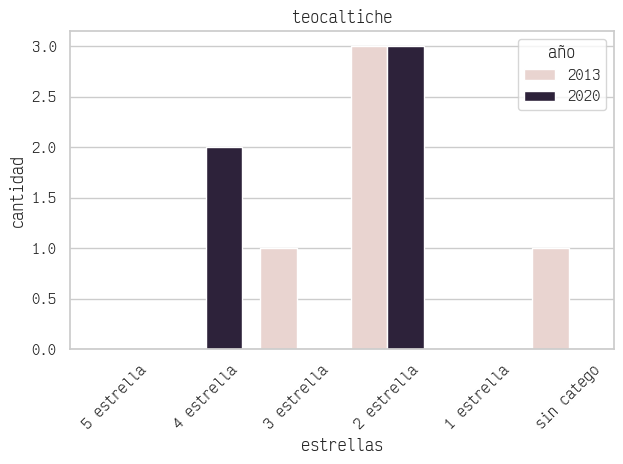

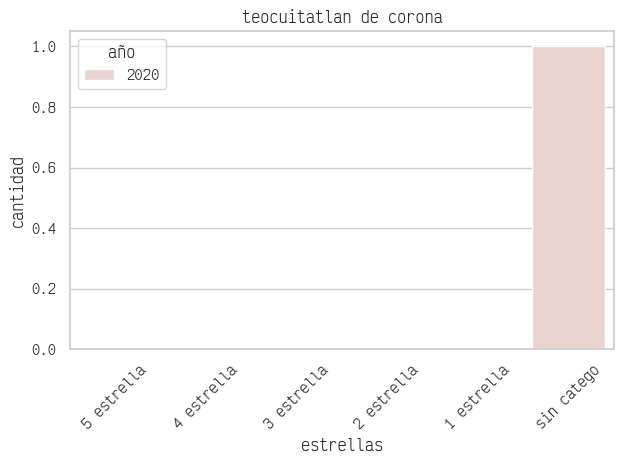

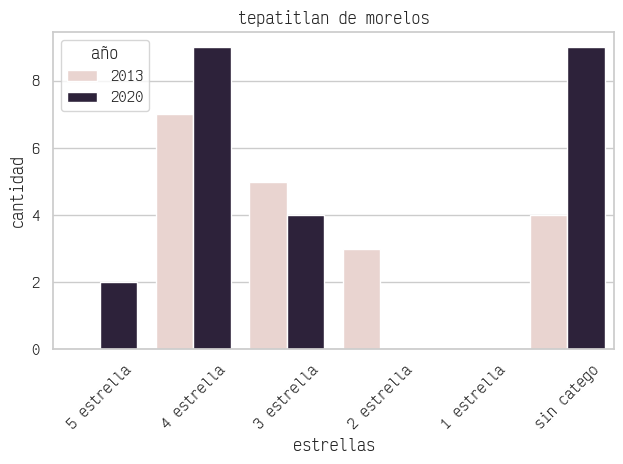

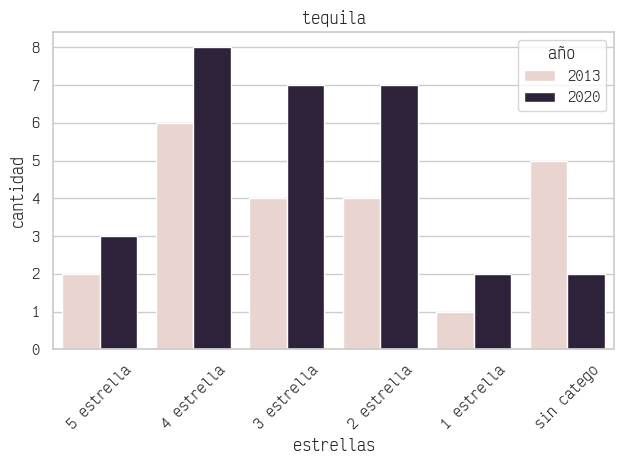

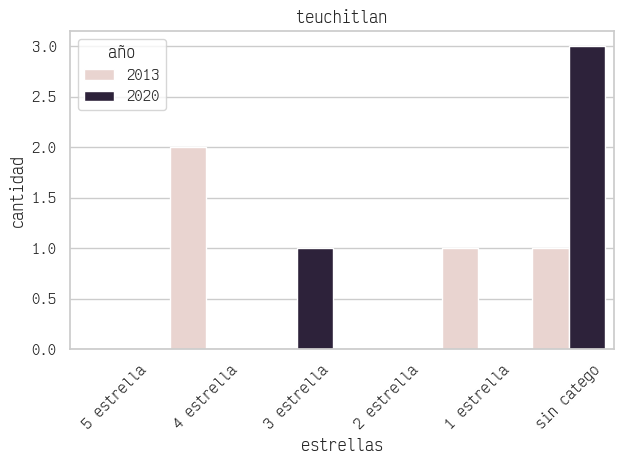

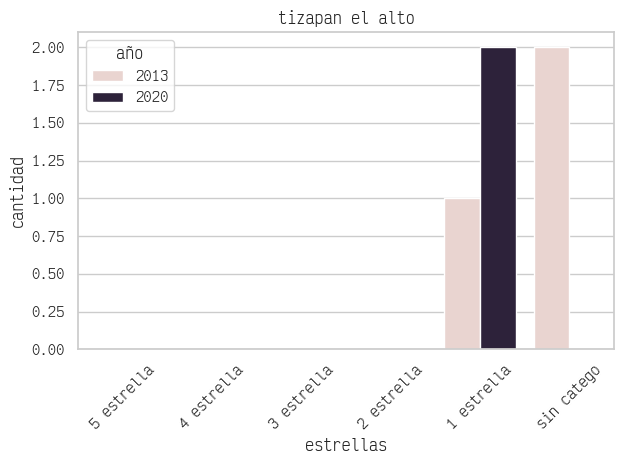

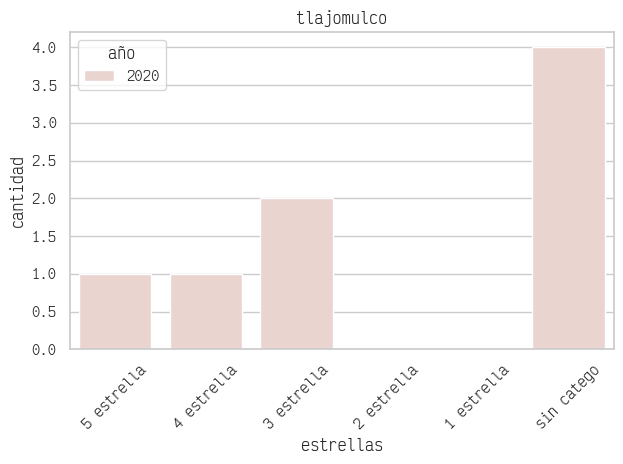

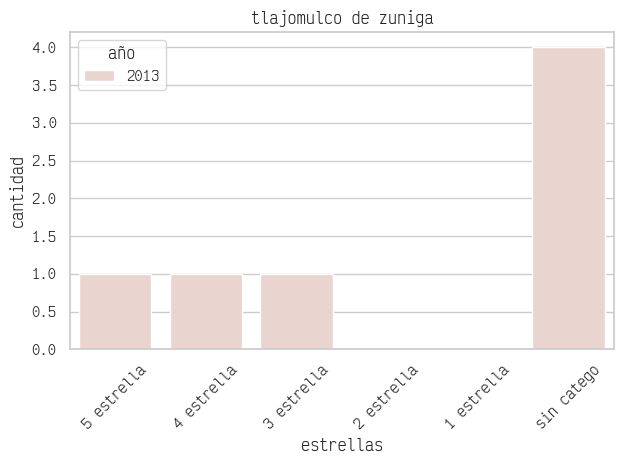

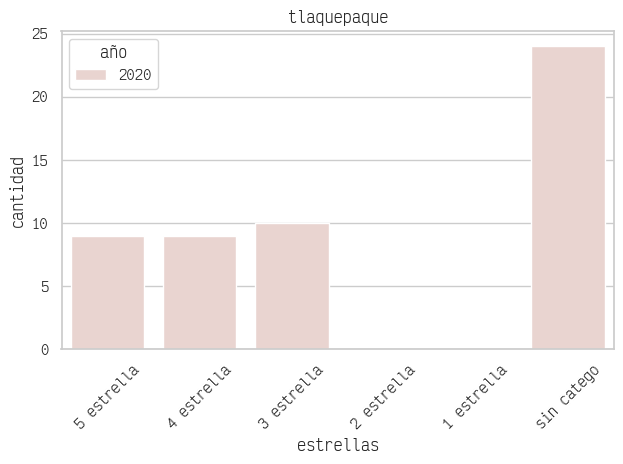

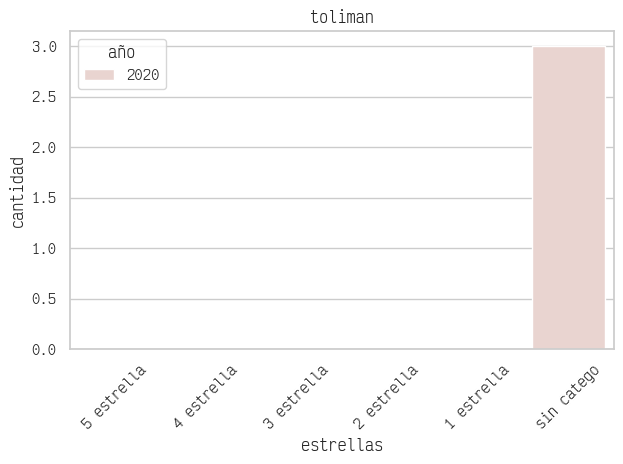

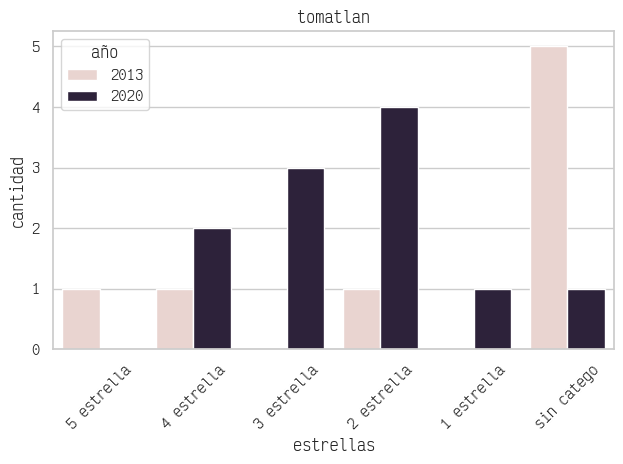

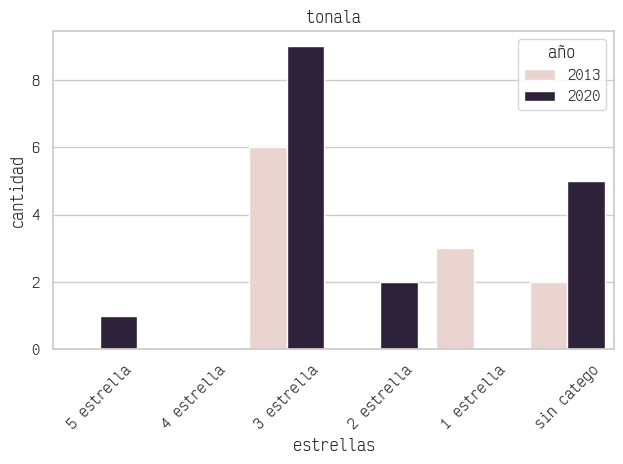

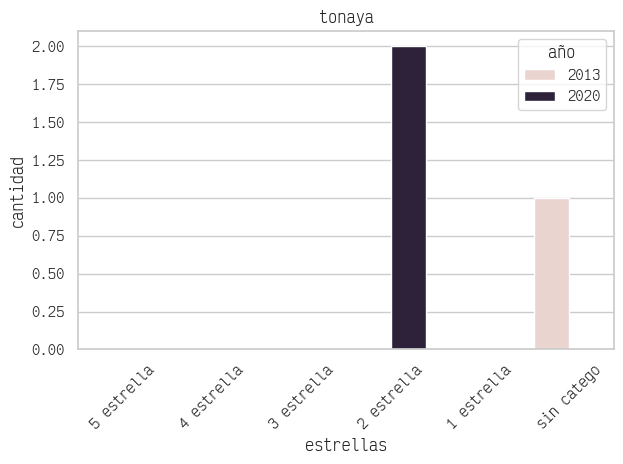

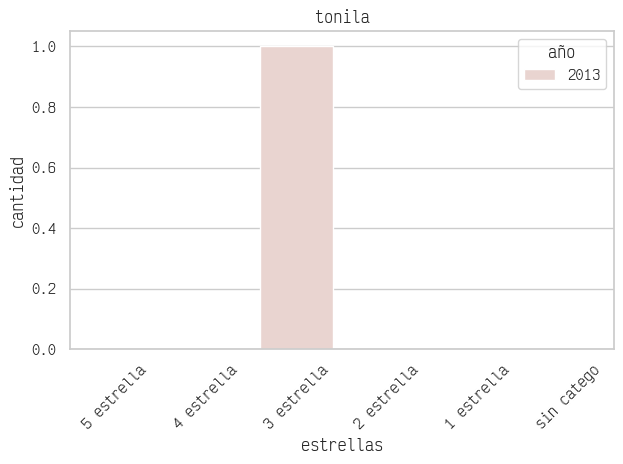

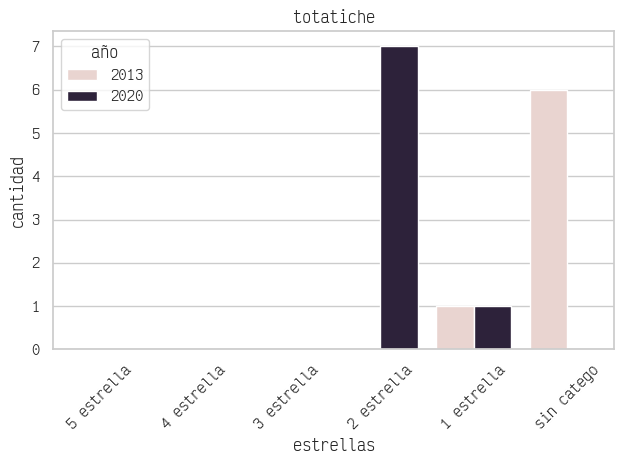

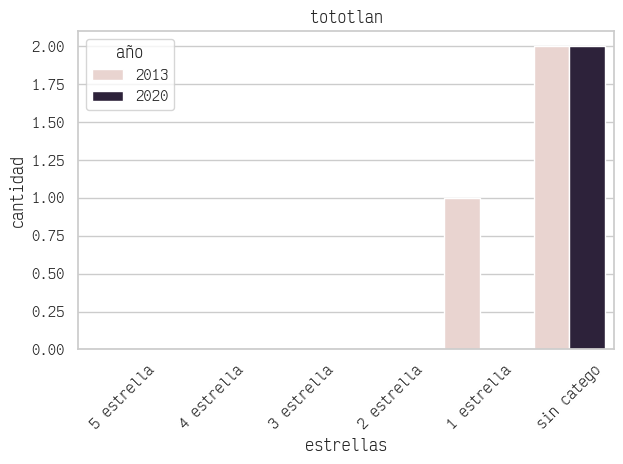

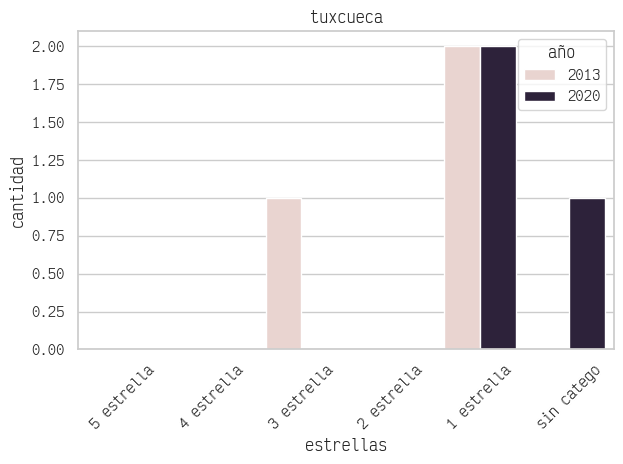

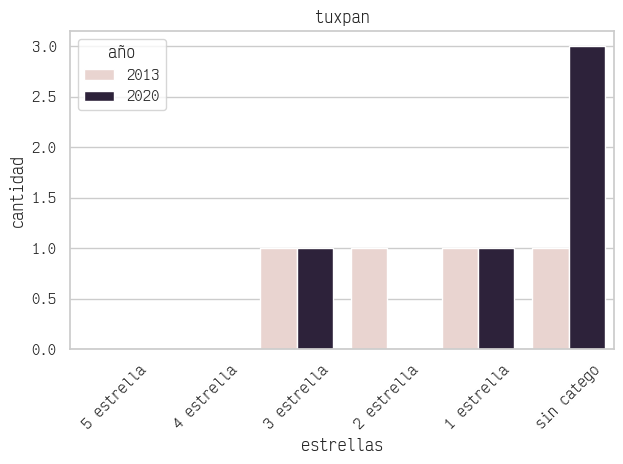

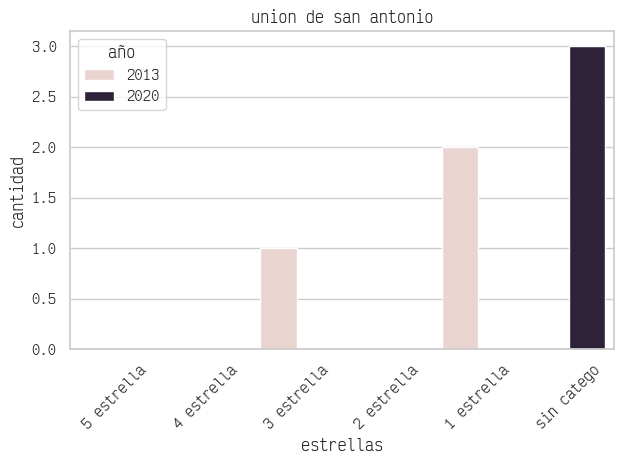

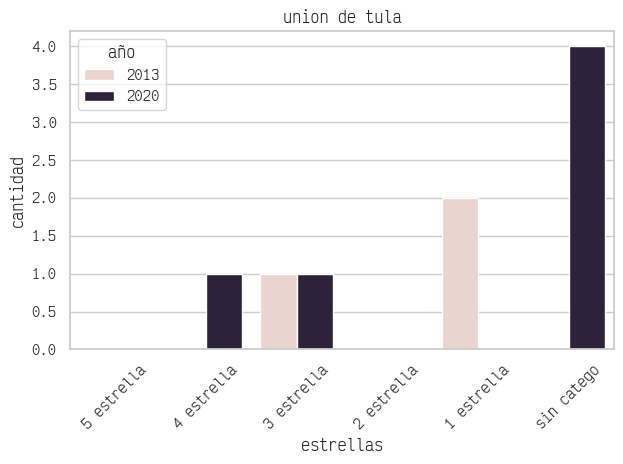

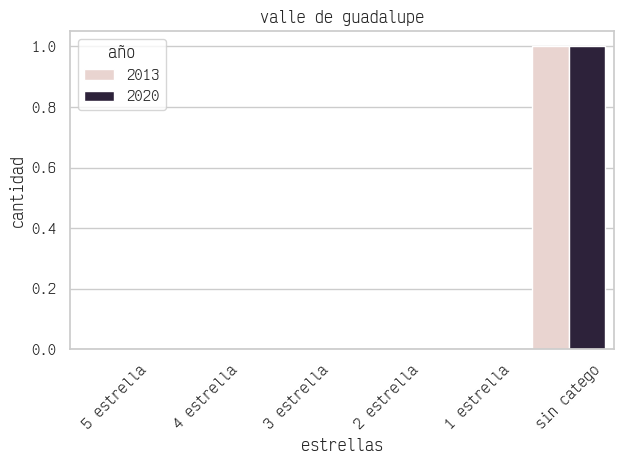

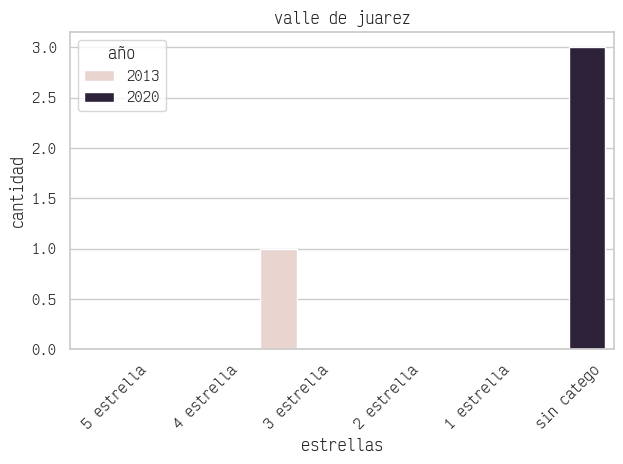

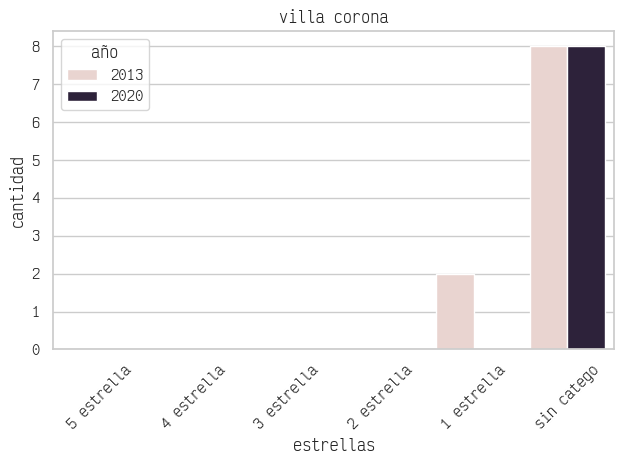

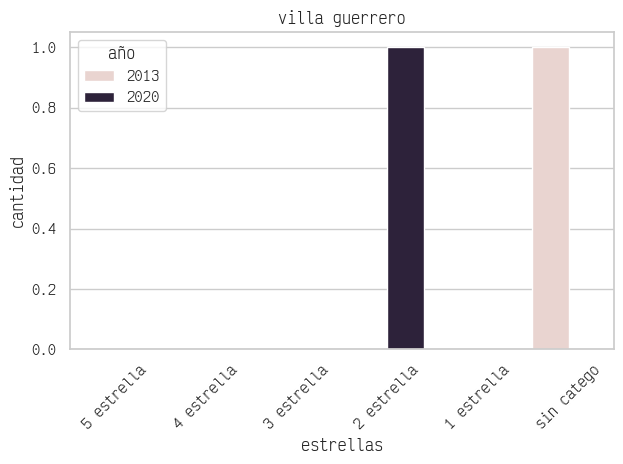

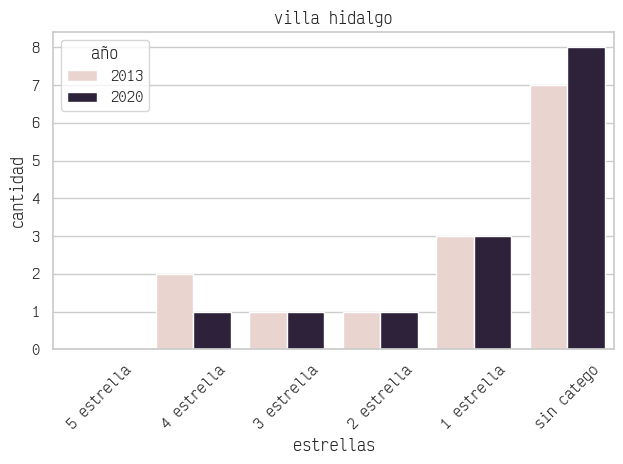

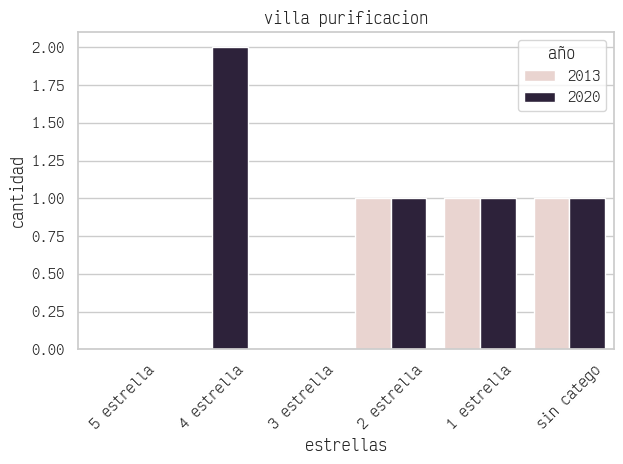

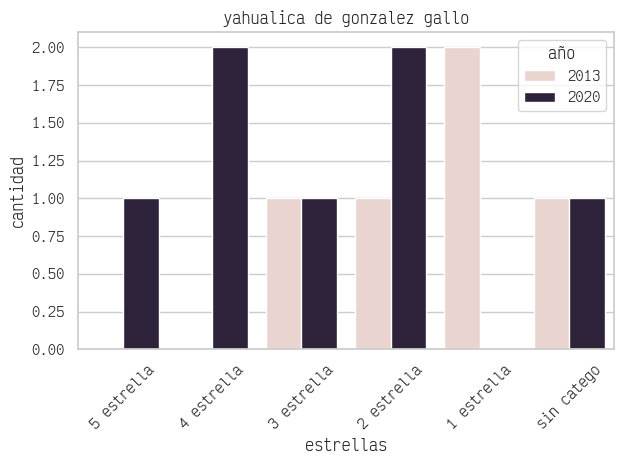

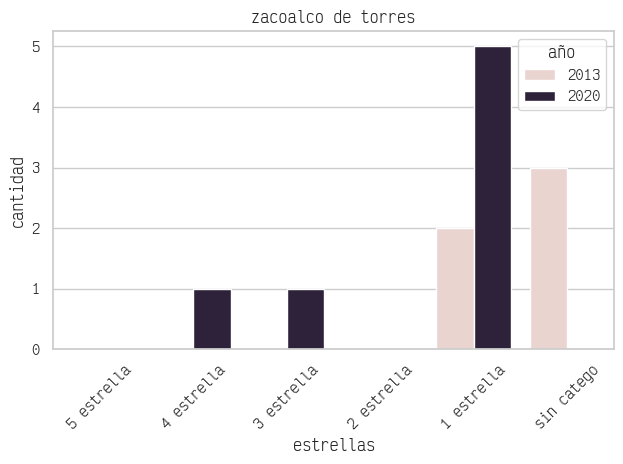

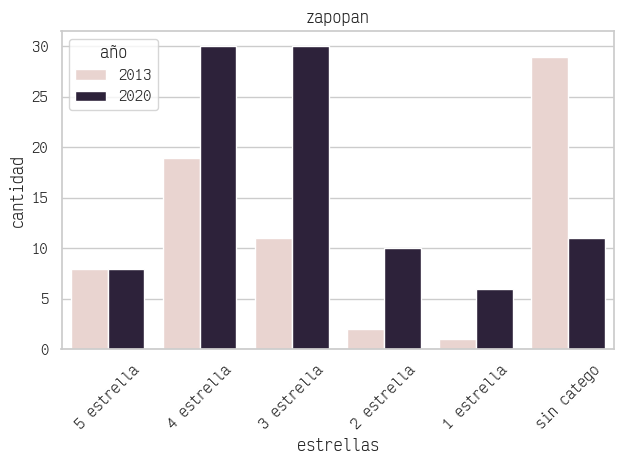

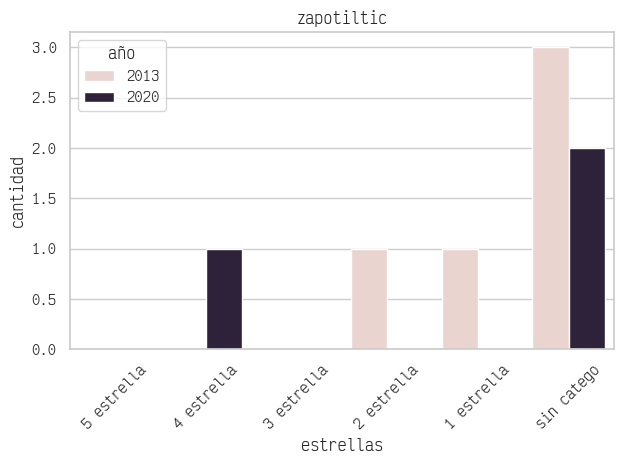

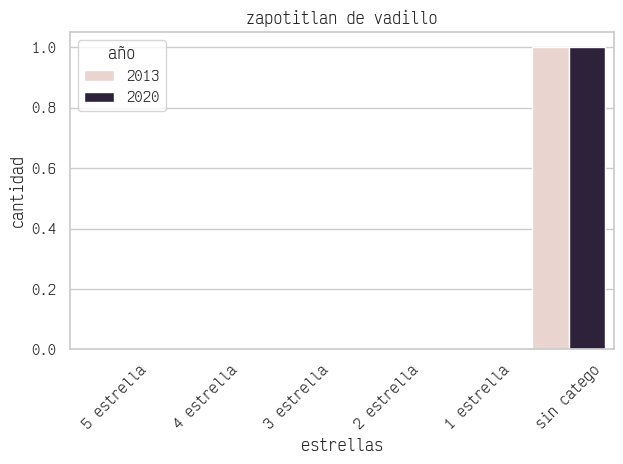

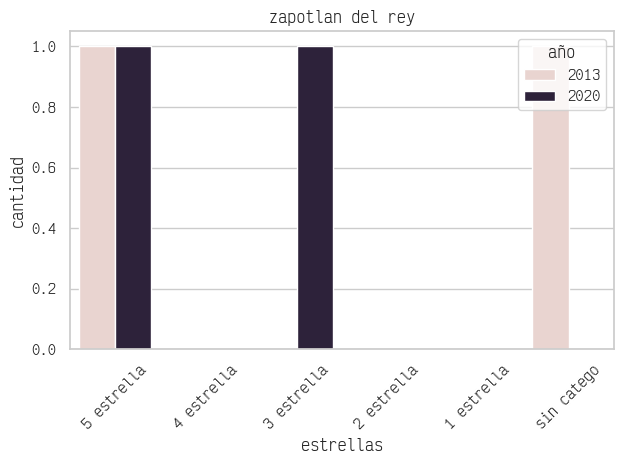

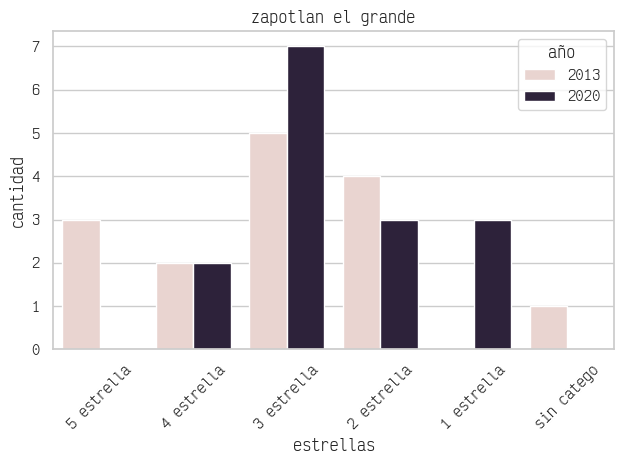

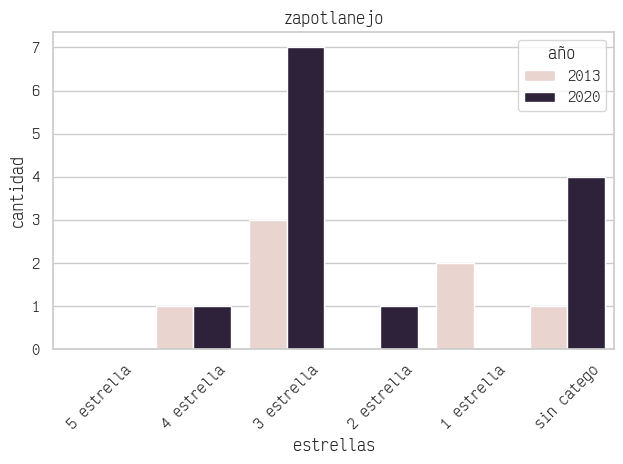

In [73]:
l = ['5 estrella','4 estrella','3 estrella','2 estrella','1 estrella','sin catego']

for mun in df_hoteles_rel:
    # print(mun[1])
    df = mun[1].melt(
    id_vars=['municipio', 'año','region'], 
    value_vars=['5 estrella', '4 estrella', '3 estrella', '2 estrella', '1 estrella', 'sin catego'],
    var_name='estrellas', 
    value_name="cantidad"
    )

    
    
    fig,ax = plt.subplots(1,1)

    sns.barplot(
        data=df,
        x="estrellas",
        y="cantidad",
        hue="año",
        order=l,
        ax=ax
    )
    
    ax.set_title(mun[0])
    plt.xticks(rotation=45)
    plt.tight_layout()